In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

In [3]:
dataPath = '/Volumes/external_SSD/copulaData/Deribit_raw/'
ETH = pd.read_csv(dataPath+'ETH_index_Deribit_hourly.csv')
BTC = pd.read_csv(dataPath+'BTC_index_Deribit_hourly.csv')

In [4]:
ETH.datetime = pd.to_datetime(ETH.datetime)
BTC.datetime = pd.to_datetime(BTC.datetime)

In [14]:
futuresPath = 'CME/'
futuresNames = [f for f in os.listdir(futuresPath) if f.endswith('.csv')]
futuresNames = list(np.sort(futuresNames))
futuresNames

['BTCF2018.csv',
 'BTCF2019.csv',
 'BTCF2020.csv',
 'BTCF2021.csv',
 'BTCF2022.csv',
 'BTCF2023.csv',
 'BTCG2018.csv',
 'BTCG2019.csv',
 'BTCG2020.csv',
 'BTCG2021.csv',
 'BTCG2022.csv',
 'BTCH2018.csv',
 'BTCH2019.csv',
 'BTCH2020.csv',
 'BTCH2021.csv',
 'BTCH2022.csv',
 'BTCH2023.csv',
 'BTCJ2018.csv',
 'BTCJ2019.csv',
 'BTCJ2020.csv',
 'BTCJ2021.csv',
 'BTCJ2022.csv',
 'BTCK2018.csv',
 'BTCK2019.csv',
 'BTCK2020.csv',
 'BTCK2021.csv',
 'BTCK2022.csv',
 'BTCM2018.csv',
 'BTCM2019.csv',
 'BTCM2020.csv',
 'BTCM2021.csv',
 'BTCM2022.csv',
 'BTCM2023.csv',
 'BTCN2018.csv',
 'BTCN2019.csv',
 'BTCN2020.csv',
 'BTCN2021.csv',
 'BTCN2022.csv',
 'BTCQ2018.csv',
 'BTCQ2019.csv',
 'BTCQ2020.csv',
 'BTCQ2021.csv',
 'BTCQ2022.csv',
 'BTCQ2023.csv',
 'BTCU2018.csv',
 'BTCU2019.csv',
 'BTCU2020.csv',
 'BTCU2021.csv',
 'BTCU2022.csv',
 'BTCU2023.csv',
 'BTCV2018.csv',
 'BTCV2019.csv',
 'BTCV2020.csv',
 'BTCV2021.csv',
 'BTCV2022.csv',
 'BTCX2018.csv',
 'BTCX2019.csv',
 'BTCX2020.csv',
 'BTCX2021.csv

In [33]:
df = pd.read_csv(futuresPath+futuresNames[50])

df.iloc[-1].Date

'2018-10-26 14:00:00'

In [27]:
futures = {fN[:-4]:pd.read_csv(futuresPath+fN) for fN in futuresNames}

In [224]:
def get_CME_settlement(iN):
    y = int(iN[4:])
    m = int(monthCode[iN[3]])
    today = datetime(year=y, month=m, day=1) + timedelta(days=29)
    offset = (today.weekday() - 4) % 7
    last_friday = today - timedelta(days=offset) + timedelta(hours = 16)
    
    return last_friday

In [231]:
fN

'BTCF2018'

In [232]:
BTC_futures = []
ETH_futures = []

for fN in futures:
    df = futures[fN].copy()
    df = df.iloc[:, 1:]
    if len(df)==0:
        continue
    else:
        df.Date = pd.to_datetime(df.Date)
        df.loc[:, 'maturity'] = get_CME_settlement(fN)
        df.loc[:, 'instrumentName'] = fN
        
        if fN.startswith('BTC'):
            BTC_futures.append(df)
        elif fN.startswith('ETH'):
            ETH_futures.append(df)


        

In [233]:
BTC_futures = pd.concat(BTC_futures, axis=0)
ETH_futures = pd.concat(ETH_futures, axis=0)

In [234]:
BTC_futures.loc[:, 'timeToMaturity'] = BTC_futures.maturity - BTC_futures.Date 
BTC_futures.loc[:, 'timeToMaturityinYears'] = BTC_futures.timeToMaturity.apply(lambda x:x.total_seconds()/365/24/60/60)

ETH_futures.loc[:, 'timeToMaturity'] = ETH_futures.maturity - ETH_futures.Date 
ETH_futures.loc[:, 'timeToMaturityinYears'] = ETH_futures.timeToMaturity.apply(lambda x:x.total_seconds()/365/24/60/60)


In [236]:
BTC_futuresCurve = dict()
l = len(BTC) 
for i in range(l):
    print(i/l)
    spot = BTC.iloc[i,:]
    datetime = spot.datetime
    _id = BTC_futures.Date == datetime
    fut = BTC_futures.loc[_id, :]

    datetime = [spot.datetime]
    datetime += list(fut.Date)

    _open = [spot.index_price]
    _open += list(fut.open)

    timeToMaturityinYears = [0]
    timeToMaturityinYears += list(fut.timeToMaturityinYears)

    instrumentName = ['spot']
    instrumentName += list(fut.instrumentName)

    result = {
        'datetime':datetime, 
        'open':_open,
        'timeToMaturityinYears': timeToMaturityinYears,
        'instrumentName': instrumentName
    }
    
    if len(datetime) > 1:
        result = pd.DataFrame(result)
        BTC_futuresCurve[datetime[0].strftime('%Y-%m-%d %H:%M:%S')] = result

0.0
3.7506563648638515e-05
7.501312729727703e-05
0.00011251969094591554
0.00015002625459455406
0.00018753281824319257
0.00022503938189183108
0.0002625459455404696
0.0003000525091891081
0.0003375590728377466
0.00037506563648638514
0.0004125722001350236
0.00045007876378366215
0.00048758532743230063
0.0005250918910809392
0.0005625984547295777
0.0006001050183782162
0.0006376115820268547
0.0006751181456754932
0.0007126247093241317
0.0007501312729727703
0.0007876378366214088
0.0008251444002700472
0.0008626509639186857
0.0009001575275673243
0.0009376640912159628
0.0009751706548646013
0.0010126772185132399
0.0010501837821618783
0.0010876903458105168
0.0011251969094591553
0.0011627034731077938
0.0012002100367564325
0.001237716600405071
0.0012752231640537094
0.001312729727702348
0.0013502362913509864
0.0013877428549996249
0.0014252494186482634
0.0014627559822969019
0.0015002625459455405
0.001537769109594179
0.0015752756732428175
0.001612782236891456
0.0016502888005400945
0.001687795364188733
0.0

0.015902782987022728
0.015940289550671366
0.015977796114320007
0.016015302677968645
0.016052809241617283
0.01609031580526592
0.01612782236891456
0.0161653289325632
0.016202835496211838
0.016240342059860476
0.016277848623509113
0.01631535518715775
0.016352861750806393
0.01639036831445503
0.016427874878103668
0.016465381441752306
0.016502888005400944
0.016540394569049585
0.016577901132698223
0.01661540769634686
0.0166529142599955
0.016690420823644136
0.016727927387292778
0.016765433950941416
0.016802940514590053
0.01684044707823869
0.01687795364188733
0.01691546020553597
0.016952966769184608
0.016990473332833246
0.017027979896481884
0.01706548646013052
0.017102993023779163
0.0171404995874278
0.01717800615107644
0.017215512714725077
0.017253019278373714
0.017290525842022352
0.017328032405670993
0.01736553896931963
0.01740304553296827
0.017440552096616907
0.017478058660265545
0.017515565223914186
0.017553071787562824
0.017590578351211462
0.0176280849148601
0.017665591478508737
0.0177030980

0.031130447828369965
0.031167954392018603
0.03120546095566724
0.031242967519315882
0.03128047408296452
0.031317980646613154
0.031355487210261795
0.03139299377391044
0.03143050033755907
0.03146800690120771
0.03150551346485635
0.03154302002850499
0.03158052659215363
0.031618033155802264
0.031655539719450905
0.03169304628309954
0.03173055284674818
0.03176805941039682
0.031805565974045456
0.0318430725376941
0.03188057910134273
0.03191808566499137
0.031955592228640015
0.03199309879228865
0.03203060535593729
0.032068111919585925
0.032105618483234566
0.03214312504688321
0.03218063161053184
0.03221813817418048
0.03225564473782912
0.03229315130147776
0.0323306578651264
0.032368164428775034
0.032405670992423675
0.03244317755607231
0.03248068411972095
0.03251819068336959
0.03255569724701823
0.03259320381066687
0.0326307103743155
0.032668216937964144
0.032705723501612785
0.03274323006526142
0.03278073662891006
0.032818243192558695
0.032855749756207336
0.03289325631985598
0.03293076288350461
0.0329

0.04887105243417598
0.04890855899782462
0.04894606556147326
0.048983572125121895
0.049021078688770536
0.04905858525241917
0.04909609181606781
0.04913359837971645
0.04917110494336509
0.04920861150701373
0.04924611807066236
0.049283624634311005
0.049321131197959646
0.04935863776160828
0.04939614432525692
0.049433650888905556
0.0494711574525542
0.04950866401620284
0.04954617057985147
0.049583677143500114
0.04962118370714875
0.04965869027079739
0.04969619683444603
0.049733703398094666
0.04977120996174331
0.04980871652539194
0.04984622308904058
0.049883729652689224
0.04992123621633786
0.0499587427799865
0.049996249343635134
0.050033755907283775
0.050071262470932416
0.05010876903458105
0.05014627559822969
0.050183782161878326
0.05022128872552697
0.05025879528917561
0.05029630185282424
0.050333808416472885
0.05037131498012152
0.05040882154377016
0.0504463281074188
0.050483834671067436
0.05052134123471608
0.05055884779836471
0.05059635436201335
0.050633860925661994
0.05067136748931063
0.050708

0.06488635511214462
0.06492386167579327
0.0649613682394419
0.06499887480309054
0.06503638136673918
0.06507388793038782
0.06511139449403645
0.06514890105768509
0.06518640762133374
0.06522391418498237
0.065261420748631
0.06529892731227965
0.06533643387592829
0.06537394043957692
0.06541144700322557
0.0654489535668742
0.06548646013052284
0.06552396669417147
0.06556147325782012
0.06559897982146876
0.06563648638511739
0.06567399294876604
0.06571149951241467
0.06574900607606331
0.06578651263971196
0.06582401920336059
0.06586152576700922
0.06589903233065786
0.0659365388943065
0.06597404545795514
0.06601155202160378
0.06604905858525242
0.06608656514890106
0.06612407171254969
0.06616157827619834
0.06619908483984698
0.06623659140349561
0.06627409796714424
0.06631160453079289
0.06634911109444153
0.06638661765809016
0.06642412422173881
0.06646163078538744
0.06649913734903608
0.06653664391268473
0.06657415047633336
0.066611657039982
0.06664916360363063
0.06668667016727928
0.06672417673092791
0.06676

0.08176430875403196
0.08180181531768059
0.08183932188132924
0.08187682844497787
0.08191433500862651
0.08195184157227514
0.08198934813592379
0.08202685469957242
0.08206436126322106
0.0821018678268697
0.08213937439051834
0.08217688095416698
0.08221438751781562
0.08225189408146426
0.08228940064511289
0.08232690720876153
0.08236441377241017
0.08240192033605881
0.08243942689970744
0.08247693346335609
0.08251444002700473
0.08255194659065336
0.08258945315430201
0.08262695971795064
0.08266446628159928
0.08270197284524791
0.08273947940889656
0.0827769859725452
0.08281449253619383
0.08285199909984248
0.08288950566349111
0.08292701222713975
0.0829645187907884
0.08300202535443703
0.08303953191808566
0.0830770384817343
0.08311454504538295
0.08315205160903158
0.08318955817268021
0.08322706473632886
0.0832645712999775
0.08330207786362613
0.08333958442727478
0.08337709099092341
0.08341459755457205
0.08345210411822068
0.08348961068186933
0.08352711724551797
0.0835646238091666
0.08360213037281525
0.0836

0.09950491335983797
0.09954241992348661
0.09957992648713525
0.09961743305078388
0.09965493961443253
0.09969244617808116
0.0997299527417298
0.09976745930537845
0.09980496586902708
0.09984247243267572
0.09987997899632435
0.099917485559973
0.09995499212362163
0.09999249868727027
0.10003000525091892
0.10006751181456755
0.10010501837821618
0.10014252494186483
0.10018003150551347
0.1002175380691621
0.10025504463281074
0.10029255119645938
0.10033005776010802
0.10036756432375665
0.1004050708874053
0.10044257745105394
0.10048008401470257
0.10051759057835122
0.10055509714199985
0.10059260370564849
0.10063011026929712
0.10066761683294577
0.1007051233965944
0.10074262996024304
0.10078013652389169
0.10081764308754032
0.10085514965118896
0.1008926562148376
0.10093016277848624
0.10096766934213487
0.1010051759057835
0.10104268246943215
0.10108018903308079
0.10111769559672942
0.10115520216037807
0.1011927087240267
0.10123021528767534
0.10126772185132399
0.10130522841497262
0.10134273497862126
0.1013802

0.11612032105618483
0.11615782761983347
0.11619533418348212
0.11623284074713075
0.11627034731077938
0.11630785387442802
0.11634536043807667
0.1163828670017253
0.11642037356537394
0.11645788012902258
0.11649538669267122
0.11653289325631985
0.1165703998199685
0.11660790638361714
0.11664541294726577
0.1166829195109144
0.11672042607456305
0.11675793263821169
0.11679543920186032
0.11683294576550897
0.1168704523291576
0.11690795889280624
0.11694546545645489
0.11698297202010352
0.11702047858375215
0.11705798514740079
0.11709549171104944
0.11713299827469807
0.1171705048383467
0.11720801140199535
0.11724551796564399
0.11728302452929262
0.11732053109294127
0.1173580376565899
0.11739554422023854
0.11743305078388717
0.11747055734753582
0.11750806391118446
0.11754557047483309
0.11758307703848174
0.11762058360213037
0.11765809016577901
0.11769559672942766
0.11773310329307629
0.11777060985672493
0.11780811642037356
0.11784562298402221
0.11788312954767084
0.11792063611131948
0.11795814267496812
0.1179

0.13284824844347762
0.13288575500712624
0.1329232615707749
0.13296076813442353
0.13299827469807216
0.1330357812617208
0.13307328782536945
0.13311079438901807
0.13314830095266672
0.13318580751631537
0.133223314079964
0.13326082064361264
0.13329832720726126
0.1333358337709099
0.13337334033455855
0.13341084689820717
0.13344835346185582
0.13348586002550447
0.1335233665891531
0.13356087315280174
0.1335983797164504
0.133635886280099
0.13367339284374766
0.1337108994073963
0.13374840597104493
0.13378591253469357
0.13382341909834222
0.13386092566199084
0.1338984322256395
0.13393593878928814
0.13397344535293676
0.1340109519165854
0.13404845848023403
0.13408596504388268
0.13412347160753132
0.13416097817117995
0.1341984847348286
0.13423599129847724
0.13427349786212586
0.1343110044257745
0.13434851098942316
0.13438601755307178
0.13442352411672043
0.13446103068036908
0.1344985372440177
0.13453604380766634
0.134573550371315
0.1346110569349636
0.13464856349861226
0.13468607006226088
0.1347235766259095

0.15051383992198636
0.15055134648563498
0.15058885304928363
0.15062635961293228
0.1506638661765809
0.15070137274022954
0.15073887930387816
0.1507763858675268
0.15081389243117546
0.15085139899482408
0.15088890555847273
0.15092641212212138
0.15096391868577
0.15100142524941865
0.1510389318130673
0.15107643837671592
0.15111394494036456
0.1511514515040132
0.15118895806766183
0.15122646463131048
0.15126397119495913
0.15130147775860775
0.1513389843222564
0.15137649088590505
0.15141399744955367
0.15145150401320231
0.15148901057685094
0.15152651714049958
0.15156402370414823
0.15160153026779685
0.1516390368314455
0.15167654339509415
0.15171404995874277
0.15175155652239142
0.15178906308604007
0.1518265696496887
0.15186407621333733
0.15190158277698598
0.1519390893406346
0.15197659590428325
0.1520141024679319
0.15205160903158052
0.15208911559522917
0.15212662215887782
0.15216412872252644
0.15220163528617509
0.1522391418498237
0.15227664841347235
0.152314154977121
0.15235166154076962
0.1523891681044

0.16892956267346787
0.1689670692371165
0.16900457580076514
0.16904208236441376
0.1690795889280624
0.16911709549171106
0.16915460205535968
0.16919210861900832
0.16922961518265697
0.1692671217463056
0.16930462830995424
0.1693421348736029
0.1693796414372515
0.16941714800090016
0.1694546545645488
0.16949216112819743
0.16952966769184608
0.16956717425549472
0.16960468081914334
0.169642187382792
0.16967969394644064
0.16971720051008926
0.1697547070737379
0.16979221363738653
0.16982972020103518
0.16986722676468383
0.16990473332833245
0.1699422398919811
0.16997974645562974
0.17001725301927836
0.170054759582927
0.17009226614657566
0.17012977271022428
0.17016727927387293
0.17020478583752158
0.1702422924011702
0.17027979896481885
0.1703173055284675
0.17035481209211611
0.17039231865576476
0.1704298252194134
0.17046733178306203
0.17050483834671068
0.1705423449103593
0.17057985147400795
0.1706173580376566
0.17065486460130522
0.17069237116495387
0.1707298777286025
0.17076738429225113
0.1708048908558997

0.18471982596954467
0.18475733253319332
0.18479483909684194
0.1848323456604906
0.18486985222413924
0.18490735878778786
0.1849448653514365
0.18498237191508515
0.18501987847873377
0.18505738504238242
0.18509489160603104
0.1851323981696797
0.18516990473332834
0.18520741129697696
0.1852449178606256
0.18528242442427426
0.18531993098792288
0.18535743755157152
0.18539494411522017
0.1854324506788688
0.18546995724251744
0.1855074638061661
0.1855449703698147
0.18558247693346336
0.185619983497112
0.18565749006076063
0.18569499662440928
0.18573250318805792
0.18577000975170654
0.1858075163153552
0.1858450228790038
0.18588252944265246
0.1859200360063011
0.18595754256994973
0.18599504913359838
0.18603255569724703
0.18607006226089565
0.1861075688245443
0.18614507538819294
0.18618258195184156
0.1862200885154902
0.18625759507913886
0.18629510164278748
0.18633260820643613
0.18637011477008478
0.1864076213337334
0.18644512789738205
0.1864826344610307
0.18652014102467931
0.18655764758832796
0.18659515415197

0.20084764833845922
0.20088515490210787
0.20092266146575652
0.20096016802940514
0.2009976745930538
0.20103518115670244
0.20107268772035106
0.2011101942839997
0.20114770084764833
0.20118520741129697
0.20122271397494562
0.20126022053859424
0.2012977271022429
0.20133523366589154
0.20137274022954016
0.2014102467931888
0.20144775335683746
0.20148525992048608
0.20152276648413472
0.20156027304778337
0.201597779611432
0.20163528617508064
0.2016727927387293
0.2017102993023779
0.20174780586602656
0.2017853124296752
0.20182281899332383
0.20186032555697248
0.2018978321206211
0.20193533868426974
0.2019728452479184
0.202010351811567
0.20204785837521566
0.2020853649388643
0.20212287150251293
0.20216037806616158
0.20219788462981023
0.20223539119345885
0.2022728977571075
0.20231040432075614
0.20234791088440476
0.2023854174480534
0.20242292401170206
0.20246043057535068
0.20249793713899933
0.20253544370264798
0.2025729502662966
0.20261045682994525
0.20264796339359387
0.20268546995724251
0.202722976520891

0.21701297727102242
0.21705048383467107
0.21708799039831972
0.21712549696196834
0.217163003525617
0.2172005100892656
0.21723801665291426
0.2172755232165629
0.21731302978021153
0.21735053634386017
0.21738804290750882
0.21742554947115744
0.2174630560348061
0.21750056259845474
0.21753806916210336
0.217575575725752
0.21761308228940066
0.21765058885304928
0.21768809541669792
0.21772560198034657
0.2177631085439952
0.21780061510764384
0.2178381216712925
0.2178756282349411
0.21791313479858976
0.21795064136223838
0.21798814792588703
0.21802565448953568
0.2180631610531843
0.21810066761683294
0.2181381741804816
0.2181756807441302
0.21821318730777886
0.2182506938714275
0.21828820043507613
0.21832570699872478
0.21836321356237343
0.21840072012602205
0.2184382266896707
0.21847573325331934
0.21851323981696796
0.2185507463806166
0.21858825294426526
0.21862575950791388
0.21866326607156253
0.21870077263521115
0.2187382791988598
0.21877578576250845
0.21881329232615707
0.21885079888980571
0.218888305453454

0.23385342434926112
0.23389093091290977
0.2339284374765584
0.23396594404020704
0.23400345060385566
0.2340409571675043
0.23407846373115296
0.23411597029480158
0.23415347685845023
0.23419098342209888
0.2342284899857475
0.23426599654939614
0.2343035031130448
0.2343410096766934
0.23437851624034206
0.2344160228039907
0.23445352936763933
0.23449103593128798
0.23452854249493663
0.23456604905858525
0.2346035556222339
0.23464106218588254
0.23467856874953116
0.2347160753131798
0.23475358187682843
0.23479108844047708
0.23482859500412573
0.23486610156777435
0.234903608131423
0.23494111469507165
0.23497862125872027
0.23501612782236891
0.23505363438601756
0.23509114094966618
0.23512864751331483
0.23516615407696348
0.2352036606406121
0.23524116720426075
0.2352786737679094
0.23531618033155802
0.23535368689520667
0.2353911934588553
0.23542870002250393
0.23546620658615258
0.2355037131498012
0.23554121971344985
0.2355787262770985
0.23561623284074712
0.23565373940439577
0.23569124596804442
0.2357287525316

0.2514064961368239
0.25144400270047257
0.2514815092641212
0.25151901582776987
0.2515565223914185
0.25159402895506716
0.25163153551871575
0.2516690420823644
0.25170654864601305
0.2517440552096617
0.25178156177331035
0.251819068336959
0.2518565749006076
0.25189408146425624
0.2519315880279049
0.25196909459155353
0.2520066011552022
0.2520441077188508
0.2520816142824994
0.25211912084614807
0.2521566274097967
0.25219413397344537
0.252231640537094
0.2522691471007426
0.25230665366439126
0.2523441602280399
0.25238166679168855
0.2524191733553372
0.25245667991898585
0.25249418648263444
0.2525316930462831
0.25256919960993174
0.2526067061735804
0.25264421273722903
0.2526817193008776
0.2527192258645263
0.2527567324281749
0.25279423899182357
0.2528317455554722
0.25286925211912087
0.25290675868276946
0.2529442652464181
0.25298177181006676
0.2530192783737154
0.25305678493736405
0.2530942915010127
0.2531317980646613
0.25316930462830994
0.2532068111919586
0.25324431775560724
0.2532818243192559
0.25331933

0.2674593053784412
0.26749681194208985
0.2675343185057385
0.26757182506938715
0.2676093316330358
0.26764683819668444
0.26768434476033304
0.2677218513239817
0.26775935788763033
0.267796864451279
0.26783437101492763
0.2678718775785763
0.26790938414222487
0.2679468907058735
0.26798439726952217
0.2680219038331708
0.26805941039681946
0.26809691696046806
0.2681344235241167
0.26817193008776535
0.268209436651414
0.26824694321506265
0.2682844497787113
0.2683219563423599
0.26835946290600854
0.2683969694696572
0.26843447603330584
0.2684719825969545
0.26850948916060313
0.2685469957242517
0.2685845022879004
0.268622008851549
0.26865951541519767
0.2686970219788463
0.2687345285424949
0.26877203510614356
0.2688095416697922
0.26884704823344086
0.2688845547970895
0.26892206136073815
0.26895956792438674
0.2689970744880354
0.26903458105168404
0.2690720876153327
0.26910959417898134
0.26914710074263
0.2691846073062786
0.2692221138699272
0.2692596204335759
0.2692971269972245
0.26933463356087317
0.26937214012

0.28336208836546395
0.2833995949291126
0.28343710149276125
0.2834746080564099
0.2835121146200585
0.28354962118370713
0.2835871277473558
0.28362463431100443
0.2836621408746531
0.2836996474383017
0.2837371540019503
0.28377466056559897
0.2838121671292476
0.28384967369289626
0.2838871802565449
0.28392468682019356
0.28396219338384215
0.2839996999474908
0.28403720651113945
0.2840747130747881
0.28411221963843675
0.28414972620208534
0.284187232765734
0.28422473932938264
0.2842622458930313
0.28429975245667993
0.2843372590203286
0.2843747655839772
0.2844122721476258
0.28444977871127447
0.2844872852749231
0.28452479183857177
0.2845622984022204
0.284599804965869
0.28463731152951766
0.2846748180931663
0.28471232465681495
0.2847498312204636
0.2847873377841122
0.28482484434776084
0.2848623509114095
0.28489985747505814
0.2849373640387068
0.28497487060235543
0.285012377166004
0.2850498837296527
0.2850873902933013
0.28512489685694997
0.2851624034205986
0.28519990998424727
0.28523741654789586
0.285274923

0.3017403045532968
0.30177781111694546
0.3018153176805941
0.30185282424424276
0.3018903308078914
0.30192783737154
0.30196534393518865
0.3020028504988373
0.30204035706248594
0.3020778636261346
0.30211537018978324
0.30215287675343183
0.3021903833170805
0.30222788988072913
0.3022653964443778
0.3023029030080264
0.302340409571675
0.30237791613532367
0.3024154226989723
0.30245292926262096
0.3024904358262696
0.30252794238991826
0.30256544895356685
0.3026029555172155
0.30264046208086415
0.3026779686445128
0.30271547520816144
0.3027529817718101
0.3027904883354587
0.30282799489910733
0.302865501462756
0.30290300802640463
0.3029405145900533
0.30297802115370187
0.3030155277173505
0.30305303428099917
0.3030905408446478
0.30312804740829646
0.3031655539719451
0.3032030605355937
0.30324056709924235
0.303278073662891
0.30331558022653965
0.3033530867901883
0.30339059335383695
0.30342809991748554
0.3034656064811342
0.30350311304478284
0.3035406196084315
0.30357812617208013
0.3036156327357288
0.3036531392

0.3204185732503188
0.32045607981396745
0.3204935863776161
0.3205310929412647
0.32056859950491334
0.320606106068562
0.32064361263221064
0.3206811191958593
0.32071862575950794
0.32075613232315653
0.3207936388868052
0.3208311454504538
0.3208686520141025
0.3209061585777511
0.32094366514139977
0.32098117170504836
0.321018678268697
0.32105618483234566
0.3210936913959943
0.32113119795964296
0.32116870452329155
0.3212062110869402
0.32124371765058884
0.3212812242142375
0.32131873077788614
0.3213562373415348
0.3213937439051834
0.32143125046883203
0.3214687570324807
0.3215062635961293
0.321543770159778
0.3215812767234266
0.3216187832870752
0.32165628985072386
0.3216937964143725
0.32173130297802116
0.3217688095416698
0.32180631610531846
0.32184382266896705
0.3218813292326157
0.32191883579626435
0.321956342359913
0.32199384892356164
0.32203135548721024
0.3220688620508589
0.32210636861450753
0.3221438751781562
0.32218138174180483
0.3222188883054535
0.32225639486910207
0.3222939014327507
0.3223314079

0.338759282874503
0.33879678943815167
0.3388342960018003
0.33887180256544897
0.3389093091290976
0.3389468156927462
0.33898432225639485
0.3390218288200435
0.33905933538369215
0.3390968419473408
0.33913434851098945
0.33917185507463804
0.3392093616382867
0.33924686820193534
0.339284374765584
0.33932188132923263
0.3393593878928813
0.3393968944565299
0.3394344010201785
0.33947190758382717
0.3395094141474758
0.33954692071112447
0.33958442727477306
0.3396219338384217
0.33965944040207036
0.339696946965719
0.33973445352936765
0.3397719600930163
0.3398094666566649
0.33984697322031354
0.3398844797839622
0.33992198634761084
0.3399594929112595
0.33999699947490813
0.3400345060385567
0.3400720126022054
0.340109519165854
0.34014702572950267
0.3401845322931513
0.3402220388567999
0.34025954542044856
0.3402970519840972
0.34033455854774586
0.3403720651113945
0.34040957167504315
0.34044707823869175
0.3404845848023404
0.34052209136598904
0.3405595979296377
0.34059710449328634
0.340634611056935
0.34067211762

0.35672492686220086
0.3567624334258495
0.35679993998949816
0.3568374465531468
0.35687495311679546
0.3569124596804441
0.3569499662440927
0.35698747280774135
0.35702497937139
0.35706248593503864
0.3570999924986873
0.3571374990623359
0.35717500562598453
0.3572125121896332
0.35725001875328183
0.3572875253169305
0.3573250318805791
0.3573625384442277
0.35740004500787637
0.357437551571525
0.35747505813517366
0.3575125646988223
0.35755007126247096
0.35758757782611955
0.3576250843897682
0.35766259095341685
0.3577000975170655
0.35773760408071414
0.35777511064436274
0.3578126172080114
0.35785012377166003
0.3578876303353087
0.35792513689895733
0.357962643462606
0.35800015002625457
0.3580376565899032
0.35807516315355187
0.3581126697172005
0.35815017628084916
0.3581876828444978
0.3582251894081464
0.35826269597179505
0.3583002025354437
0.35833770909909235
0.358375215662741
0.3584127222263896
0.35845022879003824
0.3584877353536869
0.35852524191733554
0.3585627484809842
0.35860025504463283
0.3586377616

0.3751031430500338
0.3751406496136824
0.375178156177331
0.37521566274097967
0.3752531693046283
0.37529067586827697
0.37532818243192556
0.3753656889955742
0.37540319555922286
0.3754407021228715
0.37547820868652015
0.3755157152501688
0.3755532218138174
0.37559072837746604
0.3756282349411147
0.37566574150476334
0.375703248068412
0.37574075463206064
0.37577826119570923
0.3758157677593579
0.3758532743230065
0.3758907808866552
0.3759282874503038
0.3759657940139524
0.37600330057760106
0.3760408071412497
0.37607831370489836
0.376115820268547
0.37615332683219566
0.37619083339584425
0.3762283399594929
0.37626584652314154
0.3763033530867902
0.37634085965043884
0.3763783662140875
0.3764158727777361
0.37645337934138473
0.3764908859050334
0.376528392468682
0.3765658990323307
0.3766034055959793
0.3766409121596279
0.37667841872327656
0.3767159252869252
0.37675343185057386
0.3767909384142225
0.3768284449778711
0.37686595154151975
0.3769034581051684
0.37694096466881705
0.3769784712324657
0.3770159777961

0.3909684194734078
0.3910059260370565
0.3910434326007051
0.39108093916435377
0.3911184457280024
0.39115595229165107
0.39119345885529966
0.3912309654189483
0.39126847198259695
0.3913059785462456
0.39134348510989425
0.39138099167354284
0.3914184982371915
0.39145600480084014
0.3914935113644888
0.39153101792813744
0.3915685244917861
0.3916060310554347
0.3916435376190833
0.391681044182732
0.3917185507463806
0.39175605731002927
0.3917935638736779
0.3918310704373265
0.39186857700097516
0.3919060835646238
0.39194359012827246
0.3919810966919211
0.3920186032555697
0.39205610981921835
0.392093616382867
0.39213112294651564
0.3921686295101643
0.39220613607381294
0.39224364263746153
0.3922811492011102
0.39231865576475883
0.3923561623284075
0.3923936688920561
0.3924311754557048
0.39246868201935337
0.392506188583002
0.39254369514665066
0.3925812017102993
0.39261870827394796
0.3926562148375966
0.3926937214012452
0.39273122796489385
0.3927687345285425
0.39280624109219114
0.3928437476558398
0.39288125421

0.4070212287150251
0.40705873527867376
0.4070962418423224
0.40713374840597105
0.4071712549696197
0.40720876153326835
0.40724626809691694
0.4072837746605656
0.40732128122421424
0.4073587877878629
0.40739629435151153
0.4074338009151601
0.4074713074788088
0.4075088140424574
0.40754632060610607
0.4075838271697547
0.40762133373340337
0.40765884029705196
0.4076963468607006
0.40773385342434926
0.4077713599879979
0.40780886655164655
0.4078463731152952
0.4078838796789438
0.40792138624259244
0.4079588928062411
0.40799639936988974
0.4080339059335384
0.408071412497187
0.40810891906083563
0.4081464256244843
0.4081839321881329
0.4082214387517816
0.4082589453154302
0.4082964518790788
0.40833395844272746
0.4083714650063761
0.40840897157002476
0.4084464781336734
0.40848398469732206
0.40852149126097065
0.4085589978246193
0.40859650438826794
0.4086340109519166
0.40867151751556524
0.4087090240792139
0.4087465306428625
0.40878403720651113
0.4088215437701598
0.4088590503338084
0.4088965568974571
0.408934063

0.4252119120846148
0.42524941864826343
0.4252869252119121
0.42532443177556073
0.4253619383392094
0.425399444902858
0.4254369514665066
0.42547445803015527
0.4255119645938039
0.42554947115745256
0.4255869777211012
0.4256244842847498
0.42566199084839845
0.4256994974120471
0.42573700397569575
0.4257745105393444
0.42581201710299305
0.42584952366664164
0.4258870302302903
0.42592453679393893
0.4259620433575876
0.42599954992123623
0.4260370564848849
0.4260745630485335
0.4261120696121821
0.42614957617583077
0.4261870827394794
0.42622458930312807
0.4262620958667767
0.4262996024304253
0.42633710899407395
0.4263746155577226
0.42641212212137125
0.4264496286850199
0.4264871352486685
0.42652464181231714
0.4265621483759658
0.42659965493961444
0.4266371615032631
0.42667466806691173
0.4267121746305603
0.426749681194209
0.4267871877578576
0.42682469432150627
0.4268622008851549
0.42689970744880357
0.42693721401245216
0.4269747205761008
0.42701222713974946
0.4270497337033981
0.42708724026704675
0.427124746

0.4411522016352862
0.4411897081989348
0.4412272147625835
0.44126472132623207
0.4413022278898807
0.44133973445352936
0.441377241017178
0.44141474758082666
0.4414522541444753
0.4414897607081239
0.44152726727177255
0.4415647738354212
0.44160228039906985
0.4416397869627185
0.4416772935263671
0.44171480009001574
0.4417523066536644
0.44178981321731303
0.4418273197809617
0.44186482634461033
0.4419023329082589
0.44193983947190757
0.4419773460355562
0.44201485259920487
0.4420523591628535
0.44208986572650216
0.44212737229015076
0.4421648788537994
0.44220238541744805
0.4422398919810967
0.44227739854474535
0.442314905108394
0.4423524116720426
0.44238991823569124
0.4424274247993399
0.44246493136298853
0.4425024379266372
0.4425399444902858
0.4425774510539344
0.44261495761758307
0.4426524641812317
0.44268997074488037
0.442727477308529
0.4427649838721776
0.44280249043582626
0.4428399969994749
0.44287750356312355
0.4429150101267722
0.44295251669042085
0.44299002325406944
0.4430275298177181
0.4430650363

0.4570549846223089
0.4570924911859575
0.45712999774960617
0.4571675043132548
0.45720501087690346
0.4572425174405521
0.45728002400420076
0.45731753056784935
0.457355037131498
0.45739254369514665
0.4574300502587953
0.45746755682244394
0.4575050633860926
0.4575425699497412
0.45758007651338983
0.4576175830770385
0.45765508964068713
0.4576925962043358
0.45773010276798437
0.457767609331633
0.45780511589528167
0.4578426224589303
0.45788012902257896
0.4579176355862276
0.4579551421498762
0.45799264871352485
0.4580301552771735
0.45806766184082215
0.4581051684044708
0.45814267496811945
0.45818018153176804
0.4582176880954167
0.45825519465906533
0.458292701222714
0.45833020778636263
0.4583677143500113
0.45840522091365987
0.4584427274773085
0.45848023404095717
0.4585177406046058
0.45855524716825447
0.45859275373190306
0.4586302602955517
0.45866776685920035
0.458705273422849
0.45874277998649765
0.4587802865501463
0.4588177931137949
0.45885529967744354
0.4588928062410922
0.45893031280474084
0.45896781

0.47318280699122345
0.4732203135548721
0.47325782011852074
0.4732953266821694
0.47333283324581804
0.47337033980946663
0.4734078463731153
0.47344535293676393
0.4734828595004126
0.4735203660640612
0.4735578726277099
0.47359537919135847
0.4736328857550071
0.47367039231865576
0.4737078988823044
0.47374540544595306
0.47378291200960165
0.4738204185732503
0.47385792513689895
0.4738954317005476
0.47393293826419625
0.4739704448278449
0.4740079513914935
0.47404545795514214
0.4740829645187908
0.47412047108243943
0.4741579776460881
0.47419548420973673
0.4742329907733853
0.47427049733703397
0.4743080039006826
0.47434551046433127
0.4743830170279799
0.47442052359162856
0.47445803015527716
0.4744955367189258
0.47453304328257445
0.4745705498462231
0.47460805640987175
0.47464556297352034
0.474683069537169
0.47472057610081764
0.4747580826644663
0.47479558922811493
0.4748330957917636
0.4748706023554122
0.4749081089190608
0.47494561548270947
0.4749831220463581
0.47502062861000677
0.4750581351736554
0.47509

0.4900232540694622
0.49006076063311077
0.4900982671967594
0.49013577376040807
0.4901732803240567
0.49021078688770536
0.490248293451354
0.4902858000150026
0.49032330657865125
0.4903608131422999
0.49039831970594855
0.4904358262695972
0.49047333283324585
0.49051083939689444
0.4905483459605431
0.49058585252419173
0.4906233590878404
0.49066086565148903
0.4906983722151376
0.49073587877878627
0.4907733853424349
0.49081089190608357
0.4908483984697322
0.49088590503338086
0.49092341159702946
0.4909609181606781
0.49099842472432675
0.4910359312879754
0.49107343785162405
0.4911109444152727
0.4911484509789213
0.49118595754256994
0.4912234641062186
0.49126097066986724
0.4912984772335159
0.4913359837971645
0.4913734903608131
0.4914109969244618
0.4914485034881104
0.49148601005175907
0.4915235166154077
0.4915610231790563
0.49159852974270496
0.4916360363063536
0.49167354287000226
0.4917110494336509
0.49174855599729955
0.49178606256094815
0.4918235691245968
0.49186107568824544
0.4918985822518941
0.4919360

0.5067886880204036
0.5068261945840522
0.5068637011477009
0.5069012077113495
0.5069387142749981
0.5069762208386468
0.5070137274022954
0.5070512339659441
0.5070887405295926
0.5071262470932413
0.5071637536568899
0.5072012602205386
0.5072387667841872
0.5072762733478359
0.5073137799114845
0.5073512864751332
0.5073887930387818
0.5074262996024305
0.5074638061660791
0.5075013127297276
0.5075388192933763
0.507576325857025
0.5076138324206736
0.5076513389843222
0.5076888455479709
0.5077263521116195
0.5077638586752682
0.5078013652389168
0.5078388718025655
0.5078763783662141
0.5079138849298628
0.5079513914935113
0.50798889805716
0.5080264046208086
0.5080639111844573
0.5081014177481059
0.5081389243117546
0.5081764308754032
0.5082139374390519
0.5082514440027005
0.5082889505663492
0.5083264571299978
0.5083639636936463
0.508401470257295
0.5084389768209436
0.5084764833845923
0.5085139899482409
0.5085514965118896
0.5085890030755382
0.5086265096391869
0.5086640162028355
0.5087015227664842
0.50873902933013

0.524379266371615
0.5244167729352637
0.5244542794989123
0.524491786062561
0.5245292926262096
0.5245667991898583
0.5246043057535069
0.5246418123171555
0.5246793188808041
0.5247168254444528
0.5247543320081014
0.52479183857175
0.5248293451353987
0.5248668516990473
0.524904358262696
0.5249418648263446
0.5249793713899933
0.5250168779536419
0.5250543845172905
0.5250918910809391
0.5251293976445878
0.5251669042082364
0.5252044107718851
0.5252419173355337
0.5252794238991824
0.525316930462831
0.5253544370264797
0.5253919435901283
0.525429450153777
0.5254669567174256
0.5255044632810741
0.5255419698447228
0.5255794764083714
0.5256169829720201
0.5256544895356687
0.5256919960993174
0.525729502662966
0.5257670092266147
0.5258045157902633
0.525842022353912
0.5258795289175606
0.5259170354812092
0.5259545420448578
0.5259920486085065
0.5260295551721551
0.5260670617358038
0.5261045682994524
0.526142074863101
0.5261795814267497
0.5262170879903983
0.526254594554047
0.5262921011176956
0.5263296076813442
0.52

0.5418198184682319
0.5418573250318806
0.5418948315955292
0.5419323381591779
0.5419698447228265
0.5420073512864751
0.5420448578501238
0.5420823644137724
0.5421198709774211
0.5421573775410697
0.5421948841047183
0.5422323906683669
0.5422698972320156
0.5423074037956642
0.5423449103593129
0.5423824169229615
0.5424199234866102
0.5424574300502588
0.5424949366139075
0.5425324431775561
0.5425699497412048
0.5426074563048533
0.542644962868502
0.5426824694321506
0.5427199759957992
0.5427574825594479
0.5427949891230965
0.5428324956867452
0.5428700022503938
0.5429075088140425
0.5429450153776911
0.5429825219413398
0.5430200285049884
0.543057535068637
0.5430950416322856
0.5431325481959343
0.5431700547595829
0.5432075613232316
0.5432450678868802
0.5432825744505289
0.5433200810141775
0.5433575875778262
0.5433950941414748
0.5434326007051234
0.543470107268772
0.5435076138324206
0.5435451203960693
0.5435826269597179
0.5436201335233666
0.5436576400870152
0.5436951466506639
0.5437326532143125
0.5437701597779

0.5599354887105243
0.559972995274173
0.5600105018378216
0.5600480084014703
0.5600855149651189
0.5601230215287676
0.5601605280924161
0.5601980346560648
0.5602355412197134
0.5602730477833621
0.5603105543470107
0.5603480609106594
0.560385567474308
0.5604230740379567
0.5604605806016053
0.560498087165254
0.5605355937289026
0.5605731002925513
0.5606106068561998
0.5606481134198484
0.5606856199834971
0.5607231265471457
0.5607606331107944
0.560798139674443
0.5608356462380917
0.5608731528017403
0.560910659365389
0.5609481659290376
0.5609856724926863
0.5610231790563348
0.5610606856199835
0.5610981921836321
0.5611356987472808
0.5611732053109294
0.561210711874578
0.5612482184382267
0.5612857250018753
0.561323231565524
0.5613607381291726
0.5613982446928213
0.5614357512564698
0.5614732578201185
0.5615107643837671
0.5615482709474158
0.5615857775110644
0.5616232840747131
0.5616607906383617
0.5616982972020104
0.561735803765659
0.5617733103293077
0.5618108168929563
0.561848323456605
0.5618858300202535
0.

0.5779386392618708
0.5779761458255195
0.5780136523891681
0.5780511589528168
0.5780886655164654
0.578126172080114
0.5781636786437626
0.5782011852074113
0.5782386917710599
0.5782761983347086
0.5783137048983572
0.5783512114620059
0.5783887180256545
0.5784262245893032
0.5784637311529518
0.5785012377166004
0.5785387442802491
0.5785762508438976
0.5786137574075463
0.5786512639711949
0.5786887705348436
0.5787262770984922
0.5787637836621409
0.5788012902257895
0.5788387967894382
0.5788763033530868
0.5789138099167355
0.5789513164803841
0.5789888230440327
0.5790263296076813
0.57906383617133
0.5791013427349786
0.5791388492986272
0.5791763558622759
0.5792138624259245
0.5792513689895732
0.5792888755532218
0.5793263821168705
0.5793638886805191
0.5794013952441678
0.5794389018078163
0.579476408371465
0.5795139149351136
0.5795514214987623
0.5795889280624109
0.5796264346260596
0.5796639411897082
0.5797014477533569
0.5797389543170055
0.5797764608806542
0.5798139674443028
0.5798514740079513
0.5798889805716


0.5954917110494337
0.5955292176130823
0.595566724176731
0.5956042307403796
0.5956417373040283
0.5956792438676768
0.5957167504313254
0.5957542569949741
0.5957917635586227
0.5958292701222714
0.59586677668592
0.5959042832495687
0.5959417898132173
0.595979296376866
0.5960168029405146
0.5960543095041633
0.5960918160678119
0.5961293226314605
0.5961668291951091
0.5962043357587578
0.5962418423224064
0.596279348886055
0.5963168554497037
0.5963543620133523
0.596391868577001
0.5964293751406496
0.5964668817042983
0.5965043882679469
0.5965418948315955
0.5965794013952441
0.5966169079588928
0.5966544145225414
0.5966919210861901
0.5967294276498387
0.5967669342134874
0.596804440777136
0.5968419473407847
0.5968794539044333
0.596916960468082
0.5969544670317306
0.5969919735953791
0.5970294801590278
0.5970669867226764
0.5971044932863251
0.5971419998499737
0.5971795064136224
0.597217012977271
0.5972545195409197
0.5972920261045683
0.597329532668217
0.5973670392318656
0.5974045457955142
0.5974420523591628
0.5

0.6132323156552396
0.6132698222188883
0.6133073287825369
0.6133448353461856
0.6133823419098342
0.6134198484734829
0.6134573550371315
0.6134948616007802
0.6135323681644288
0.6135698747280774
0.6136073812917261
0.6136448878553747
0.6136823944190233
0.6137199009826719
0.6137574075463206
0.6137949141099692
0.6138324206736179
0.6138699272372665
0.6139074338009152
0.6139449403645638
0.6139824469282125
0.6140199534918611
0.6140574600555098
0.6140949666191583
0.614132473182807
0.6141699797464556
0.6142074863101042
0.6142449928737529
0.6142824994374015
0.6143200060010502
0.6143575125646988
0.6143950191283475
0.6144325256919961
0.6144700322556448
0.6145075388192934
0.614545045382942
0.6145825519465906
0.6146200585102393
0.6146575650738879
0.6146950716375366
0.6147325782011852
0.6147700847648339
0.6148075913284825
0.6148450978921312
0.6148826044557798
0.6149201110194285
0.614957617583077
0.6149951241467256
0.6150326307103743
0.6150701372740229
0.6151076438376716
0.6151451504013202
0.6151826569649

0.6311979596429376
0.6312354662065861
0.6312729727702348
0.6313104793338834
0.631347985897532
0.6313854924611807
0.6314229990248293
0.631460505588478
0.6314980121521266
0.6315355187157753
0.6315730252794239
0.6316105318430726
0.6316480384067211
0.6316855449703698
0.6317230515340184
0.6317605580976671
0.6317980646613157
0.6318355712249644
0.631873077788613
0.6319105843522617
0.6319480909159103
0.631985597479559
0.6320231040432076
0.6320606106068563
0.6320981171705048
0.6321356237341534
0.6321731302978021
0.6322106368614507
0.6322481434250994
0.632285649988748
0.6323231565523967
0.6323606631160453
0.632398169679694
0.6324356762433426
0.6324731828069913
0.6325106893706398
0.6325481959342885
0.6325857024979371
0.6326232090615858
0.6326607156252344
0.632698222188883
0.6327357287525317
0.6327732353161803
0.632810741879829
0.6328482484434776
0.6328857550071263
0.6329232615707748
0.6329607681344235
0.6329982746980721
0.6330357812617208
0.6330732878253694
0.6331107943890181
0.6331483009526667
0

0.6489010576850949
0.6489385642487435
0.6489760708123922
0.6490135773760408
0.6490510839396895
0.6490885905033381
0.6491260970669868
0.6491636036306354
0.649201110194284
0.6492386167579326
0.6492761233215812
0.6493136298852299
0.6493511364488785
0.6493886430125272
0.6494261495761758
0.6494636561398245
0.6495011627034731
0.6495386692671218
0.6495761758307704
0.6496136823944191
0.6496511889580676
0.6496886955217163
0.6497262020853649
0.6497637086490136
0.6498012152126622
0.6498387217763109
0.6498762283399595
0.6499137349036082
0.6499512414672568
0.6499887480309054
0.6500262545945541
0.6500637611582026
0.6501012677218513
0.6501387742854999
0.6501762808491486
0.6502137874127972
0.6502512939764459
0.6502888005400945
0.6503263071037432
0.6503638136673918
0.6504013202310405
0.6504388267946891
0.6504763333583377
0.6505138399219863
0.650551346485635
0.6505888530492836
0.6506263596129322
0.6506638661765809
0.6507013727402295
0.6507388793038782
0.6507763858675268
0.6508138924311755
0.650851398994

0.6665666491636036
0.6666041557272523
0.6666416622909009
0.6666791688545496
0.6667166754181982
0.6667541819818468
0.6667916885454954
0.6668291951091441
0.6668667016727927
0.6669042082364414
0.66694171480009
0.6669792213637387
0.6670167279273873
0.667054234491036
0.6670917410546846
0.6671292476183333
0.6671667541819818
0.6672042607456304
0.6672417673092791
0.6672792738729277
0.6673167804365764
0.667354287000225
0.6673917935638737
0.6674293001275223
0.667466806691171
0.6675043132548196
0.6675418198184683
0.6675793263821169
0.6676168329457655
0.6676543395094141
0.6676918460730628
0.6677293526367114
0.66776685920036
0.6678043657640087
0.6678418723276573
0.667879378891306
0.6679168854549546
0.6679543920186033
0.6679918985822519
0.6680294051459005
0.6680669117095491
0.6681044182731978
0.6681419248368464
0.6681794314004951
0.6682169379641437
0.6682544445277924
0.668291951091441
0.6683294576550897
0.6683669642187383
0.668404470782387
0.6684419773460356
0.6684794839096841
0.6685169904733328
0.6

0.6842322406421124
0.6842697472057611
0.6843072537694096
0.6843447603330582
0.6843822668967069
0.6844197734603555
0.6844572800240042
0.6844947865876528
0.6845322931513015
0.6845697997149501
0.6846073062785988
0.6846448128422474
0.6846823194058961
0.6847198259695446
0.6847573325331933
0.6847948390968419
0.6848323456604906
0.6848698522241392
0.6849073587877879
0.6849448653514365
0.6849823719150852
0.6850198784787338
0.6850573850423824
0.6850948916060311
0.6851323981696797
0.6851699047333283
0.6852074112969769
0.6852449178606256
0.6852824244242742
0.6853199309879229
0.6853574375515715
0.6853949441152202
0.6854324506788688
0.6854699572425175
0.6855074638061661
0.6855449703698148
0.6855824769334633
0.685619983497112
0.6856574900607606
0.6856949966244092
0.6857325031880579
0.6857700097517065
0.6858075163153552
0.6858450228790038
0.6858825294426525
0.6859200360063011
0.6859575425699498
0.6859950491335984
0.686032555697247
0.6860700622608956
0.6861075688245443
0.6861450753881929
0.686182581951

0.700772635211162
0.7008101417748106
0.7008476483384593
0.7008851549021079
0.7009226614657565
0.7009601680294052
0.7009976745930537
0.7010351811567024
0.701072687720351
0.7011101942839997
0.7011477008476483
0.701185207411297
0.7012227139749456
0.7012602205385943
0.7012977271022429
0.7013352336658916
0.7013727402295402
0.7014102467931889
0.7014477533568374
0.701485259920486
0.7015227664841347
0.7015602730477833
0.701597779611432
0.7016352861750806
0.7016727927387293
0.7017102993023779
0.7017478058660266
0.7017853124296752
0.7018228189933239
0.7018603255569724
0.7018978321206211
0.7019353386842697
0.7019728452479184
0.702010351811567
0.7020478583752157
0.7020853649388643
0.702122871502513
0.7021603780661616
0.7021978846298103
0.7022353911934589
0.7022728977571074
0.7023104043207561
0.7023479108844047
0.7023854174480534
0.702422924011702
0.7024604305753507
0.7024979371389993
0.702535443702648
0.7025729502662966
0.7026104568299453
0.7026479633935939
0.7026854699572426
0.7027229765208911
0.

0.717575575725752
0.7176130822894007
0.7176505888530493
0.7176880954166979
0.7177256019803465
0.7177631085439952
0.7178006151076438
0.7178381216712925
0.7178756282349411
0.7179131347985898
0.7179506413622384
0.717988147925887
0.7180256544895357
0.7180631610531844
0.718100667616833
0.7181381741804815
0.7181756807441302
0.7182131873077788
0.7182506938714275
0.7182882004350761
0.7183257069987248
0.7183632135623734
0.7184007201260221
0.7184382266896707
0.7184757332533194
0.718513239816968
0.7185507463806166
0.7185882529442652
0.7186257595079139
0.7186632660715625
0.7187007726352111
0.7187382791988598
0.7187757857625084
0.7188132923261571
0.7188507988898057
0.7188883054534544
0.718925812017103
0.7189633185807517
0.7190008251444002
0.7190383317080489
0.7190758382716975
0.7191133448353462
0.7191508513989948
0.7191883579626435
0.7192258645262921
0.7192633710899408
0.7193008776535894
0.7193383842172381
0.7193758907808867
0.7194133973445352
0.7194509039081839
0.7194884104718325
0.719525917035481

0.735728752531693
0.7357662590953417
0.7358037656589903
0.735841272222639
0.7358787787862876
0.7359162853499362
0.7359537919135849
0.7359912984772335
0.7360288050408822
0.7360663116045308
0.7361038181681794
0.736141324731828
0.7361788312954767
0.7362163378591253
0.736253844422774
0.7362913509864226
0.7363288575500713
0.7363663641137199
0.7364038706773686
0.7364413772410172
0.7364788838046659
0.7365163903683144
0.736553896931963
0.7365914034956117
0.7366289100592603
0.736666416622909
0.7367039231865576
0.7367414297502063
0.7367789363138549
0.7368164428775036
0.7368539494411522
0.7368914560048009
0.7369289625684495
0.7369664691320981
0.7370039756957467
0.7370414822593954
0.737078988823044
0.7371164953866927
0.7371540019503413
0.73719150851399
0.7372290150776386
0.7372665216412873
0.7373040282049359
0.7373415347685846
0.7373790413322331
0.7374165478958817
0.7374540544595304
0.737491561023179
0.7375290675868277
0.7375665741504763
0.737604080714125
0.7376415872777736
0.7376790938414223
0.73

0.7524941864826344
0.7525316930462831
0.7525691996099317
0.7526067061735804
0.752644212737229
0.7526817193008777
0.7527192258645263
0.752756732428175
0.7527942389918235
0.7528317455554722
0.7528692521191208
0.7529067586827695
0.7529442652464181
0.7529817718100668
0.7530192783737154
0.753056784937364
0.7530942915010127
0.7531317980646614
0.75316930462831
0.7532068111919586
0.7532443177556072
0.7532818243192558
0.7533193308829045
0.7533568374465531
0.7533943440102018
0.7534318505738504
0.7534693571374991
0.7535068637011477
0.7535443702647964
0.753581876828445
0.7536193833920937
0.7536568899557422
0.7536943965193909
0.7537319030830395
0.7537694096466881
0.7538069162103368
0.7538444227739854
0.7538819293376341
0.7539194359012827
0.7539569424649314
0.75399444902858
0.7540319555922287
0.7540694621558772
0.7541069687195259
0.7541444752831745
0.7541819818468232
0.7542194884104718
0.7542569949741205
0.7542945015377691
0.7543320081014178
0.7543695146650664
0.7544070212287151
0.7544445277923637
0

0.7701597779611432
0.7701972845247919
0.7702347910884405
0.7702722976520892
0.7703098042157378
0.7703473107793863
0.770384817343035
0.7704223239066836
0.7704598304703323
0.7704973370339809
0.7705348435976296
0.7705723501612782
0.7706098567249269
0.7706473632885755
0.7706848698522242
0.7707223764158728
0.7707598829795215
0.77079738954317
0.7708348961068187
0.7708724026704673
0.770909909234116
0.7709474157977646
0.7709849223614132
0.7710224289250619
0.7710599354887105
0.7710974420523592
0.7711349486160078
0.7711724551796565
0.771209961743305
0.7712474683069537
0.7712849748706023
0.771322481434251
0.7713599879978996
0.7713974945615483
0.7714350011251969
0.7714725076888456
0.7715100142524942
0.7715475208161429
0.7715850273797915
0.77162253394344
0.7716600405070887
0.7716975470707373
0.771735053634386
0.7717725601980346
0.7718100667616833
0.7718475733253319
0.7718850798889806
0.7719225864526292
0.7719600930162779
0.7719975995799265
0.7720351061435752
0.7720726127072237
0.7721101192708724
0.

0.7865126397119496
0.7865501462755983
0.7865876528392469
0.7866251594028955
0.7866626659665441
0.7867001725301928
0.7867376790938414
0.78677518565749
0.7868126922211387
0.7868501987847873
0.786887705348436
0.7869252119120846
0.7869627184757333
0.7870002250393819
0.7870377316030305
0.7870752381666791
0.7871127447303278
0.7871502512939764
0.7871877578576251
0.7872252644212737
0.7872627709849224
0.787300277548571
0.7873377841122197
0.7873752906758683
0.787412797239517
0.7874503038031656
0.7874878103668141
0.7875253169304628
0.7875628234941114
0.7876003300577601
0.7876378366214087
0.7876753431850574
0.787712849748706
0.7877503563123547
0.7877878628760033
0.787825369439652
0.7878628760033006
0.7879003825669492
0.7879378891305978
0.7879753956942465
0.7880129022578951
0.7880504088215438
0.7880879153851924
0.788125421948841
0.7881629285124897
0.7882004350761384
0.788237941639787
0.7882754482034356
0.7883129547670843
0.7883504613307328
0.7883879678943815
0.7884254744580301
0.7884629810216788
0.

0.8035781261720801
0.8036156327357288
0.8036531392993774
0.8036906458630261
0.8037281524266746
0.8037656589903233
0.8038031655539719
0.8038406721176206
0.8038781786812692
0.8039156852449179
0.8039531918085665
0.8039906983722152
0.8040282049358638
0.8040657114995124
0.8041032180631611
0.8041407246268097
0.8041782311904583
0.8042157377541069
0.8042532443177556
0.8042907508814042
0.8043282574450529
0.8043657640087015
0.8044032705723502
0.8044407771359988
0.8044782836996475
0.8045157902632961
0.8045532968269448
0.8045908033905933
0.804628309954242
0.8046658165178906
0.8047033230815392
0.8047408296451879
0.8047783362088365
0.8048158427724852
0.8048533493361338
0.8048908558997825
0.8049283624634311
0.8049658690270798
0.8050033755907284
0.805040882154377
0.8050783887180256
0.8051158952816743
0.8051534018453229
0.8051909084089716
0.8052284149726202
0.8052659215362689
0.8053034280999175
0.8053409346635662
0.8053784412272148
0.8054159477908635
0.805453454354512
0.8054909609181606
0.8055284674818

0.8199684944865352
0.8200060010501837
0.8200435076138324
0.820081014177481
0.8201185207411297
0.8201560273047783
0.820193533868427
0.8202310404320756
0.8202685469957243
0.8203060535593729
0.8203435601230216
0.8203810666866702
0.8204185732503189
0.8204560798139674
0.820493586377616
0.8205310929412647
0.8205685995049133
0.820606106068562
0.8206436126322106
0.8206811191958593
0.8207186257595079
0.8207561323231566
0.8207936388868052
0.8208311454504539
0.8208686520141024
0.8209061585777511
0.8209436651413997
0.8209811717050484
0.821018678268697
0.8210561848323457
0.8210936913959943
0.821131197959643
0.8211687045232916
0.8212062110869403
0.8212437176505889
0.8212812242142374
0.8213187307778861
0.8213562373415347
0.8213937439051834
0.821431250468832
0.8214687570324807
0.8215062635961293
0.821543770159778
0.8215812767234266
0.8216187832870753
0.8216562898507239
0.8216937964143726
0.8217313029780211
0.8217688095416698
0.8218063161053184
0.821843822668967
0.8218813292326157
0.8219188357962643
0.

0.837108994073963
0.8371465006376115
0.8371840072012602
0.8372215137649088
0.8372590203285575
0.8372965268922061
0.8373340334558548
0.8373715400195034
0.8374090465831521
0.8374465531468007
0.8374840597104494
0.837521566274098
0.8375590728377466
0.8375965794013952
0.8376340859650439
0.8376715925286925
0.8377090990923411
0.8377466056559898
0.8377841122196384
0.8378216187832871
0.8378591253469357
0.8378966319105844
0.837934138474233
0.8379716450378816
0.8380091516015302
0.8380466581651789
0.8380841647288275
0.8381216712924762
0.8381591778561248
0.8381966844197735
0.8382341909834221
0.8382716975470708
0.8383092041107194
0.8383467106743681
0.8383842172380167
0.8384217238016652
0.8384592303653139
0.8384967369289625
0.8385342434926112
0.8385717500562598
0.8386092566199085
0.8386467631835571
0.8386842697472058
0.8387217763108544
0.8387592828745031
0.8387967894381517
0.8388342960018003
0.8388718025654489
0.8389093091290976
0.8389468156927462
0.8389843222563949
0.8390218288200435
0.8390593353836

0.8545870527342285
0.8546245592978772
0.8546620658615258
0.8546995724251744
0.854737078988823
0.8547745855524717
0.8548120921161203
0.854849598679769
0.8548871052434176
0.8549246118070662
0.8549621183707149
0.8549996249343635
0.8550371314980122
0.8550746380616608
0.8551121446253094
0.855149651188958
0.8551871577526067
0.8552246643162553
0.855262170879904
0.8552996774435526
0.8553371840072013
0.8553746905708499
0.8554121971344986
0.8554497036981472
0.8554872102617959
0.8555247168254444
0.855562223389093
0.8555997299527417
0.8556372365163903
0.855674743080039
0.8557122496436876
0.8557497562073363
0.8557872627709849
0.8558247693346336
0.8558622758982822
0.8558997824619309
0.8559372890255795
0.8559747955892281
0.8560123021528767
0.8560498087165254
0.856087315280174
0.8561248218438227
0.8561623284074713
0.85619983497112
0.8562373415347686
0.8562748480984173
0.8563123546620659
0.8563498612257145
0.8563873677893631
0.8564248743530117
0.8564623809166604
0.856499887480309
0.8565373940439577
0.8

0.8725526967219264
0.872590203285575
0.8726277098492237
0.8726652164128722
0.8727027229765209
0.8727402295401695
0.8727777361038181
0.8728152426674668
0.8728527492311154
0.8728902557947641
0.8729277623584127
0.8729652689220614
0.87300277548571
0.8730402820493587
0.8730777886130072
0.8731152951766559
0.8731528017403045
0.8731903083039532
0.8732278148676018
0.8732653214312505
0.8733028279948991
0.8733403345585478
0.8733778411221964
0.8734153476858451
0.8734528542494937
0.8734903608131424
0.8735278673767909
0.8735653739404395
0.8736028805040882
0.8736403870677368
0.8736778936313855
0.8737154001950341
0.8737529067586828
0.8737904133223314
0.8738279198859801
0.8738654264496287
0.8739029330132774
0.8739404395769259
0.8739779461405746
0.8740154527042232
0.8740529592678719
0.8740904658315205
0.8741279723951692
0.8741654789588178
0.8742029855224664
0.8742404920861151
0.8742779986497637
0.8743155052134124
0.874353011777061
0.8743905183407096
0.8744280249043582
0.8744655314680069
0.87450303803165

0.8891305978546246
0.8891681044182732
0.8892056109819219
0.8892431175455705
0.8892806241092192
0.8893181306728678
0.8893556372365163
0.889393143800165
0.8894306503638136
0.8894681569274623
0.8895056634911109
0.8895431700547596
0.8895806766184082
0.8896181831820569
0.8896556897457055
0.8896931963093542
0.8897307028730028
0.8897682094366515
0.8898057160003
0.8898432225639487
0.8898807291275973
0.889918235691246
0.8899557422548946
0.8899932488185432
0.8900307553821919
0.8900682619458405
0.8901057685094892
0.8901432750731378
0.8901807816367865
0.890218288200435
0.8902557947640837
0.8902933013277323
0.890330807891381
0.8903683144550296
0.8904058210186783
0.8904433275823269
0.8904808341459756
0.8905183407096242
0.8905558472732729
0.8905933538369215
0.89063086040057
0.8906683669642187
0.8907058735278673
0.890743380091516
0.8907808866551646
0.8908183932188133
0.8908558997824619
0.8908934063461106
0.8909309129097592
0.8909684194734079
0.8910059260370565
0.8910434326007052
0.8910809391643537
0.8

0.9074338009151601
0.9074713074788088
0.9075088140424574
0.9075463206061061
0.9075838271697547
0.9076213337334034
0.907658840297052
0.9076963468607007
0.9077338534243493
0.9077713599879979
0.9078088665516465
0.9078463731152951
0.9078838796789438
0.9079213862425924
0.9079588928062411
0.9079963993698897
0.9080339059335384
0.908071412497187
0.9081089190608357
0.9081464256244843
0.9081839321881329
0.9082214387517815
0.9082589453154302
0.9082964518790788
0.9083339584427275
0.9083714650063761
0.9084089715700248
0.9084464781336734
0.9084839846973221
0.9085214912609707
0.9085589978246194
0.908596504388268
0.9086340109519165
0.9086715175155652
0.9087090240792138
0.9087465306428625
0.9087840372065111
0.9088215437701598
0.9088590503338084
0.9088965568974571
0.9089340634611057
0.9089715700247544
0.909009076588403
0.9090465831520516
0.9090840897157002
0.9091215962793489
0.9091591028429975
0.9091966094066462
0.9092341159702948
0.9092716225339434
0.9093091290975921
0.9093466356612407
0.90938414222488

0.9255869777211012
0.9256244842847499
0.9256619908483985
0.9256994974120472
0.9257370039756957
0.9257745105393443
0.925812017102993
0.9258495236666416
0.9258870302302903
0.9259245367939389
0.9259620433575876
0.9259995499212362
0.9260370564848849
0.9260745630485335
0.9261120696121822
0.9261495761758308
0.9261870827394794
0.926224589303128
0.9262620958667767
0.9262996024304253
0.926337108994074
0.9263746155577226
0.9264121221213713
0.9264496286850199
0.9264871352486685
0.9265246418123172
0.9265621483759658
0.9265996549396144
0.926637161503263
0.9266746680669117
0.9267121746305603
0.926749681194209
0.9267871877578576
0.9268246943215063
0.9268622008851549
0.9268997074488036
0.9269372140124522
0.9269747205761009
0.9270122271397494
0.927049733703398
0.9270872402670467
0.9271247468306953
0.927162253394344
0.9271997599579926
0.9272372665216413
0.9272747730852899
0.9273122796489386
0.9273497862125872
0.9273872927762359
0.9274247993398845
0.9274623059035331
0.9274998124671817
0.9275373190308304


0.9435901282724477
0.9436276348360964
0.943665141399745
0.9437026479633936
0.9437401545270422
0.9437776610906908
0.9438151676543395
0.9438526742179881
0.9438901807816368
0.9439276873452854
0.9439651939089341
0.9440027004725827
0.9440402070362314
0.94407771359988
0.9441152201635287
0.9441527267271772
0.9441902332908259
0.9442277398544745
0.9442652464181231
0.9443027529817718
0.9443402595454204
0.9443777661090691
0.9444152726727177
0.9444527792363664
0.944490285800015
0.9445277923636637
0.9445652989273122
0.9446028054909609
0.9446403120546095
0.9446778186182582
0.9447153251819068
0.9447528317455555
0.9447903383092041
0.9448278448728528
0.9448653514365014
0.9449028580001501
0.9449403645637987
0.9449778711274474
0.9450153776910959
0.9450528842547445
0.9450903908183932
0.9451278973820418
0.9451654039456905
0.9452029105093391
0.9452404170729878
0.9452779236366364
0.9453154302002851
0.9453529367639337
0.9453904433275824
0.9454279498912309
0.9454654564548796
0.9455029630185282
0.94554046958217

0.962118370714875
0.9621558772785237
0.9621933838421723
0.962230890405821
0.9622683969694696
0.9623059035331183
0.9623434100967669
0.9623809166604156
0.9624184232240642
0.9624559297877129
0.9624934363513615
0.9625309429150102
0.9625684494786587
0.9626059560423074
0.962643462605956
0.9626809691696047
0.9627184757332533
0.962755982296902
0.9627934888605506
0.9628309954241993
0.9628685019878479
0.9629060085514966
0.9629435151151452
0.9629810216787937
0.9630185282424424
0.963056034806091
0.9630935413697397
0.9631310479333883
0.963168554497037
0.9632060610606856
0.9632435676243343
0.9632810741879829
0.9633185807516316
0.9633560873152802
0.9633935938789289
0.9634311004425774
0.963468607006226
0.9635061135698747
0.9635436201335233
0.963581126697172
0.9636186332608206
0.9636561398244693
0.9636936463881179
0.9637311529517666
0.9637686595154152
0.9638061660790639
0.9638436726427124
0.9638811792063611
0.9639186857700097
0.9639561923336584
0.963993698897307
0.9640312054609557
0.9640687120246043
0.

0.9795964293751407
0.9796339359387893
0.9796714425024379
0.9797089490660865
0.9797464556297352
0.9797839621933838
0.9798214687570325
0.9798589753206811
0.9798964818843298
0.9799339884479784
0.9799714950116271
0.9800090015752757
0.9800465081389244
0.980084014702573
0.9801215212662215
0.9801590278298702
0.9801965343935188
0.9802340409571675
0.9802715475208161
0.9803090540844648
0.9803465606481134
0.9803840672117621
0.9804215737754107
0.9804590803390594
0.980496586902708
0.9805340934663566
0.9805716000300052
0.9806091065936539
0.9806466131573025
0.9806841197209512
0.9807216262845998
0.9807591328482484
0.9807966394118971
0.9808341459755457
0.9808716525391944
0.980909159102843
0.9809466656664917
0.9809841722301402
0.9810216787937889
0.9810591853574375
0.9810966919210862
0.9811341984847348
0.9811717050483835
0.9812092116120321
0.9812467181756808
0.9812842247393294
0.9813217313029781
0.9813592378666267
0.9813967444302752
0.9814342509939239
0.9814717575575725
0.9815092641212212
0.9815467706848

0.997712099617433
0.9977496061810817
0.9977871127447303
0.997824619308379
0.9978621258720276
0.9978996324356763
0.9979371389993249
0.9979746455629736
0.9980121521266222
0.9980496586902708
0.9980871652539194
0.998124671817568
0.9981621783812167
0.9981996849448653
0.998237191508514
0.9982746980721626
0.9983122046358113
0.9983497111994599
0.9983872177631086
0.9984247243267572
0.9984622308904059
0.9984997374540545
0.998537244017703
0.9985747505813517
0.9986122571450003
0.998649763708649
0.9986872702722976
0.9987247768359463
0.9987622833995949
0.9987997899632436
0.9988372965268922
0.9988748030905409
0.9989123096541895
0.9989498162178381
0.9989873227814867
0.9990248293451354
0.999062335908784
0.9990998424724327
0.9991373490360813
0.99917485559973
0.9992123621633786
0.9992498687270273
0.9992873752906759
0.9993248818543246
0.9993623884179731
0.9993998949816217
0.9994374015452704
0.999474908108919
0.9995124146725677
0.9995499212362163
0.999587427799865
0.9996249343635136
0.9996624409271623
0.99

In [261]:
ETH_futuresCurve = dict()
l = len(ETH)
for i in range(l):
    print(i/l)
    spot = ETH.iloc[i,:]
    datetime = spot.datetime
    _id = ETH_futures.Date == datetime
    fut = ETH_futures.loc[_id, :]

    datetime = [spot.datetime]
    datetime += list(fut.Date)

    _open = [spot.index_price]
    _open += list(fut.open)

    timeToMaturityinYears = [0]
    timeToMaturityinYears += list(fut.timeToMaturityinYears)

    instrumentName = ['spot']
    instrumentName += list(fut.instrumentName)

    result = {
        'datetime':datetime, 
        'open':_open,
        'timeToMaturityinYears': timeToMaturityinYears,
        'instrumentName': instrumentName
    }

    if len(datetime) > 1:
        result = pd.DataFrame(result)
        ETH_futuresCurve[datetime[0].strftime('%Y-%m-%d %H:%M:%S')] = result

0.0
3.7506563648638515e-05
7.501312729727703e-05
0.00011251969094591554
0.00015002625459455406
0.00018753281824319257
0.00022503938189183108
0.0002625459455404696
0.0003000525091891081
0.0003375590728377466
0.00037506563648638514
0.0004125722001350236
0.00045007876378366215
0.00048758532743230063
0.0005250918910809392
0.0005625984547295777
0.0006001050183782162
0.0006376115820268547
0.0006751181456754932
0.0007126247093241317
0.0007501312729727703
0.0007876378366214088
0.0008251444002700472
0.0008626509639186857
0.0009001575275673243
0.0009376640912159628
0.0009751706548646013
0.0010126772185132399
0.0010501837821618783
0.0010876903458105168
0.0011251969094591553
0.0011627034731077938
0.0012002100367564325
0.001237716600405071
0.0012752231640537094
0.001312729727702348
0.0013502362913509864
0.0013877428549996249
0.0014252494186482634
0.0014627559822969019
0.0015002625459455405
0.001537769109594179
0.0015752756732428175
0.001612782236891456
0.0016502888005400945
0.001687795364188733
0.0

0.017102993023779163
0.0171404995874278
0.01717800615107644
0.017215512714725077
0.017253019278373714
0.017290525842022352
0.017328032405670993
0.01736553896931963
0.01740304553296827
0.017440552096616907
0.017478058660265545
0.017515565223914186
0.017553071787562824
0.017590578351211462
0.0176280849148601
0.017665591478508737
0.01770309804215738
0.017740604605806017
0.017778111169454654
0.017815617733103292
0.01785312429675193
0.01789063086040057
0.01792813742404921
0.017965643987697847
0.018003150551346485
0.018040657114995123
0.018078163678643764
0.018115670242292402
0.01815317680594104
0.018190683369589677
0.018228189933238315
0.018265696496886957
0.018303203060535594
0.018340709624184232
0.01837821618783287
0.018415722751481508
0.01845322931513015
0.018490735878778787
0.018528242442427425
0.018565749006076063
0.0186032555697247
0.018640762133373342
0.01867826869702198
0.018715775260670618
0.018753281824319255
0.018790788387967893
0.018828294951616534
0.018865801515265172
0.0189033

0.03229315130147776
0.0323306578651264
0.032368164428775034
0.032405670992423675
0.03244317755607231
0.03248068411972095
0.03251819068336959
0.03255569724701823
0.03259320381066687
0.0326307103743155
0.032668216937964144
0.032705723501612785
0.03274323006526142
0.03278073662891006
0.032818243192558695
0.032855749756207336
0.03289325631985598
0.03293076288350461
0.03296826944715325
0.03300577601080189
0.03304328257445053
0.03308078913809917
0.033118295701747805
0.033155802265396446
0.03319330882904508
0.03323081539269372
0.03326832195634236
0.033305828519991
0.03334333508363964
0.03338084164728827
0.033418348210936914
0.033455854774585556
0.03349336133823419
0.03353086790188283
0.033568374465531466
0.03360588102918011
0.03364338759282875
0.03368089415647738
0.033718400720126024
0.03375590728377466
0.0337934138474233
0.03383092041107194
0.033868426974720575
0.033905933538369216
0.03394344010201785
0.03398094666566649
0.03401845322931513
0.03405595979296377
0.03409346635661241
0.034130972

0.04962118370714875
0.04965869027079739
0.04969619683444603
0.049733703398094666
0.04977120996174331
0.04980871652539194
0.04984622308904058
0.049883729652689224
0.04992123621633786
0.0499587427799865
0.049996249343635134
0.050033755907283775
0.050071262470932416
0.05010876903458105
0.05014627559822969
0.050183782161878326
0.05022128872552697
0.05025879528917561
0.05029630185282424
0.050333808416472885
0.05037131498012152
0.05040882154377016
0.0504463281074188
0.050483834671067436
0.05052134123471608
0.05055884779836471
0.05059635436201335
0.050633860925661994
0.05067136748931063
0.05070887405295927
0.050746380616607904
0.050783887180256546
0.05082139374390518
0.05085890030755382
0.05089640687120246
0.0509339134348511
0.05097141999849974
0.05100892656214837
0.051046433125797014
0.051083939689445655
0.05112144625309429
0.05115895281674293
0.051196459380391565
0.051233965944040206
0.05127147250768885
0.05130897907133748
0.05134648563498612
0.05138399219863476
0.0514214987622834
0.0514590

0.06694921611281975
0.06698672267646838
0.06702422924011701
0.06706173580376566
0.0670992423674143
0.06713674893106293
0.06717425549471158
0.06721176205836021
0.06724926862200885
0.0672867751856575
0.06732428174930613
0.06736178831295477
0.0673992948766034
0.06743680144025205
0.06747430800390068
0.06751181456754932
0.06754932113119796
0.0675868276948466
0.06762433425849523
0.06766184082214388
0.06769934738579252
0.06773685394944115
0.06777436051308978
0.06781186707673843
0.06784937364038707
0.0678868802040357
0.06792438676768435
0.06796189333133298
0.06799939989498162
0.06803690645863027
0.0680744130222789
0.06811191958592754
0.06814942614957617
0.06818693271322482
0.06822443927687345
0.06826194584052209
0.06829945240417074
0.06833695896781937
0.068374465531468
0.06841197209511665
0.06844947865876529
0.06848698522241392
0.06852449178606256
0.0685619983497112
0.06859950491335984
0.06863701147700847
0.06867451804065712
0.06871202460430575
0.06874953116795439
0.06878703773160304
0.0688245

0.08371465006376116
0.0837521566274098
0.08378966319105843
0.08382716975470707
0.08386467631835572
0.08390218288200435
0.08393968944565298
0.08397719600930163
0.08401470257295027
0.0840522091365989
0.08408971570024755
0.08412722226389618
0.08416472882754482
0.08420223539119345
0.0842397419548421
0.08427724851849074
0.08431475508213937
0.08435226164578802
0.08438976820943665
0.08442727477308529
0.08446478133673394
0.08450228790038257
0.0845397944640312
0.08457730102767984
0.08461480759132849
0.08465231415497712
0.08468982071862576
0.0847273272822744
0.08476483384592304
0.08480234040957167
0.08483984697322032
0.08487735353686895
0.08491486010051759
0.08495236666416622
0.08498987322781487
0.0850273797914635
0.08506488635511214
0.08510239291876079
0.08513989948240942
0.08517740604605806
0.0852149126097067
0.08525241917335534
0.08528992573700397
0.08532743230065261
0.08536493886430126
0.08540244542794989
0.08543995199159853
0.08547745855524717
0.08551496511889581
0.08555247168254444
0.08558

0.09987997899632435
0.099917485559973
0.09995499212362163
0.09999249868727027
0.10003000525091892
0.10006751181456755
0.10010501837821618
0.10014252494186483
0.10018003150551347
0.1002175380691621
0.10025504463281074
0.10029255119645938
0.10033005776010802
0.10036756432375665
0.1004050708874053
0.10044257745105394
0.10048008401470257
0.10051759057835122
0.10055509714199985
0.10059260370564849
0.10063011026929712
0.10066761683294577
0.1007051233965944
0.10074262996024304
0.10078013652389169
0.10081764308754032
0.10085514965118896
0.1008926562148376
0.10093016277848624
0.10096766934213487
0.1010051759057835
0.10104268246943215
0.10108018903308079
0.10111769559672942
0.10115520216037807
0.1011927087240267
0.10123021528767534
0.10126772185132399
0.10130522841497262
0.10134273497862126
0.10138024154226989
0.10141774810591854
0.10145525466956717
0.10149276123321581
0.10153026779686446
0.10156777436051309
0.10160528092416173
0.10164278748781036
0.10168029405145901
0.10171780061510764
0.101755

0.11574525541969845
0.11578276198334708
0.11582026854699573
0.11585777511064436
0.115895281674293
0.11593278823794163
0.11597029480159028
0.11600780136523892
0.11604530792888755
0.1160828144925362
0.11612032105618483
0.11615782761983347
0.11619533418348212
0.11623284074713075
0.11627034731077938
0.11630785387442802
0.11634536043807667
0.1163828670017253
0.11642037356537394
0.11645788012902258
0.11649538669267122
0.11653289325631985
0.1165703998199685
0.11660790638361714
0.11664541294726577
0.1166829195109144
0.11672042607456305
0.11675793263821169
0.11679543920186032
0.11683294576550897
0.1168704523291576
0.11690795889280624
0.11694546545645489
0.11698297202010352
0.11702047858375215
0.11705798514740079
0.11709549171104944
0.11713299827469807
0.1171705048383467
0.11720801140199535
0.11724551796564399
0.11728302452929262
0.11732053109294127
0.1173580376565899
0.11739554422023854
0.11743305078388717
0.11747055734753582
0.11750806391118446
0.11754557047483309
0.11758307703848174
0.1176205

0.1330357812617208
0.13307328782536945
0.13311079438901807
0.13314830095266672
0.13318580751631537
0.133223314079964
0.13326082064361264
0.13329832720726126
0.1333358337709099
0.13337334033455855
0.13341084689820717
0.13344835346185582
0.13348586002550447
0.1335233665891531
0.13356087315280174
0.1335983797164504
0.133635886280099
0.13367339284374766
0.1337108994073963
0.13374840597104493
0.13378591253469357
0.13382341909834222
0.13386092566199084
0.1338984322256395
0.13393593878928814
0.13397344535293676
0.1340109519165854
0.13404845848023403
0.13408596504388268
0.13412347160753132
0.13416097817117995
0.1341984847348286
0.13423599129847724
0.13427349786212586
0.1343110044257745
0.13434851098942316
0.13438601755307178
0.13442352411672043
0.13446103068036908
0.1344985372440177
0.13453604380766634
0.134573550371315
0.1346110569349636
0.13464856349861226
0.13468607006226088
0.13472357662590953
0.13476108318955818
0.1347985897532068
0.13483609631685545
0.1348736028805041
0.13491110944415272

0.1487135248668517
0.14875103143050034
0.14878853799414898
0.1488260445577976
0.14886355112144625
0.1489010576850949
0.14893856424874352
0.14897607081239217
0.14901357737604082
0.14905108393968944
0.1490885905033381
0.14912609706698673
0.14916360363063536
0.149201110194284
0.14923861675793265
0.14927612332158127
0.14931362988522992
0.14935113644887854
0.1493886430125272
0.14942614957617584
0.14946365613982446
0.1495011627034731
0.14953866926712175
0.14957617583077037
0.14961368239441902
0.14965118895806767
0.1496886955217163
0.14972620208536494
0.1497637086490136
0.1498012152126622
0.14983872177631086
0.1498762283399595
0.14991373490360813
0.14995124146725677
0.14998874803090542
0.15002625459455404
0.1500637611582027
0.1501012677218513
0.15013877428549996
0.1501762808491486
0.15021378741279723
0.15025129397644588
0.15028880054009452
0.15032630710374315
0.1503638136673918
0.15040132023104044
0.15043882679468906
0.1504763333583377
0.15051383992198636
0.15055134648563498
0.150588853049283

0.16656664916360364
0.16660415572725226
0.1666416622909009
0.16667916885454956
0.16671667541819818
0.16675418198184683
0.16679168854549545
0.1668291951091441
0.16686670167279274
0.16690420823644136
0.16694171480009
0.16697922136373866
0.16701672792738728
0.16705423449103593
0.16709174105468458
0.1671292476183332
0.16716675418198185
0.1672042607456305
0.16724176730927912
0.16727927387292776
0.1673167804365764
0.16735428700022503
0.16739179356387368
0.16742930012752233
0.16746680669117095
0.1675043132548196
0.16754181981846822
0.16757932638211687
0.16761683294576551
0.16765433950941414
0.16769184607306278
0.16772935263671143
0.16776685920036005
0.1678043657640087
0.16784187232765735
0.16787937889130597
0.16791688545495462
0.16795439201860327
0.1679918985822519
0.16802940514590053
0.16806691170954918
0.1681044182731978
0.16814192483684645
0.1681794314004951
0.16821693796414372
0.16825444452779237
0.168291951091441
0.16832945765508964
0.16836696421873829
0.1684044707823869
0.16844197734603

0.18475733253319332
0.18479483909684194
0.1848323456604906
0.18486985222413924
0.18490735878778786
0.1849448653514365
0.18498237191508515
0.18501987847873377
0.18505738504238242
0.18509489160603104
0.1851323981696797
0.18516990473332834
0.18520741129697696
0.1852449178606256
0.18528242442427426
0.18531993098792288
0.18535743755157152
0.18539494411522017
0.1854324506788688
0.18546995724251744
0.1855074638061661
0.1855449703698147
0.18558247693346336
0.185619983497112
0.18565749006076063
0.18569499662440928
0.18573250318805792
0.18577000975170654
0.1858075163153552
0.1858450228790038
0.18588252944265246
0.1859200360063011
0.18595754256994973
0.18599504913359838
0.18603255569724703
0.18607006226089565
0.1861075688245443
0.18614507538819294
0.18618258195184156
0.1862200885154902
0.18625759507913886
0.18629510164278748
0.18633260820643613
0.18637011477008478
0.1864076213337334
0.18644512789738205
0.1864826344610307
0.18652014102467931
0.18655764758832796
0.18659515415197658
0.18663266071562

0.2018978321206211
0.20193533868426974
0.2019728452479184
0.202010351811567
0.20204785837521566
0.2020853649388643
0.20212287150251293
0.20216037806616158
0.20219788462981023
0.20223539119345885
0.2022728977571075
0.20231040432075614
0.20234791088440476
0.2023854174480534
0.20242292401170206
0.20246043057535068
0.20249793713899933
0.20253544370264798
0.2025729502662966
0.20261045682994525
0.20264796339359387
0.20268546995724251
0.20272297652089116
0.20276048308453978
0.20279798964818843
0.20283549621183708
0.2028730027754857
0.20291050933913435
0.202948015902783
0.20298552246643162
0.20302302903008027
0.2030605355937289
0.20309804215737753
0.20313554872102618
0.20317305528467483
0.20321056184832345
0.2032480684119721
0.20328557497562072
0.20332308153926937
0.20336058810291802
0.20339809466656664
0.20343560123021528
0.20347310779386393
0.20351061435751255
0.2035481209211612
0.20358562748480985
0.20362313404845847
0.20366064061210712
0.20369814717575577
0.2037356537394044
0.2037731603030

0.21870077263521115
0.2187382791988598
0.21877578576250845
0.21881329232615707
0.21885079888980571
0.21888830545345436
0.21892581201710298
0.21896331858075163
0.21900082514440028
0.2190383317080489
0.21907583827169755
0.2191133448353462
0.21915085139899482
0.21918835796264347
0.2192258645262921
0.21926337108994073
0.21930087765358938
0.21933838421723803
0.21937589078088665
0.2194133973445353
0.21945090390818392
0.21948841047183257
0.21952591703548122
0.21956342359912984
0.21960093016277848
0.21963843672642713
0.21967594329007575
0.2197134498537244
0.21975095641737305
0.21978846298102167
0.21982596954467032
0.21986347610831897
0.2199009826719676
0.21993848923561624
0.21997599579926488
0.2200135023629135
0.22005100892656215
0.22008851549021077
0.22012602205385942
0.22016352861750807
0.2202010351811567
0.22023854174480534
0.220276048308454
0.2203135548721026
0.22035106143575126
0.2203885679993999
0.22042607456304852
0.22046358112669717
0.22050108769034582
0.22053859425399444
0.22057610081

0.23737904133223314
0.2374165478958818
0.2374540544595304
0.23749156102317906
0.2375290675868277
0.23756657415047633
0.23760408071412498
0.2376415872777736
0.23767909384142225
0.2377166004050709
0.23775410696871951
0.23779161353236816
0.2378291200960168
0.23786662665966543
0.23790413322331408
0.23794163978696273
0.23797914635061135
0.23801665291426
0.23805415947790864
0.23809166604155726
0.2381291726052059
0.23816667916885456
0.23820418573250318
0.23824169229615183
0.23827919885980048
0.2383167054234491
0.23835421198709775
0.23839171855074637
0.23842922511439502
0.23846673167804366
0.23850423824169228
0.23854174480534093
0.23857925136898958
0.2386167579326382
0.23865426449628685
0.2386917710599355
0.23872927762358412
0.23876678418723277
0.23880429075088141
0.23884179731453004
0.23887930387817868
0.23891681044182733
0.23895431700547595
0.2389918235691246
0.23902933013277325
0.23906683669642187
0.23910434326007052
0.23914184982371914
0.2391793563873678
0.23921686295101643
0.2392543695146

0.2535443702647963
0.25358187682844496
0.2536193833920936
0.25365688995574226
0.2536943965193909
0.25373190308303956
0.25376940964668815
0.2538069162103368
0.25384442277398545
0.2538819293376341
0.25391943590128274
0.2539569424649314
0.25399444902858
0.25403195559222863
0.2540694621558773
0.2541069687195259
0.2541444752831746
0.25418198184682317
0.2542194884104718
0.25425699497412046
0.2542945015377691
0.25433200810141776
0.2543695146650664
0.254407021228715
0.25444452779236365
0.2544820343560123
0.25451954091966095
0.2545570474833096
0.25459455404695824
0.25463206061060684
0.2546695671742555
0.25470707373790413
0.2547445803015528
0.25478208686520143
0.25481959342885
0.25485709999249867
0.2548946065561473
0.25493211311979597
0.2549696196834446
0.25500712624709326
0.25504463281074186
0.2550821393743905
0.25511964593803915
0.2551571525016878
0.25519465906533645
0.2552321656289851
0.2552696721926337
0.25530717875628234
0.255344685319931
0.25538219188357963
0.2554196984472283
0.25545720501

0.2703473107793864
0.27038481734303504
0.2704223239066837
0.2704598304703323
0.27049733703398093
0.2705348435976296
0.27057235016127823
0.2706098567249269
0.2706473632885755
0.2706848698522241
0.27072237641587277
0.2707598829795214
0.27079738954317006
0.2708348961068187
0.2708724026704673
0.27090990923411595
0.2709474157977646
0.27098492236141325
0.2710224289250619
0.27105993548871055
0.27109744205235914
0.2711349486160078
0.27117245517965644
0.2712099617433051
0.27124746830695373
0.2712849748706024
0.271322481434251
0.2713599879978996
0.27139749456154827
0.2714350011251969
0.27147250768884557
0.2715100142524942
0.2715475208161428
0.27158502737979145
0.2716225339434401
0.27166004050708875
0.2716975470707374
0.271735053634386
0.27177256019803464
0.2718100667616833
0.27184757332533194
0.2718850798889806
0.27192258645262923
0.2719600930162778
0.2719975995799265
0.2720351061435751
0.27207261270722377
0.2721101192708724
0.27214762583452107
0.27218513239816966
0.2722226389618183
0.2722601455

0.2870752381666792
0.28711274473032783
0.2871502512939764
0.28718775785762507
0.2872252644212737
0.28726277098492237
0.287300277548571
0.28733778411221966
0.28737529067586826
0.2874127972395169
0.28745030380316555
0.2874878103668142
0.28752531693046285
0.2875628234941115
0.2876003300577601
0.28763783662140874
0.2876753431850574
0.28771284974870603
0.2877503563123547
0.2877878628760033
0.2878253694396519
0.28786287600330057
0.2879003825669492
0.28793788913059787
0.2879753956942465
0.2880129022578951
0.28805040882154376
0.2880879153851924
0.28812542194884105
0.2881629285124897
0.28820043507613835
0.28823794163978694
0.2882754482034356
0.28831295476708424
0.2883504613307329
0.28838796789438154
0.28842547445803013
0.2884629810216788
0.2885004875853274
0.2885379941489761
0.2885755007126247
0.28861300727627337
0.28865051383992196
0.2886880204035706
0.28872552696721926
0.2887630335308679
0.28880054009451656
0.2888380466581652
0.2888755532218138
0.28891305978546244
0.2889505663491111
0.2889880

0.3034656064811342
0.30350311304478284
0.3035406196084315
0.30357812617208013
0.3036156327357288
0.3036531392993774
0.303690645863026
0.30372815242667467
0.3037656589903233
0.30380316555397197
0.30384067211762056
0.3038781786812692
0.30391568524491785
0.3039531918085665
0.30399069837221515
0.3040282049358638
0.3040657114995124
0.30410321806316104
0.3041407246268097
0.30417823119045834
0.304215737754107
0.30425324431775563
0.3042907508814042
0.3043282574450529
0.3043657640087015
0.30440327057235017
0.3044407771359988
0.3044782836996474
0.30451579026329606
0.3045532968269447
0.30459080339059336
0.304628309954242
0.30466581651789065
0.30470332308153925
0.3047408296451879
0.30477833620883654
0.3048158427724852
0.30485334933613384
0.3048908558997825
0.3049283624634311
0.30496586902707973
0.3050033755907284
0.305040882154377
0.3050783887180257
0.30511589528167427
0.3051534018453229
0.30519090840897156
0.3052284149726202
0.30526592153626886
0.3053034280999175
0.3053409346635661
0.305378441227

0.32098117170504836
0.321018678268697
0.32105618483234566
0.3210936913959943
0.32113119795964296
0.32116870452329155
0.3212062110869402
0.32124371765058884
0.3212812242142375
0.32131873077788614
0.3213562373415348
0.3213937439051834
0.32143125046883203
0.3214687570324807
0.3215062635961293
0.321543770159778
0.3215812767234266
0.3216187832870752
0.32165628985072386
0.3216937964143725
0.32173130297802116
0.3217688095416698
0.32180631610531846
0.32184382266896705
0.3218813292326157
0.32191883579626435
0.321956342359913
0.32199384892356164
0.32203135548721024
0.3220688620508589
0.32210636861450753
0.3221438751781562
0.32218138174180483
0.3222188883054535
0.32225639486910207
0.3222939014327507
0.32233140799639937
0.322368914560048
0.32240642112369666
0.3224439276873453
0.3224814342509939
0.32251894081464255
0.3225564473782912
0.32259395394193985
0.3226314605055885
0.3226689670692371
0.32270647363288574
0.3227439801965344
0.32278148676018303
0.3228189933238317
0.32285649988748033
0.322894006

0.3369589678193684
0.33699647438301705
0.33703398094666565
0.3370714875103143
0.33710899407396294
0.3371465006376116
0.33718400720126024
0.3372215137649089
0.3372590203285575
0.3372965268922061
0.3373340334558548
0.3373715400195034
0.3374090465831521
0.33744655314680067
0.3374840597104493
0.33752156627409796
0.3375590728377466
0.33759657940139526
0.3376340859650439
0.3376715925286925
0.33770909909234115
0.3377466056559898
0.33778411221963844
0.3378216187832871
0.33785912534693574
0.33789663191058433
0.337934138474233
0.33797164503788163
0.3380091516015303
0.3380466581651789
0.3380841647288275
0.33812167129247617
0.3381591778561248
0.33819668441977346
0.3382341909834221
0.33827169754707076
0.33830920411071935
0.338346710674368
0.33838421723801665
0.3384217238016653
0.33845923036531395
0.3384967369289626
0.3385342434926112
0.33857175005625983
0.3386092566199085
0.33864676318355713
0.3386842697472058
0.33872177631085437
0.338759282874503
0.33879678943815167
0.3388342960018003
0.3388718025

0.3533493361338234
0.35338684269747206
0.3534243492611207
0.35346185582476936
0.35349936238841795
0.3535368689520666
0.35357437551571524
0.3536118820793639
0.35364938864301254
0.3536868952066612
0.3537244017703098
0.35376190833395843
0.3537994148976071
0.3538369214612557
0.3538744280249044
0.353911934588553
0.3539494411522016
0.35398694771585026
0.3540244542794989
0.35406196084314756
0.3540994674067962
0.3541369739704448
0.35417448053409345
0.3542119870977421
0.35424949366139075
0.3542870002250394
0.35432450678868804
0.35436201335233664
0.3543995199159853
0.35443702647963393
0.3544745330432826
0.35451203960693123
0.3545495461705799
0.35458705273422847
0.3546245592978771
0.35466206586152577
0.3546995724251744
0.35473707898882306
0.35477458555247166
0.3548120921161203
0.35484959867976895
0.3548871052434176
0.35492461180706625
0.3549621183707149
0.3549996249343635
0.35503713149801214
0.3550746380616608
0.35511214462530943
0.3551496511889581
0.35518715775260673
0.3552246643162553
0.3552621

0.36977721101192706
0.3698147175755757
0.36985222413922436
0.369889730702873
0.36992723726652166
0.3699647438301703
0.3700022503938189
0.37003975695746755
0.3700772635211162
0.37011477008476484
0.3701522766484135
0.3701897832120621
0.37022728977571073
0.3702647963393594
0.37030230290300803
0.3703398094666567
0.3703773160303053
0.3704148225939539
0.37045232915760257
0.3704898357212512
0.37052734228489986
0.3705648488485485
0.37060235541219716
0.37063986197584575
0.3706773685394944
0.37071487510314305
0.3707523816667917
0.37078988823044035
0.37082739479408894
0.3708649013577376
0.37090240792138623
0.3709399144850349
0.37097742104868353
0.3710149276123322
0.37105243417598077
0.3710899407396294
0.37112744730327807
0.3711649538669267
0.37120246043057537
0.371239966994224
0.3712774735578726
0.37131498012152125
0.3713524866851699
0.37138999324881855
0.3714274998124672
0.37146500637611585
0.37150251293976444
0.3715400195034131
0.37157752606706174
0.3716150326307104
0.37165253919435903
0.371690

0.38676768434476033
0.386805190908409
0.38684269747205763
0.3868802040357062
0.38691771059935487
0.3869552171630035
0.38699272372665217
0.3870302302903008
0.38706773685394946
0.38710524341759806
0.3871427499812467
0.38718025654489535
0.387217763108544
0.38725526967219265
0.3872927762358413
0.3873302827994899
0.38736778936313854
0.3874052959267872
0.38744280249043583
0.3874803090540845
0.38751781561773313
0.3875553221813817
0.38759282874503037
0.387630335308679
0.38766784187232767
0.3877053484359763
0.3877428549996249
0.38778036156327356
0.3878178681269222
0.38785537469057085
0.3878928812542195
0.38793038781786815
0.38796789438151674
0.3880054009451654
0.38804290750881404
0.3880804140724627
0.38811792063611134
0.38815542719976
0.3881929337634086
0.3882304403270572
0.3882679468907059
0.3883054534543545
0.38834296001800317
0.38838046658165176
0.3884179731453004
0.38845547970894906
0.3884929862725977
0.38853049283624636
0.388567999399895
0.3886055059635436
0.38864301252719224
0.38868051909

0.40315805265921534
0.403195559222864
0.40323306578651263
0.4032705723501613
0.40330807891380993
0.4033455854774586
0.40338309204110717
0.4034205986047558
0.40345810516840447
0.4034956117320531
0.40353311829570176
0.4035706248593504
0.403608131422999
0.40364563798664765
0.4036831445502963
0.40372065111394495
0.4037581576775936
0.4037956642412422
0.40383317080489084
0.4038706773685395
0.40390818393218814
0.4039456904958368
0.40398319705948543
0.404020703623134
0.4040582101867827
0.4040957167504313
0.40413322331407997
0.4041707298777286
0.40420823644137727
0.40424574300502586
0.4042832495686745
0.40432075613232316
0.4043582626959718
0.40439576925962045
0.40443327582326905
0.4044707823869177
0.40450828895056634
0.404545795514215
0.40458330207786364
0.4046208086415123
0.4046583152051609
0.4046958217688095
0.4047333283324582
0.4047708348961068
0.40480834145975547
0.4048458480234041
0.4048833545870527
0.40492086115070136
0.40495836771435
0.40499587427799866
0.4050333808416473
0.4050708874052

0.42157377541069685
0.4216112819743455
0.42164878853799415
0.4216862951016428
0.42172380166529144
0.4217613082289401
0.4217988147925887
0.42183632135623733
0.421873827919886
0.42191133448353463
0.4219488410471833
0.42198634761083187
0.4220238541744805
0.42206136073812917
0.4220988673017778
0.42213637386542646
0.4221738804290751
0.4222113869927237
0.42224889355637235
0.422286400120021
0.42232390668366965
0.4223614132473183
0.42239891981096694
0.42243642637461554
0.4224739329382642
0.42251143950191283
0.4225489460655615
0.42258645262921013
0.4226239591928588
0.42266146575650737
0.422698972320156
0.42273647888380467
0.4227739854474533
0.42281149201110196
0.42284899857475056
0.4228865051383992
0.42292401170204785
0.4229615182656965
0.42299902482934515
0.4230365313929938
0.4230740379566424
0.42311154452029104
0.4231490510839397
0.42318655764758834
0.423224064211237
0.42326157077488563
0.4232990773385342
0.4233365839021829
0.4233740904658315
0.42341159702948017
0.4234491035931288
0.423486610

0.4377391043432601
0.4377766109069087
0.4378141174705574
0.43785162403420597
0.4378891305978546
0.43792663716150326
0.4379641437251519
0.43800165028880056
0.43803915685244915
0.4380766634160978
0.43811416997974645
0.4381516765433951
0.43818918310704374
0.4382266896706924
0.438264196234341
0.43830170279798963
0.4383392093616383
0.43837671592528693
0.4384142224889356
0.4384517290525842
0.4384892356162328
0.43852674217988147
0.4385642487435301
0.43860175530717876
0.4386392618708274
0.43867676843447606
0.43871427499812465
0.4387517815617733
0.43878928812542195
0.4388267946890706
0.43886430125271925
0.43890180781636784
0.4389393143800165
0.43897682094366514
0.4390143275073138
0.43905183407096243
0.4390893406346111
0.4391268471982597
0.4391643537619083
0.43920186032555697
0.4392393668892056
0.43927687345285427
0.4393143800165029
0.4393518865801515
0.43938939314380016
0.4394268997074488
0.43946440627109745
0.4395019128347461
0.4395394193983947
0.43957692596204334
0.439614432525692
0.439651939

0.4570924911859575
0.45712999774960617
0.4571675043132548
0.45720501087690346
0.4572425174405521
0.45728002400420076
0.45731753056784935
0.457355037131498
0.45739254369514665
0.4574300502587953
0.45746755682244394
0.4575050633860926
0.4575425699497412
0.45758007651338983
0.4576175830770385
0.45765508964068713
0.4576925962043358
0.45773010276798437
0.457767609331633
0.45780511589528167
0.4578426224589303
0.45788012902257896
0.4579176355862276
0.4579551421498762
0.45799264871352485
0.4580301552771735
0.45806766184082215
0.4581051684044708
0.45814267496811945
0.45818018153176804
0.4582176880954167
0.45825519465906533
0.458292701222714
0.45833020778636263
0.4583677143500113
0.45840522091365987
0.4584427274773085
0.45848023404095717
0.4585177406046058
0.45855524716825447
0.45859275373190306
0.4586302602955517
0.45866776685920035
0.458705273422849
0.45874277998649765
0.4587802865501463
0.4588177931137949
0.45885529967744354
0.4588928062410922
0.45893031280474084
0.4589678193683895
0.45900532

0.4734078463731153
0.47344535293676393
0.4734828595004126
0.4735203660640612
0.4735578726277099
0.47359537919135847
0.4736328857550071
0.47367039231865576
0.4737078988823044
0.47374540544595306
0.47378291200960165
0.4738204185732503
0.47385792513689895
0.4738954317005476
0.47393293826419625
0.4739704448278449
0.4740079513914935
0.47404545795514214
0.4740829645187908
0.47412047108243943
0.4741579776460881
0.47419548420973673
0.4742329907733853
0.47427049733703397
0.4743080039006826
0.47434551046433127
0.4743830170279799
0.47442052359162856
0.47445803015527716
0.4744955367189258
0.47453304328257445
0.4745705498462231
0.47460805640987175
0.47464556297352034
0.474683069537169
0.47472057610081764
0.4747580826644663
0.47479558922811493
0.4748330957917636
0.4748706023554122
0.4749081089190608
0.47494561548270947
0.4749831220463581
0.47502062861000677
0.4750581351736554
0.475095641737304
0.47513314830095266
0.4751706548646013
0.47520816142824995
0.4752456679918986
0.4752831745555472
0.47532068

0.4892731227964894
0.489310629360138
0.4893481359237867
0.4893856424874353
0.4894231490510839
0.48946065561473256
0.4894981621783812
0.48953566874202986
0.4895731753056785
0.48961068186932716
0.48964818843297575
0.4896856949966244
0.48972320156027305
0.4897607081239217
0.48979821468757034
0.48983572125121894
0.4898732278148676
0.48991073437851623
0.4899482409421649
0.48998574750581353
0.4900232540694622
0.49006076063311077
0.4900982671967594
0.49013577376040807
0.4901732803240567
0.49021078688770536
0.490248293451354
0.4902858000150026
0.49032330657865125
0.4903608131422999
0.49039831970594855
0.4904358262695972
0.49047333283324585
0.49051083939689444
0.4905483459605431
0.49058585252419173
0.4906233590878404
0.49066086565148903
0.4906983722151376
0.49073587877878627
0.4907733853424349
0.49081089190608357
0.4908483984697322
0.49088590503338086
0.49092341159702946
0.4909609181606781
0.49099842472432675
0.4910359312879754
0.49107343785162405
0.4911109444152727
0.4911484509789213
0.4911859

0.5081764308754032
0.5082139374390519
0.5082514440027005
0.5082889505663492
0.5083264571299978
0.5083639636936463
0.508401470257295
0.5084389768209436
0.5084764833845923
0.5085139899482409
0.5085514965118896
0.5085890030755382
0.5086265096391869
0.5086640162028355
0.5087015227664842
0.5087390293301328
0.5087765358937814
0.50881404245743
0.5088515490210787
0.5088890555847273
0.508926562148376
0.5089640687120246
0.5090015752756732
0.5090390818393219
0.5090765884029705
0.5091140949666192
0.5091516015302678
0.5091891080939165
0.509226614657565
0.5092641212212137
0.5093016277848623
0.509339134348511
0.5093766409121596
0.5094141474758083
0.5094516540394569
0.5094891606031056
0.5095266671667542
0.5095641737304029
0.5096016802940515
0.5096391868577
0.5096766934213487
0.5097141999849973
0.509751706548646
0.5097892131122946
0.5098267196759433
0.5098642262395919
0.5099017328032406
0.5099392393668892
0.5099767459305379
0.5100142524941865
0.5100517590578352
0.5100892656214837
0.5101267721851324
0.5

0.5270422323906684
0.527079738954317
0.5271172455179657
0.5271547520816143
0.5271922586452629
0.5272297652089115
0.5272672717725602
0.5273047783362088
0.5273422848998575
0.5273797914635061
0.5274172980271548
0.5274548045908034
0.527492311154452
0.5275298177181007
0.5275673242817494
0.527604830845398
0.5276423374090465
0.5276798439726952
0.5277173505363438
0.5277548570999925
0.5277923636636411
0.5278298702272898
0.5278673767909384
0.5279048833545871
0.5279423899182357
0.5279798964818844
0.528017403045533
0.5280549096091816
0.5280924161728302
0.5281299227364789
0.5281674293001275
0.5282049358637761
0.5282424424274248
0.5282799489910734
0.5283174555547221
0.5283549621183707
0.5283924686820194
0.528429975245668
0.5284674818093166
0.5285049883729652
0.5285424949366139
0.5285800015002625
0.5286175080639112
0.5286550146275598
0.5286925211912085
0.5287300277548571
0.5287675343185058
0.5288050408821544
0.5288425474458031
0.5288800540094517
0.5289175605731002
0.5289550671367489
0.528992573700397

0.5436951466506639
0.5437326532143125
0.5437701597779612
0.5438076663416098
0.5438451729052585
0.543882679468907
0.5439201860325557
0.5439576925962043
0.543995199159853
0.5440327057235016
0.5440702122871502
0.5441077188507989
0.5441452254144475
0.5441827319780962
0.5442202385417448
0.5442577451053935
0.5442952516690421
0.5443327582326907
0.5443702647963393
0.544407771359988
0.5444452779236366
0.5444827844872853
0.5445202910509339
0.5445577976145826
0.5445953041782312
0.5446328107418799
0.5446703173055285
0.5447078238691772
0.5447453304328257
0.5447828369964743
0.544820343560123
0.5448578501237716
0.5448953566874203
0.5449328632510689
0.5449703698147176
0.5450078763783662
0.5450453829420149
0.5450828895056635
0.5451203960693122
0.5451579026329608
0.5451954091966094
0.545232915760258
0.5452704223239067
0.5453079288875553
0.545345435451204
0.5453829420148526
0.5454204485785012
0.5454579551421499
0.5454954617057985
0.5455329682694472
0.5455704748330958
0.5456079813967444
0.545645487960393


0.560498087165254
0.5605355937289026
0.5605731002925513
0.5606106068561998
0.5606481134198484
0.5606856199834971
0.5607231265471457
0.5607606331107944
0.560798139674443
0.5608356462380917
0.5608731528017403
0.560910659365389
0.5609481659290376
0.5609856724926863
0.5610231790563348
0.5610606856199835
0.5610981921836321
0.5611356987472808
0.5611732053109294
0.561210711874578
0.5612482184382267
0.5612857250018753
0.561323231565524
0.5613607381291726
0.5613982446928213
0.5614357512564698
0.5614732578201185
0.5615107643837671
0.5615482709474158
0.5615857775110644
0.5616232840747131
0.5616607906383617
0.5616982972020104
0.561735803765659
0.5617733103293077
0.5618108168929563
0.561848323456605
0.5618858300202535
0.5619233365839021
0.5619608431475508
0.5619983497111994
0.5620358562748481
0.5620733628384967
0.5621108694021454
0.562148375965794
0.5621858825294427
0.5622233890930913
0.56226089565674
0.5622984022203885
0.5623359087840372
0.5623734153476858
0.5624109219113345
0.5624484284749831
0.5

0.5790263296076813
0.57906383617133
0.5791013427349786
0.5791388492986272
0.5791763558622759
0.5792138624259245
0.5792513689895732
0.5792888755532218
0.5793263821168705
0.5793638886805191
0.5794013952441678
0.5794389018078163
0.579476408371465
0.5795139149351136
0.5795514214987623
0.5795889280624109
0.5796264346260596
0.5796639411897082
0.5797014477533569
0.5797389543170055
0.5797764608806542
0.5798139674443028
0.5798514740079513
0.5798889805716
0.5799264871352486
0.5799639936988973
0.5800015002625459
0.5800390068261946
0.5800765133898432
0.5801140199534919
0.5801515265171405
0.5801890330807892
0.5802265396444378
0.5802640462080865
0.580301552771735
0.5803390593353837
0.5803765658990323
0.580414072462681
0.5804515790263296
0.5804890855899782
0.5805265921536269
0.5805640987172755
0.5806016052809242
0.5806391118445728
0.5806766184082215
0.58071412497187
0.5807516315355187
0.5807891380991673
0.580826644662816
0.5808641512264646
0.5809016577901133
0.5809391643537619
0.5809766709174106
0.58

0.5972545195409197
0.5972920261045683
0.597329532668217
0.5973670392318656
0.5974045457955142
0.5974420523591628
0.5974795589228115
0.5975170654864601
0.5975545720501088
0.5975920786137574
0.597629585177406
0.5976670917410547
0.5977045983047033
0.597742104868352
0.5977796114320006
0.5978171179956492
0.5978546245592978
0.5978921311229465
0.5979296376865951
0.5979671442502438
0.5980046508138924
0.5980421573775411
0.5980796639411897
0.5981171705048384
0.598154677068487
0.5981921836321357
0.5982296901957843
0.5982671967594329
0.5983047033230815
0.5983422098867301
0.5983797164503788
0.5984172230140274
0.5984547295776761
0.5984922361413247
0.5985297427049734
0.598567249268622
0.5986047558322707
0.5986422623959193
0.5986797689595679
0.5987172755232165
0.5987547820868652
0.5987922886505138
0.5988297952141625
0.5988673017778111
0.5989048083414598
0.5989423149051084
0.5989798214687571
0.5990173280324057
0.5990548345960544
0.599092341159703
0.5991298477233515
0.5991673542870002
0.5992048608506488

0.6150701372740229
0.6151076438376716
0.6151451504013202
0.6151826569649689
0.6152201635286175
0.6152576700922662
0.6152951766559148
0.6153326832195635
0.615370189783212
0.6154076963468607
0.6154452029105093
0.615482709474158
0.6155202160378066
0.6155577226014552
0.6155952291651039
0.6156327357287525
0.6156702422924012
0.6157077488560498
0.6157452554196985
0.6157827619833471
0.6158202685469957
0.6158577751106443
0.615895281674293
0.6159327882379416
0.6159702948015903
0.6160078013652389
0.6160453079288876
0.6160828144925362
0.6161203210561849
0.6161578276198335
0.6161953341834822
0.6162328407471307
0.6162703473107793
0.616307853874428
0.6163453604380766
0.6163828670017253
0.6164203735653739
0.6164578801290226
0.6164953866926712
0.6165328932563199
0.6165703998199685
0.6166079063836172
0.6166454129472658
0.6166829195109144
0.616720426074563
0.6167579326382117
0.6167954392018603
0.616832945765509
0.6168704523291576
0.6169079588928063
0.6169454654564549
0.6169829720201035
0.6170204785837522

0.6320981171705048
0.6321356237341534
0.6321731302978021
0.6322106368614507
0.6322481434250994
0.632285649988748
0.6323231565523967
0.6323606631160453
0.632398169679694
0.6324356762433426
0.6324731828069913
0.6325106893706398
0.6325481959342885
0.6325857024979371
0.6326232090615858
0.6326607156252344
0.632698222188883
0.6327357287525317
0.6327732353161803
0.632810741879829
0.6328482484434776
0.6328857550071263
0.6329232615707748
0.6329607681344235
0.6329982746980721
0.6330357812617208
0.6330732878253694
0.6331107943890181
0.6331483009526667
0.6331858075163154
0.633223314079964
0.6332608206436127
0.6332983272072613
0.63333583377091
0.6333733403345585
0.6334108468982071
0.6334483534618558
0.6334858600255044
0.6335233665891531
0.6335608731528017
0.6335983797164504
0.633635886280099
0.6336733928437477
0.6337108994073963
0.633748405971045
0.6337859125346935
0.6338234190983422
0.6338609256619908
0.6338984322256395
0.6339359387892881
0.6339734453529368
0.6340109519165854
0.6340484584802341
0.

0.6498387217763109
0.6498762283399595
0.6499137349036082
0.6499512414672568
0.6499887480309054
0.6500262545945541
0.6500637611582026
0.6501012677218513
0.6501387742854999
0.6501762808491486
0.6502137874127972
0.6502512939764459
0.6502888005400945
0.6503263071037432
0.6503638136673918
0.6504013202310405
0.6504388267946891
0.6504763333583377
0.6505138399219863
0.650551346485635
0.6505888530492836
0.6506263596129322
0.6506638661765809
0.6507013727402295
0.6507388793038782
0.6507763858675268
0.6508138924311755
0.6508513989948241
0.6508889055584728
0.6509264121221213
0.65096391868577
0.6510014252494186
0.6510389318130673
0.6510764383767159
0.6511139449403646
0.6511514515040132
0.6511889580676619
0.6512264646313105
0.6512639711949592
0.6513014777586078
0.6513389843222563
0.651376490885905
0.6514139974495536
0.6514515040132023
0.6514890105768509
0.6515265171404996
0.6515640237041482
0.6516015302677969
0.6516390368314455
0.6516765433950942
0.6517140499587428
0.6517515565223915
0.65178906308604

0.6677293526367114
0.66776685920036
0.6678043657640087
0.6678418723276573
0.667879378891306
0.6679168854549546
0.6679543920186033
0.6679918985822519
0.6680294051459005
0.6680669117095491
0.6681044182731978
0.6681419248368464
0.6681794314004951
0.6682169379641437
0.6682544445277924
0.668291951091441
0.6683294576550897
0.6683669642187383
0.668404470782387
0.6684419773460356
0.6684794839096841
0.6685169904733328
0.6685544970369814
0.6685920036006301
0.6686295101642787
0.6686670167279274
0.668704523291576
0.6687420298552247
0.6687795364188733
0.668817042982522
0.6688545495461706
0.6688920561098192
0.6689295626734678
0.6689670692371165
0.6690045758007651
0.6690420823644138
0.6690795889280624
0.6691170954917111
0.6691546020553597
0.6691921086190084
0.669229615182657
0.6692671217463056
0.6693046283099543
0.6693421348736028
0.6693796414372515
0.6694171480009001
0.6694546545645488
0.6694921611281974
0.6695296676918461
0.6695671742554947
0.6696046808191434
0.669642187382792
0.6696796939464407
0.

0.6844197734603555
0.6844572800240042
0.6844947865876528
0.6845322931513015
0.6845697997149501
0.6846073062785988
0.6846448128422474
0.6846823194058961
0.6847198259695446
0.6847573325331933
0.6847948390968419
0.6848323456604906
0.6848698522241392
0.6849073587877879
0.6849448653514365
0.6849823719150852
0.6850198784787338
0.6850573850423824
0.6850948916060311
0.6851323981696797
0.6851699047333283
0.6852074112969769
0.6852449178606256
0.6852824244242742
0.6853199309879229
0.6853574375515715
0.6853949441152202
0.6854324506788688
0.6854699572425175
0.6855074638061661
0.6855449703698148
0.6855824769334633
0.685619983497112
0.6856574900607606
0.6856949966244092
0.6857325031880579
0.6857700097517065
0.6858075163153552
0.6858450228790038
0.6858825294426525
0.6859200360063011
0.6859575425699498
0.6859950491335984
0.686032555697247
0.6860700622608956
0.6861075688245443
0.6861450753881929
0.6861825819518416
0.6862200885154902
0.6862575950791389
0.6862951016427875
0.6863326082064362
0.686370114770

0.7015227664841347
0.7015602730477833
0.701597779611432
0.7016352861750806
0.7016727927387293
0.7017102993023779
0.7017478058660266
0.7017853124296752
0.7018228189933239
0.7018603255569724
0.7018978321206211
0.7019353386842697
0.7019728452479184
0.702010351811567
0.7020478583752157
0.7020853649388643
0.702122871502513
0.7021603780661616
0.7021978846298103
0.7022353911934589
0.7022728977571074
0.7023104043207561
0.7023479108844047
0.7023854174480534
0.702422924011702
0.7024604305753507
0.7024979371389993
0.702535443702648
0.7025729502662966
0.7026104568299453
0.7026479633935939
0.7026854699572426
0.7027229765208911
0.7027604830845398
0.7027979896481884
0.702835496211837
0.7028730027754857
0.7029105093391343
0.702948015902783
0.7029855224664316
0.7030230290300803
0.7030605355937289
0.7030980421573776
0.7031355487210261
0.7031730552846748
0.7032105618483234
0.7032480684119721
0.7032855749756207
0.7033230815392694
0.703360588102918
0.7033980946665667
0.7034356012302153
0.703473107793864
0.

0.7195259170354812
0.7195634235991298
0.7196009301627785
0.7196384367264271
0.7196759432900758
0.7197134498537244
0.7197509564173731
0.7197884629810217
0.7198259695446703
0.7198634761083189
0.7199009826719676
0.7199384892356162
0.7199759957992649
0.7200135023629135
0.7200510089265622
0.7200885154902108
0.7201260220538594
0.7201635286175081
0.7202010351811567
0.7202385417448054
0.7202760483084539
0.7203135548721026
0.7203510614357512
0.7203885679993999
0.7204260745630485
0.7204635811266972
0.7205010876903458
0.7205385942539945
0.7205761008176431
0.7206136073812918
0.7206511139449404
0.720688620508589
0.7207261270722376
0.7207636336358862
0.7208011401995349
0.7208386467631835
0.7208761533268322
0.7209136598904808
0.7209511664541295
0.7209886730177781
0.7210261795814268
0.7210636861450754
0.7211011927087241
0.7211386992723726
0.7211762058360213
0.7212137123996699
0.7212512189633186
0.7212887255269672
0.7213262320906159
0.7213637386542645
0.7214012452179132
0.7214387517815618
0.72147625834

0.7368914560048009
0.7369289625684495
0.7369664691320981
0.7370039756957467
0.7370414822593954
0.737078988823044
0.7371164953866927
0.7371540019503413
0.73719150851399
0.7372290150776386
0.7372665216412873
0.7373040282049359
0.7373415347685846
0.7373790413322331
0.7374165478958817
0.7374540544595304
0.737491561023179
0.7375290675868277
0.7375665741504763
0.737604080714125
0.7376415872777736
0.7376790938414223
0.7377166004050709
0.7377541069687196
0.7377916135323682
0.7378291200960168
0.7378666266596654
0.737904133223314
0.7379416397869627
0.7379791463506113
0.73801665291426
0.7380541594779086
0.7380916660415573
0.7381291726052059
0.7381666791688546
0.7382041857325032
0.7382416922961518
0.7382791988598004
0.7383167054234491
0.7383542119870977
0.7383917185507464
0.738429225114395
0.7384667316780437
0.7385042382416923
0.738541744805341
0.7385792513689896
0.7386167579326383
0.7386542644962869
0.7386917710599354
0.7387292776235841
0.7387667841872327
0.7388042907508814
0.73884179731453
0.738

0.7548195934288501
0.7548570999924987
0.7548946065561474
0.7549321131197959
0.7549696196834446
0.7550071262470932
0.7550446328107419
0.7550821393743905
0.7551196459380392
0.7551571525016878
0.7551946590653364
0.7552321656289851
0.7552696721926337
0.7553071787562824
0.755344685319931
0.7553821918835796
0.7554196984472282
0.7554572050108769
0.7554947115745255
0.7555322181381742
0.7555697247018228
0.7556072312654715
0.7556447378291201
0.7556822443927688
0.7557197509564174
0.7557572575200661
0.7557947640837146
0.7558322706473632
0.7558697772110119
0.7559072837746605
0.7559447903383092
0.7559822969019578
0.7560198034656065
0.7560573100292551
0.7560948165929038
0.7561323231565524
0.7561698297202011
0.7562073362838496
0.7562448428474983
0.7562823494111469
0.7563198559747956
0.7563573625384442
0.7563948691020929
0.7564323756657415
0.7564698822293902
0.7565073887930388
0.7565448953566875
0.7565824019203361
0.7566199084839847
0.7566574150476333
0.7566949216112819
0.7567324281749306
0.75676993473

0.7711349486160078
0.7711724551796565
0.771209961743305
0.7712474683069537
0.7712849748706023
0.771322481434251
0.7713599879978996
0.7713974945615483
0.7714350011251969
0.7714725076888456
0.7715100142524942
0.7715475208161429
0.7715850273797915
0.77162253394344
0.7716600405070887
0.7716975470707373
0.771735053634386
0.7717725601980346
0.7718100667616833
0.7718475733253319
0.7718850798889806
0.7719225864526292
0.7719600930162779
0.7719975995799265
0.7720351061435752
0.7720726127072237
0.7721101192708724
0.772147625834521
0.7721851323981697
0.7722226389618183
0.772260145525467
0.7722976520891156
0.7723351586527643
0.7723726652164129
0.7724101717800615
0.7724476783437102
0.7724851849073587
0.7725226914710074
0.772560198034656
0.7725977045983047
0.7726352111619533
0.772672717725602
0.7727102242892506
0.7727477308528993
0.7727852374165479
0.7728227439801966
0.7728602505438452
0.7728977571074939
0.7729352636711424
0.772972770234791
0.7730102767984397
0.7730477833620883
0.773085289925737
0.77

0.7891756057310029
0.7892131122946515
0.7892506188583002
0.7892881254219488
0.7893256319855975
0.7893631385492461
0.7894006451128948
0.7894381516765434
0.7894756582401921
0.7895131648038407
0.7895506713674894
0.789588177931138
0.7896256844947865
0.7896631910584352
0.7897006976220838
0.7897382041857325
0.7897757107493811
0.7898132173130298
0.7898507238766784
0.7898882304403271
0.7899257370039757
0.7899632435676244
0.790000750131273
0.7900382566949216
0.7900757632585702
0.7901132698222189
0.7901507763858675
0.7901882829495162
0.7902257895131648
0.7902632960768134
0.7903008026404621
0.7903383092041107
0.7903758157677594
0.790413322331408
0.7904508288950567
0.7904883354587052
0.7905258420223539
0.7905633485860025
0.7906008551496512
0.7906383617132998
0.7906758682769485
0.7907133748405971
0.7907508814042458
0.7907883879678944
0.7908258945315431
0.7908634010951917
0.7909009076588402
0.7909384142224889
0.7909759207861375
0.7910134273497862
0.7910509339134348
0.7910884404770835
0.7911259470407

0.8062035856274848
0.8062410921911335
0.8062785987547821
0.8063161053184307
0.8063536118820793
0.806391118445728
0.8064286250093766
0.8064661315730253
0.8065036381366739
0.8065411447003226
0.8065786512639712
0.8066161578276199
0.8066536643912685
0.8066911709549172
0.8067286775185657
0.8067661840822143
0.806803690645863
0.8068411972095116
0.8068787037731603
0.8069162103368089
0.8069537169004576
0.8069912234641062
0.8070287300277549
0.8070662365914035
0.8071037431550522
0.8071412497187008
0.8071787562823494
0.807216262845998
0.8072537694096467
0.8072912759732953
0.807328782536944
0.8073662891005926
0.8074037956642413
0.8074413022278899
0.8074788087915385
0.8075163153551872
0.8075538219188358
0.8075913284824844
0.807628835046133
0.8076663416097817
0.8077038481734303
0.807741354737079
0.8077788613007276
0.8078163678643763
0.8078538744280249
0.8078913809916736
0.8079288875553222
0.8079663941189709
0.8080039006826195
0.808041407246268
0.8080789138099167
0.8081164203735653
0.808153926937214
0

0.8249943740154527
0.8250318805791014
0.82506938714275
0.8251068937063987
0.8251444002700472
0.8251819068336959
0.8252194133973445
0.8252569199609932
0.8252944265246418
0.8253319330882904
0.8253694396519391
0.8254069462155877
0.8254444527792364
0.825481959342885
0.8255194659065337
0.8255569724701822
0.8255944790338309
0.8256319855974795
0.8256694921611282
0.8257069987247768
0.8257445052884255
0.8257820118520741
0.8258195184157228
0.8258570249793714
0.8258945315430201
0.8259320381066687
0.8259695446703174
0.8260070512339659
0.8260445577976145
0.8260820643612632
0.8261195709249118
0.8261570774885605
0.8261945840522091
0.8262320906158578
0.8262695971795064
0.8263071037431551
0.8263446103068037
0.8263821168704524
0.8264196234341009
0.8264571299977496
0.8264946365613982
0.8265321431250469
0.8265696496886955
0.8266071562523442
0.8266446628159928
0.8266821693796415
0.8267196759432901
0.8267571825069387
0.8267946890705874
0.826832195634236
0.8268697021978846
0.8269072087615332
0.82694471532518

0.8441227214762583
0.844160228039907
0.8441977346035556
0.8442352411672043
0.8442727477308529
0.8443102542945016
0.8443477608581502
0.8443852674217989
0.8444227739854474
0.844460280549096
0.8444977871127447
0.8445352936763934
0.844572800240042
0.8446103068036906
0.8446478133673393
0.8446853199309879
0.8447228264946366
0.8447603330582852
0.8447978396219339
0.8448353461855824
0.8448728527492311
0.8449103593128797
0.8449478658765284
0.844985372440177
0.8450228790038257
0.8450603855674743
0.845097892131123
0.8451353986947716
0.8451729052584203
0.8452104118220689
0.8452479183857176
0.8452854249493661
0.8453229315130147
0.8453604380766634
0.845397944640312
0.8454354512039607
0.8454729577676093
0.845510464331258
0.8455479708949066
0.8455854774585553
0.8456229840222039
0.8456604905858526
0.8456979971495011
0.8457355037131498
0.8457730102767984
0.8458105168404471
0.8458480234040957
0.8458855299677444
0.845923036531393
0.8459605430950417
0.8459980496586903
0.846035556222339
0.8460730627859876
0.

0.861488260445578
0.8615257670092266
0.8615632735728752
0.8616007801365239
0.8616382867001725
0.8616757932638212
0.8617132998274698
0.8617508063911185
0.8617883129547671
0.8618258195184157
0.8618633260820644
0.861900832645713
0.8619383392093617
0.8619758457730102
0.8620133523366589
0.8620508589003075
0.8620883654639562
0.8621258720276048
0.8621633785912535
0.8622008851549021
0.8622383917185508
0.8622758982821994
0.8623134048458481
0.8623509114094967
0.8623884179731452
0.8624259245367939
0.8624634311004425
0.8625009376640912
0.8625384442277398
0.8625759507913885
0.8626134573550371
0.8626509639186858
0.8626884704823344
0.8627259770459831
0.8627634836096317
0.8628009901732803
0.8628384967369289
0.8628760033005776
0.8629135098642262
0.8629510164278749
0.8629885229915235
0.8630260295551722
0.8630635361188208
0.8631010426824695
0.8631385492461181
0.8631760558097668
0.8632135623734154
0.8632510689370639
0.8632885755007126
0.8633260820643612
0.8633635886280099
0.8634010951916585
0.863438601755

0.8791538519240867
0.8791913584877353
0.879228865051384
0.8792663716150326
0.8793038781786813
0.8793413847423299
0.8793788913059786
0.8794163978696272
0.8794539044332759
0.8794914109969245
0.879528917560573
0.8795664241242217
0.8796039306878704
0.879641437251519
0.8796789438151676
0.8797164503788163
0.8797539569424649
0.8797914635061136
0.8798289700697622
0.8798664766334109
0.8799039831970595
0.8799414897607081
0.8799789963243567
0.8800165028880054
0.880054009451654
0.8800915160153027
0.8801290225789513
0.8801665291426
0.8802040357062486
0.8802415422698973
0.8802790488335459
0.8803165553971946
0.8803540619608431
0.8803915685244917
0.8804290750881404
0.880466581651789
0.8805040882154377
0.8805415947790863
0.880579101342735
0.8806166079063836
0.8806541144700323
0.8806916210336809
0.8807291275973296
0.8807666341609782
0.8808041407246268
0.8808416472882754
0.8808791538519241
0.8809166604155727
0.8809541669792214
0.88099167354287
0.8810291801065187
0.8810666866701673
0.881104193233816
0.881

0.8973445352936764
0.8973820418573251
0.8974195484209737
0.8974570549846224
0.8974945615482709
0.8975320681119195
0.8975695746755682
0.8976070812392168
0.8976445878028655
0.8976820943665141
0.8977196009301628
0.8977571074938114
0.8977946140574601
0.8978321206211087
0.8978696271847574
0.8979071337484059
0.8979446403120546
0.8979821468757032
0.8980196534393519
0.8980571600030005
0.8980946665666492
0.8981321731302978
0.8981696796939465
0.8982071862575951
0.8982446928212438
0.8982821993848924
0.898319705948541
0.8983572125121896
0.8983947190758382
0.8984322256394869
0.8984697322031355
0.8985072387667842
0.8985447453304328
0.8985822518940815
0.8986197584577301
0.8986572650213788
0.8986947715850274
0.8987322781486761
0.8987697847123246
0.8988072912759733
0.8988447978396219
0.8988823044032705
0.8989198109669192
0.8989573175305678
0.8989948240942165
0.8990323306578651
0.8990698372215138
0.8991073437851624
0.8991448503488111
0.8991823569124597
0.8992198634761083
0.8992573700397569
0.89929487660

0.9163978696271847
0.9164353761908334
0.916472882754482
0.9165103893181307
0.9165478958817793
0.916585402445428
0.9166229090090766
0.9166604155727253
0.9166979221363739
0.9167354287000226
0.9167729352636711
0.9168104418273197
0.9168479483909684
0.916885454954617
0.9169229615182657
0.9169604680819143
0.916997974645563
0.9170354812092116
0.9170729877728603
0.9171104943365089
0.9171480009001576
0.9171855074638061
0.9172230140274548
0.9172605205911034
0.9172980271547521
0.9173355337184007
0.9173730402820494
0.917410546845698
0.9174480534093467
0.9174855599729953
0.917523066536644
0.9175605731002926
0.9175980796639411
0.9176355862275898
0.9176730927912384
0.9177105993548871
0.9177481059185357
0.9177856124821844
0.917823119045833
0.9178606256094817
0.9178981321731303
0.917935638736779
0.9179731453004276
0.9180106518640763
0.9180481584277248
0.9180856649913735
0.9181231715550221
0.9181606781186707
0.9181981846823194
0.918235691245968
0.9182731978096167
0.9183107043732653
0.918348210936914
0.9

0.9333508363963694
0.933388342960018
0.9334258495236667
0.9334633560873152
0.9335008626509639
0.9335383692146125
0.9335758757782612
0.9336133823419098
0.9336508889055585
0.9336883954692071
0.9337259020328558
0.9337634085965044
0.9338009151601531
0.9338384217238017
0.9338759282874503
0.9339134348510989
0.9339509414147475
0.9339884479783962
0.9340259545420448
0.9340634611056935
0.9341009676693421
0.9341384742329908
0.9341759807966394
0.9342134873602881
0.9342509939239367
0.9342885004875854
0.9343260070512339
0.9343635136148826
0.9344010201785312
0.9344385267421799
0.9344760333058285
0.9345135398694772
0.9345510464331258
0.9345885529967745
0.9346260595604231
0.9346635661240718
0.9347010726877204
0.9347385792513689
0.9347760858150176
0.9348135923786662
0.9348510989423149
0.9348886055059635
0.9349261120696122
0.9349636186332608
0.9350011251969095
0.9350386317605581
0.9350761383242068
0.9351136448878554
0.935151151451504
0.9351886580151526
0.9352261645788013
0.9352636711424499
0.935301177706

0.9496661915835272
0.9497036981471757
0.9497412047108243
0.949778711274473
0.9498162178381216
0.9498537244017703
0.9498912309654189
0.9499287375290676
0.9499662440927162
0.9500037506563649
0.9500412572200135
0.9500787637836622
0.9501162703473108
0.9501537769109594
0.950191283474608
0.9502287900382567
0.9502662966019053
0.950303803165554
0.9503413097292026
0.9503788162928513
0.9504163228564999
0.9504538294201486
0.9504913359837972
0.9505288425474459
0.9505663491110944
0.950603855674743
0.9506413622383917
0.9506788688020403
0.950716375365689
0.9507538819293376
0.9507913884929863
0.9508288950566349
0.9508664016202836
0.9509039081839322
0.9509414147475809
0.9509789213112295
0.9510164278748781
0.9510539344385267
0.9510914410021754
0.951128947565824
0.9511664541294726
0.9512039606931213
0.95124146725677
0.9512789738204186
0.9513164803840672
0.9513539869477159
0.9513914935113645
0.9514290000750131
0.9514665066386617
0.9515040132023104
0.951541519765959
0.9515790263296077
0.9516165328932563
0.

0.9665816517890631
0.9666191583527117
0.9666566649163604
0.966694171480009
0.9667316780436577
0.9667691846073063
0.966806691170955
0.9668441977346035
0.9668817042982522
0.9669192108619008
0.9669567174255495
0.9669942239891981
0.9670317305528467
0.9670692371164954
0.967106743680144
0.9671442502437927
0.9671817568074413
0.96721926337109
0.9672567699347385
0.9672942764983872
0.9673317830620358
0.9673692896256845
0.9674067961893331
0.9674443027529818
0.9674818093166304
0.9675193158802791
0.9675568224439277
0.9675943290075764
0.967631835571225
0.9676693421348737
0.9677068486985222
0.9677443552621708
0.9677818618258195
0.9678193683894681
0.9678568749531168
0.9678943815167654
0.9679318880804141
0.9679693946440627
0.9680069012077114
0.96804440777136
0.9680819143350087
0.9681194208986572
0.9681569274623059
0.9681944340259545
0.9682319405896032
0.9682694471532518
0.9683069537169005
0.9683444602805491
0.9683819668441978
0.9684194734078464
0.968456979971495
0.9684944865351437
0.9685319930987923
0.

0.9852974270497337
0.9853349336133823
0.985372440177031
0.9854099467406796
0.9854474533043283
0.9854849598679769
0.9855224664316256
0.9855599729952742
0.9855974795589229
0.9856349861225715
0.98567249268622
0.9857099992498687
0.9857475058135173
0.985785012377166
0.9858225189408146
0.9858600255044633
0.9858975320681119
0.9859350386317606
0.9859725451954092
0.9860100517590579
0.9860475583227065
0.9860850648863552
0.9861225714500037
0.9861600780136524
0.986197584577301
0.9862350911409496
0.9862725977045983
0.986310104268247
0.9863476108318956
0.9863851173955442
0.9864226239591929
0.9864601305228415
0.9864976370864902
0.9865351436501387
0.9865726502137874
0.986610156777436
0.9866476633410847
0.9866851699047333
0.986722676468382
0.9867601830320306
0.9867976895956793
0.9868351961593279
0.9868727027229766
0.9869102092866252
0.9869477158502737
0.9869852224139224
0.987022728977571
0.9870602355412197
0.9870977421048683
0.987135248668517
0.9871727552321656
0.9872102617958143
0.9872477683594629
0.9

In [263]:
BTC_dt = np.sort(list(BTC_futuresCurve.keys()))
ETH_dt = np.sort(list(ETH_futuresCurve.keys()))

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 0, 'time to maturity (in years)')

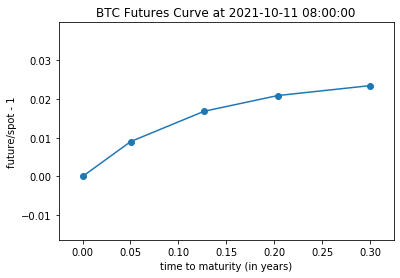

In [278]:
t = BTC_dt[-5000]


df = BTC_futuresCurve[t].copy()
df.sort_values('timeToMaturityinYears', inplace=True)
plt.title('BTC Futures Curve at '+t)
plt.ylabel('future/spot - 1')
plt.scatter(df.timeToMaturityinYears, df.open/df.open.iloc[0]-1)
plt.plot(df.timeToMaturityinYears, df.open/df.open.iloc[0]-1)
# plt.ylim((-0.005, 0.01))
plt.xlabel('time to maturity (in years)')

In [280]:
BTC_futuresCurve['2021-10-11 08:00:00']

,datetime,open,timeToMaturityinYears,instrumentName
0,2021-10-11 08:00:00,56802.72,0.000000,spot
1,2021-10-11 08:00:00,58135.00,0.299543,BTCF2022
2,2021-10-11 08:00:00,57315.00,0.050228,BTCV2021
3,2021-10-11 08:00:00,57760.00,0.126941,BTCX2021
4,2021-10-11 08:00:00,57990.00,0.203653,BTCZ2021


In [284]:
savePath = './CME_BTC_futuresCurve/'
for t in BTC_futuresCurve:  
    print(t)
    df = BTC_futuresCurve[t].copy()
    df.sort_values('timeToMaturityinYears', inplace=True)
    t = t.replace(':','')
    df.to_csv(savePath+t+'.csv')

2019-07-31 01:00:00
2019-07-31 02:00:00
2019-07-31 03:00:00
2019-07-31 04:00:00
2019-07-31 05:00:00
2019-07-31 06:00:00
2019-07-31 07:00:00
2019-07-31 08:00:00
2019-07-31 09:00:00
2019-07-31 10:00:00
2019-07-31 11:00:00
2019-07-31 12:00:00
2019-07-31 13:00:00
2019-07-31 14:00:00
2019-07-31 15:00:00
2019-07-31 16:00:00
2019-07-31 17:00:00
2019-07-31 18:00:00
2019-07-31 19:00:00
2019-07-31 20:00:00
2019-07-31 22:00:00
2019-07-31 23:00:00
2019-08-01 00:00:00
2019-08-01 01:00:00
2019-08-01 02:00:00
2019-08-01 03:00:00
2019-08-01 04:00:00
2019-08-01 05:00:00
2019-08-01 06:00:00
2019-08-01 07:00:00
2019-08-01 08:00:00
2019-08-01 09:00:00
2019-08-01 10:00:00
2019-08-01 11:00:00
2019-08-01 12:00:00
2019-08-01 13:00:00
2019-08-01 14:00:00
2019-08-01 15:00:00
2019-08-01 16:00:00
2019-08-01 17:00:00
2019-08-01 18:00:00
2019-08-01 19:00:00
2019-08-01 20:00:00
2019-08-01 22:00:00
2019-08-01 23:00:00
2019-08-02 00:00:00
2019-08-02 01:00:00
2019-08-02 02:00:00
2019-08-02 03:00:00
2019-08-02 04:00:00


2019-08-29 00:00:00
2019-08-29 01:00:00
2019-08-29 02:00:00
2019-08-29 03:00:00
2019-08-29 04:00:00
2019-08-29 05:00:00
2019-08-29 06:00:00
2019-08-29 07:00:00
2019-08-29 08:00:00
2019-08-29 09:00:00
2019-08-29 10:00:00
2019-08-29 11:00:00
2019-08-29 12:00:00
2019-08-29 13:00:00
2019-08-29 14:00:00
2019-08-29 15:00:00
2019-08-29 16:00:00
2019-08-29 17:00:00
2019-08-29 18:00:00
2019-08-29 19:00:00
2019-08-29 20:00:00
2019-08-29 22:00:00
2019-08-29 23:00:00
2019-08-30 00:00:00
2019-08-30 01:00:00
2019-08-30 02:00:00
2019-08-30 03:00:00
2019-08-30 04:00:00
2019-08-30 05:00:00
2019-08-30 06:00:00
2019-08-30 07:00:00
2019-08-30 08:00:00
2019-08-30 09:00:00
2019-08-30 10:00:00
2019-08-30 11:00:00
2019-08-30 12:00:00
2019-08-30 13:00:00
2019-08-30 14:00:00
2019-08-30 15:00:00
2019-08-30 16:00:00
2019-08-30 17:00:00
2019-08-30 18:00:00
2019-08-30 19:00:00
2019-08-30 20:00:00
2019-09-02 22:00:00
2019-09-02 23:00:00
2019-09-03 00:00:00
2019-09-03 01:00:00
2019-09-03 02:00:00
2019-09-03 03:00:00


2019-09-27 12:00:00
2019-09-27 13:00:00
2019-09-27 14:00:00
2019-09-27 15:00:00
2019-09-27 16:00:00
2019-09-27 17:00:00
2019-09-27 18:00:00
2019-09-27 19:00:00
2019-09-27 20:00:00
2019-09-29 22:00:00
2019-09-29 23:00:00
2019-09-30 00:00:00
2019-09-30 01:00:00
2019-09-30 02:00:00
2019-09-30 03:00:00
2019-09-30 04:00:00
2019-09-30 05:00:00
2019-09-30 06:00:00
2019-09-30 07:00:00
2019-09-30 08:00:00
2019-09-30 09:00:00
2019-09-30 10:00:00
2019-09-30 11:00:00
2019-09-30 12:00:00
2019-09-30 13:00:00
2019-09-30 14:00:00
2019-09-30 15:00:00
2019-09-30 16:00:00
2019-09-30 17:00:00
2019-09-30 18:00:00
2019-09-30 19:00:00
2019-09-30 20:00:00
2019-09-30 22:00:00
2019-09-30 23:00:00
2019-10-01 00:00:00
2019-10-01 01:00:00
2019-10-01 02:00:00
2019-10-01 03:00:00
2019-10-01 04:00:00
2019-10-01 05:00:00
2019-10-01 06:00:00
2019-10-01 07:00:00
2019-10-01 08:00:00
2019-10-01 09:00:00
2019-10-01 10:00:00
2019-10-01 11:00:00
2019-10-01 12:00:00
2019-10-01 13:00:00
2019-10-01 14:00:00
2019-10-01 15:00:00


2019-10-24 02:00:00
2019-10-24 03:00:00
2019-10-24 04:00:00
2019-10-24 05:00:00
2019-10-24 06:00:00
2019-10-24 07:00:00
2019-10-24 08:00:00
2019-10-24 09:00:00
2019-10-24 10:00:00
2019-10-24 11:00:00
2019-10-24 12:00:00
2019-10-24 13:00:00
2019-10-24 14:00:00
2019-10-24 15:00:00
2019-10-24 16:00:00
2019-10-24 17:00:00
2019-10-24 18:00:00
2019-10-24 19:00:00
2019-10-24 20:00:00
2019-10-24 22:00:00
2019-10-24 23:00:00
2019-10-25 00:00:00
2019-10-25 01:00:00
2019-10-25 02:00:00
2019-10-25 03:00:00
2019-10-25 04:00:00
2019-10-25 05:00:00
2019-10-25 06:00:00
2019-10-25 07:00:00
2019-10-25 08:00:00
2019-10-25 09:00:00
2019-10-25 10:00:00
2019-10-25 11:00:00
2019-10-25 12:00:00
2019-10-25 13:00:00
2019-10-25 14:00:00
2019-10-25 15:00:00
2019-10-25 16:00:00
2019-10-25 17:00:00
2019-10-25 18:00:00
2019-10-25 19:00:00
2019-10-25 20:00:00
2019-10-27 22:00:00
2019-10-27 23:00:00
2019-10-28 00:00:00
2019-10-28 01:00:00
2019-10-28 02:00:00
2019-10-28 03:00:00
2019-10-28 04:00:00
2019-10-28 05:00:00


2019-11-19 21:00:00
2019-11-19 23:00:00
2019-11-20 00:00:00
2019-11-20 01:00:00
2019-11-20 02:00:00
2019-11-20 03:00:00
2019-11-20 04:00:00
2019-11-20 05:00:00
2019-11-20 06:00:00
2019-11-20 07:00:00
2019-11-20 08:00:00
2019-11-20 09:00:00
2019-11-20 10:00:00
2019-11-20 11:00:00
2019-11-20 12:00:00
2019-11-20 13:00:00
2019-11-20 14:00:00
2019-11-20 15:00:00
2019-11-20 16:00:00
2019-11-20 17:00:00
2019-11-20 18:00:00
2019-11-20 19:00:00
2019-11-20 20:00:00
2019-11-20 21:00:00
2019-11-20 23:00:00
2019-11-21 00:00:00
2019-11-21 01:00:00
2019-11-21 02:00:00
2019-11-21 03:00:00
2019-11-21 04:00:00
2019-11-21 05:00:00
2019-11-21 06:00:00
2019-11-21 07:00:00
2019-11-21 08:00:00
2019-11-21 09:00:00
2019-11-21 10:00:00
2019-11-21 11:00:00
2019-11-21 12:00:00
2019-11-21 13:00:00
2019-11-21 14:00:00
2019-11-21 15:00:00
2019-11-21 16:00:00
2019-11-21 17:00:00
2019-11-21 18:00:00
2019-11-21 19:00:00
2019-11-21 20:00:00
2019-11-21 21:00:00
2019-11-21 23:00:00
2019-11-22 00:00:00
2019-11-22 01:00:00


2019-12-17 20:00:00
2019-12-17 21:00:00
2019-12-17 23:00:00
2019-12-18 00:00:00
2019-12-18 01:00:00
2019-12-18 02:00:00
2019-12-18 03:00:00
2019-12-18 04:00:00
2019-12-18 05:00:00
2019-12-18 06:00:00
2019-12-18 07:00:00
2019-12-18 08:00:00
2019-12-18 09:00:00
2019-12-18 10:00:00
2019-12-18 11:00:00
2019-12-18 12:00:00
2019-12-18 13:00:00
2019-12-18 14:00:00
2019-12-18 15:00:00
2019-12-18 16:00:00
2019-12-18 17:00:00
2019-12-18 18:00:00
2019-12-18 19:00:00
2019-12-18 20:00:00
2019-12-18 21:00:00
2019-12-18 23:00:00
2019-12-19 00:00:00
2019-12-19 01:00:00
2019-12-19 02:00:00
2019-12-19 03:00:00
2019-12-19 04:00:00
2019-12-19 05:00:00
2019-12-19 06:00:00
2019-12-19 07:00:00
2019-12-19 08:00:00
2019-12-19 09:00:00
2019-12-19 10:00:00
2019-12-19 11:00:00
2019-12-19 12:00:00
2019-12-19 13:00:00
2019-12-19 14:00:00
2019-12-19 15:00:00
2019-12-19 16:00:00
2019-12-19 17:00:00
2019-12-19 18:00:00
2019-12-19 19:00:00
2019-12-19 20:00:00
2019-12-19 21:00:00
2019-12-19 23:00:00
2019-12-20 00:00:00


2020-01-20 07:00:00
2020-01-20 08:00:00
2020-01-20 09:00:00
2020-01-20 10:00:00
2020-01-20 11:00:00
2020-01-20 12:00:00
2020-01-20 13:00:00
2020-01-20 14:00:00
2020-01-20 15:00:00
2020-01-20 16:00:00
2020-01-20 17:00:00
2020-01-20 23:00:00
2020-01-21 00:00:00
2020-01-21 01:00:00
2020-01-21 02:00:00
2020-01-21 03:00:00
2020-01-21 04:00:00
2020-01-21 05:00:00
2020-01-21 06:00:00
2020-01-21 07:00:00
2020-01-21 08:00:00
2020-01-21 09:00:00
2020-01-21 10:00:00
2020-01-21 11:00:00
2020-01-21 12:00:00
2020-01-21 13:00:00
2020-01-21 14:00:00
2020-01-21 15:00:00
2020-01-21 16:00:00
2020-01-21 17:00:00
2020-01-21 18:00:00
2020-01-21 19:00:00
2020-01-21 20:00:00
2020-01-21 21:00:00
2020-01-21 23:00:00
2020-01-22 00:00:00
2020-01-22 01:00:00
2020-01-22 02:00:00
2020-01-22 03:00:00
2020-01-22 04:00:00
2020-01-22 05:00:00
2020-01-22 06:00:00
2020-01-22 07:00:00
2020-01-22 08:00:00
2020-01-22 09:00:00
2020-01-22 10:00:00
2020-01-22 11:00:00
2020-01-22 12:00:00
2020-01-22 13:00:00
2020-01-22 14:00:00


2020-02-18 11:00:00
2020-02-18 12:00:00
2020-02-18 13:00:00
2020-02-18 14:00:00
2020-02-18 15:00:00
2020-02-18 16:00:00
2020-02-18 17:00:00
2020-02-18 18:00:00
2020-02-18 19:00:00
2020-02-18 20:00:00
2020-02-18 21:00:00
2020-02-18 23:00:00
2020-02-19 00:00:00
2020-02-19 01:00:00
2020-02-19 02:00:00
2020-02-19 03:00:00
2020-02-19 04:00:00
2020-02-19 05:00:00
2020-02-19 06:00:00
2020-02-19 07:00:00
2020-02-19 08:00:00
2020-02-19 09:00:00
2020-02-19 10:00:00
2020-02-19 11:00:00
2020-02-19 12:00:00
2020-02-19 13:00:00
2020-02-19 14:00:00
2020-02-19 15:00:00
2020-02-19 16:00:00
2020-02-19 17:00:00
2020-02-19 18:00:00
2020-02-19 19:00:00
2020-02-19 20:00:00
2020-02-19 21:00:00
2020-02-19 23:00:00
2020-02-20 00:00:00
2020-02-20 01:00:00
2020-02-20 02:00:00
2020-02-20 03:00:00
2020-02-20 04:00:00
2020-02-20 05:00:00
2020-02-20 06:00:00
2020-02-20 07:00:00
2020-02-20 08:00:00
2020-02-20 09:00:00
2020-02-20 10:00:00
2020-02-20 11:00:00
2020-02-20 12:00:00
2020-02-20 13:00:00
2020-02-20 14:00:00


2020-03-17 16:00:00
2020-03-17 17:00:00
2020-03-17 18:00:00
2020-03-17 19:00:00
2020-03-17 20:00:00
2020-03-17 22:00:00
2020-03-17 23:00:00
2020-03-18 00:00:00
2020-03-18 01:00:00
2020-03-18 02:00:00
2020-03-18 03:00:00
2020-03-18 04:00:00
2020-03-18 05:00:00
2020-03-18 06:00:00
2020-03-18 07:00:00
2020-03-18 08:00:00
2020-03-18 09:00:00
2020-03-18 10:00:00
2020-03-18 11:00:00
2020-03-18 12:00:00
2020-03-18 13:00:00
2020-03-18 14:00:00
2020-03-18 15:00:00
2020-03-18 16:00:00
2020-03-18 17:00:00
2020-03-18 18:00:00
2020-03-18 19:00:00
2020-03-18 20:00:00
2020-03-18 22:00:00
2020-03-18 23:00:00
2020-03-19 00:00:00
2020-03-19 01:00:00
2020-03-19 02:00:00
2020-03-19 03:00:00
2020-03-19 04:00:00
2020-03-19 05:00:00
2020-03-19 06:00:00
2020-03-19 07:00:00
2020-03-19 08:00:00
2020-03-19 09:00:00
2020-03-19 10:00:00
2020-03-19 11:00:00
2020-03-19 12:00:00
2020-03-19 13:00:00
2020-03-19 14:00:00
2020-03-19 15:00:00
2020-03-19 16:00:00
2020-03-19 17:00:00
2020-03-19 18:00:00
2020-03-19 19:00:00


2020-04-17 03:00:00
2020-04-17 04:00:00
2020-04-17 05:00:00
2020-04-17 06:00:00
2020-04-17 07:00:00
2020-04-17 08:00:00
2020-04-17 09:00:00
2020-04-17 10:00:00
2020-04-17 11:00:00
2020-04-17 12:00:00
2020-04-17 13:00:00
2020-04-17 14:00:00
2020-04-17 15:00:00
2020-04-17 16:00:00
2020-04-17 17:00:00
2020-04-17 18:00:00
2020-04-17 19:00:00
2020-04-17 20:00:00
2020-04-19 22:00:00
2020-04-19 23:00:00
2020-04-20 00:00:00
2020-04-20 01:00:00
2020-04-20 02:00:00
2020-04-20 03:00:00
2020-04-20 04:00:00
2020-04-20 05:00:00
2020-04-20 06:00:00
2020-04-20 07:00:00
2020-04-20 08:00:00
2020-04-20 09:00:00
2020-04-20 10:00:00
2020-04-20 11:00:00
2020-04-20 12:00:00
2020-04-20 13:00:00
2020-04-20 14:00:00
2020-04-20 15:00:00
2020-04-20 16:00:00
2020-04-20 17:00:00
2020-04-20 18:00:00
2020-04-20 19:00:00
2020-04-20 20:00:00
2020-04-20 22:00:00
2020-04-20 23:00:00
2020-04-21 00:00:00
2020-04-21 01:00:00
2020-04-21 02:00:00
2020-04-21 03:00:00
2020-04-21 04:00:00
2020-04-21 05:00:00
2020-04-21 06:00:00


2020-05-18 15:00:00
2020-05-18 16:00:00
2020-05-18 17:00:00
2020-05-18 18:00:00
2020-05-18 19:00:00
2020-05-18 20:00:00
2020-05-18 22:00:00
2020-05-18 23:00:00
2020-05-19 00:00:00
2020-05-19 01:00:00
2020-05-19 02:00:00
2020-05-19 03:00:00
2020-05-19 04:00:00
2020-05-19 05:00:00
2020-05-19 06:00:00
2020-05-19 07:00:00
2020-05-19 08:00:00
2020-05-19 09:00:00
2020-05-19 10:00:00
2020-05-19 11:00:00
2020-05-19 12:00:00
2020-05-19 13:00:00
2020-05-19 14:00:00
2020-05-19 15:00:00
2020-05-19 16:00:00
2020-05-19 17:00:00
2020-05-19 18:00:00
2020-05-19 19:00:00
2020-05-19 20:00:00
2020-05-19 22:00:00
2020-05-19 23:00:00
2020-05-20 00:00:00
2020-05-20 01:00:00
2020-05-20 02:00:00
2020-05-20 03:00:00
2020-05-20 04:00:00
2020-05-20 05:00:00
2020-05-20 06:00:00
2020-05-20 07:00:00
2020-05-20 08:00:00
2020-05-20 09:00:00
2020-05-20 10:00:00
2020-05-20 11:00:00
2020-05-20 12:00:00
2020-05-20 13:00:00
2020-05-20 14:00:00
2020-05-20 15:00:00
2020-05-20 16:00:00
2020-05-20 17:00:00
2020-05-20 18:00:00


2020-06-16 14:00:00
2020-06-16 15:00:00
2020-06-16 16:00:00
2020-06-16 17:00:00
2020-06-16 18:00:00
2020-06-16 19:00:00
2020-06-16 20:00:00
2020-06-16 22:00:00
2020-06-16 23:00:00
2020-06-17 00:00:00
2020-06-17 01:00:00
2020-06-17 02:00:00
2020-06-17 03:00:00
2020-06-17 04:00:00
2020-06-17 05:00:00
2020-06-17 06:00:00
2020-06-17 07:00:00
2020-06-17 08:00:00
2020-06-17 09:00:00
2020-06-17 10:00:00
2020-06-17 11:00:00
2020-06-17 12:00:00
2020-06-17 13:00:00
2020-06-17 14:00:00
2020-06-17 15:00:00
2020-06-17 16:00:00
2020-06-17 17:00:00
2020-06-17 18:00:00
2020-06-17 19:00:00
2020-06-17 20:00:00
2020-06-17 22:00:00
2020-06-17 23:00:00
2020-06-18 00:00:00
2020-06-18 01:00:00
2020-06-18 02:00:00
2020-06-18 03:00:00
2020-06-18 04:00:00
2020-06-18 05:00:00
2020-06-18 06:00:00
2020-06-18 07:00:00
2020-06-18 08:00:00
2020-06-18 09:00:00
2020-06-18 10:00:00
2020-06-18 11:00:00
2020-06-18 12:00:00
2020-06-18 13:00:00
2020-06-18 14:00:00
2020-06-18 15:00:00
2020-06-18 16:00:00
2020-06-18 17:00:00


2020-07-16 04:00:00
2020-07-16 05:00:00
2020-07-16 06:00:00
2020-07-16 07:00:00
2020-07-16 08:00:00
2020-07-16 09:00:00
2020-07-16 10:00:00
2020-07-16 11:00:00
2020-07-16 12:00:00
2020-07-16 13:00:00
2020-07-16 14:00:00
2020-07-16 15:00:00
2020-07-16 16:00:00
2020-07-16 17:00:00
2020-07-16 18:00:00
2020-07-16 19:00:00
2020-07-16 20:00:00
2020-07-16 22:00:00
2020-07-16 23:00:00
2020-07-17 00:00:00
2020-07-17 01:00:00
2020-07-17 02:00:00
2020-07-17 03:00:00
2020-07-17 04:00:00
2020-07-17 05:00:00
2020-07-17 06:00:00
2020-07-17 07:00:00
2020-07-17 08:00:00
2020-07-17 09:00:00
2020-07-17 10:00:00
2020-07-17 11:00:00
2020-07-17 12:00:00
2020-07-17 13:00:00
2020-07-17 14:00:00
2020-07-17 15:00:00
2020-07-17 16:00:00
2020-07-17 17:00:00
2020-07-17 18:00:00
2020-07-17 19:00:00
2020-07-17 20:00:00
2020-07-19 22:00:00
2020-07-19 23:00:00
2020-07-20 00:00:00
2020-07-20 01:00:00
2020-07-20 02:00:00
2020-07-20 03:00:00
2020-07-20 04:00:00
2020-07-20 05:00:00
2020-07-20 06:00:00
2020-07-20 07:00:00


2020-08-13 12:00:00
2020-08-13 13:00:00
2020-08-13 14:00:00
2020-08-13 15:00:00
2020-08-13 16:00:00
2020-08-13 17:00:00
2020-08-13 18:00:00
2020-08-13 19:00:00
2020-08-13 20:00:00
2020-08-13 22:00:00
2020-08-13 23:00:00
2020-08-14 00:00:00
2020-08-14 01:00:00
2020-08-14 02:00:00
2020-08-14 03:00:00
2020-08-14 04:00:00
2020-08-14 05:00:00
2020-08-14 06:00:00
2020-08-14 07:00:00
2020-08-14 08:00:00
2020-08-14 09:00:00
2020-08-14 10:00:00
2020-08-14 11:00:00
2020-08-14 12:00:00
2020-08-14 13:00:00
2020-08-14 14:00:00
2020-08-14 15:00:00
2020-08-14 16:00:00
2020-08-14 17:00:00
2020-08-14 18:00:00
2020-08-14 19:00:00
2020-08-14 20:00:00
2020-08-16 22:00:00
2020-08-16 23:00:00
2020-08-17 00:00:00
2020-08-17 01:00:00
2020-08-17 02:00:00
2020-08-17 03:00:00
2020-08-17 04:00:00
2020-08-17 05:00:00
2020-08-17 06:00:00
2020-08-17 07:00:00
2020-08-17 08:00:00
2020-08-17 09:00:00
2020-08-17 10:00:00
2020-08-17 11:00:00
2020-08-17 12:00:00
2020-08-17 13:00:00
2020-08-17 14:00:00
2020-08-17 15:00:00


2020-09-10 20:00:00
2020-09-10 22:00:00
2020-09-10 23:00:00
2020-09-11 00:00:00
2020-09-11 01:00:00
2020-09-11 02:00:00
2020-09-11 03:00:00
2020-09-11 04:00:00
2020-09-11 05:00:00
2020-09-11 06:00:00
2020-09-11 07:00:00
2020-09-11 08:00:00
2020-09-11 09:00:00
2020-09-11 10:00:00
2020-09-11 11:00:00
2020-09-11 12:00:00
2020-09-11 13:00:00
2020-09-11 14:00:00
2020-09-11 15:00:00
2020-09-11 16:00:00
2020-09-11 17:00:00
2020-09-11 18:00:00
2020-09-11 19:00:00
2020-09-11 20:00:00
2020-09-13 22:00:00
2020-09-13 23:00:00
2020-09-14 00:00:00
2020-09-14 01:00:00
2020-09-14 02:00:00
2020-09-14 03:00:00
2020-09-14 04:00:00
2020-09-14 05:00:00
2020-09-14 06:00:00
2020-09-14 07:00:00
2020-09-14 08:00:00
2020-09-14 09:00:00
2020-09-14 10:00:00
2020-09-14 11:00:00
2020-09-14 12:00:00
2020-09-14 13:00:00
2020-09-14 14:00:00
2020-09-14 15:00:00
2020-09-14 16:00:00
2020-09-14 17:00:00
2020-09-14 18:00:00
2020-09-14 19:00:00
2020-09-14 20:00:00
2020-09-14 22:00:00
2020-09-14 23:00:00
2020-09-15 00:00:00


2020-10-09 05:00:00
2020-10-09 06:00:00
2020-10-09 07:00:00
2020-10-09 08:00:00
2020-10-09 09:00:00
2020-10-09 10:00:00
2020-10-09 11:00:00
2020-10-09 12:00:00
2020-10-09 13:00:00
2020-10-09 14:00:00
2020-10-09 15:00:00
2020-10-09 16:00:00
2020-10-09 17:00:00
2020-10-09 18:00:00
2020-10-09 19:00:00
2020-10-09 20:00:00
2020-10-11 22:00:00
2020-10-11 23:00:00
2020-10-12 00:00:00
2020-10-12 01:00:00
2020-10-12 02:00:00
2020-10-12 03:00:00
2020-10-12 04:00:00
2020-10-12 05:00:00
2020-10-12 06:00:00
2020-10-12 07:00:00
2020-10-12 08:00:00
2020-10-12 09:00:00
2020-10-12 10:00:00
2020-10-12 11:00:00
2020-10-12 12:00:00
2020-10-12 13:00:00
2020-10-12 14:00:00
2020-10-12 15:00:00
2020-10-12 16:00:00
2020-10-12 17:00:00
2020-10-12 18:00:00
2020-10-12 19:00:00
2020-10-12 20:00:00
2020-10-12 22:00:00
2020-10-12 23:00:00
2020-10-13 00:00:00
2020-10-13 01:00:00
2020-10-13 02:00:00
2020-10-13 03:00:00
2020-10-13 04:00:00
2020-10-13 05:00:00
2020-10-13 06:00:00
2020-10-13 07:00:00
2020-10-13 08:00:00


2020-11-10 13:00:00
2020-11-10 14:00:00
2020-11-10 15:00:00
2020-11-10 16:00:00
2020-11-10 17:00:00
2020-11-10 18:00:00
2020-11-10 19:00:00
2020-11-10 20:00:00
2020-11-10 21:00:00
2020-11-10 23:00:00
2020-11-11 00:00:00
2020-11-11 01:00:00
2020-11-11 02:00:00
2020-11-11 03:00:00
2020-11-11 04:00:00
2020-11-11 05:00:00
2020-11-11 06:00:00
2020-11-11 07:00:00
2020-11-11 08:00:00
2020-11-11 09:00:00
2020-11-11 10:00:00
2020-11-11 11:00:00
2020-11-11 12:00:00
2020-11-11 13:00:00
2020-11-11 14:00:00
2020-11-11 15:00:00
2020-11-11 16:00:00
2020-11-11 17:00:00
2020-11-11 18:00:00
2020-11-11 19:00:00
2020-11-11 20:00:00
2020-11-11 21:00:00
2020-11-11 23:00:00
2020-11-12 00:00:00
2020-11-12 01:00:00
2020-11-12 02:00:00
2020-11-12 03:00:00
2020-11-12 04:00:00
2020-11-12 05:00:00
2020-11-12 06:00:00
2020-11-12 07:00:00
2020-11-12 08:00:00
2020-11-12 09:00:00
2020-11-12 10:00:00
2020-11-12 11:00:00
2020-11-12 12:00:00
2020-11-12 13:00:00
2020-11-12 14:00:00
2020-11-12 15:00:00
2020-11-12 16:00:00


2020-12-09 04:00:00
2020-12-09 05:00:00
2020-12-09 06:00:00
2020-12-09 07:00:00
2020-12-09 08:00:00
2020-12-09 09:00:00
2020-12-09 10:00:00
2020-12-09 11:00:00
2020-12-09 12:00:00
2020-12-09 13:00:00
2020-12-09 14:00:00
2020-12-09 15:00:00
2020-12-09 16:00:00
2020-12-09 17:00:00
2020-12-09 18:00:00
2020-12-09 19:00:00
2020-12-09 20:00:00
2020-12-09 21:00:00
2020-12-09 23:00:00
2020-12-10 00:00:00
2020-12-10 01:00:00
2020-12-10 02:00:00
2020-12-10 03:00:00
2020-12-10 04:00:00
2020-12-10 05:00:00
2020-12-10 06:00:00
2020-12-10 07:00:00
2020-12-10 08:00:00
2020-12-10 09:00:00
2020-12-10 10:00:00
2020-12-10 11:00:00
2020-12-10 12:00:00
2020-12-10 13:00:00
2020-12-10 14:00:00
2020-12-10 15:00:00
2020-12-10 16:00:00
2020-12-10 17:00:00
2020-12-10 18:00:00
2020-12-10 19:00:00
2020-12-10 20:00:00
2020-12-10 21:00:00
2020-12-10 23:00:00
2020-12-11 00:00:00
2020-12-11 01:00:00
2020-12-11 02:00:00
2020-12-11 03:00:00
2020-12-11 04:00:00
2020-12-11 05:00:00
2020-12-11 06:00:00
2020-12-11 07:00:00


2021-01-08 02:00:00
2021-01-08 03:00:00
2021-01-08 04:00:00
2021-01-08 05:00:00
2021-01-08 06:00:00
2021-01-08 07:00:00
2021-01-08 08:00:00
2021-01-08 09:00:00
2021-01-08 10:00:00
2021-01-08 11:00:00
2021-01-08 12:00:00
2021-01-08 13:00:00
2021-01-08 14:00:00
2021-01-08 15:00:00
2021-01-08 16:00:00
2021-01-08 17:00:00
2021-01-08 18:00:00
2021-01-08 19:00:00
2021-01-08 20:00:00
2021-01-08 21:00:00
2021-01-10 23:00:00
2021-01-11 00:00:00
2021-01-11 01:00:00
2021-01-11 02:00:00
2021-01-11 03:00:00
2021-01-11 04:00:00
2021-01-11 05:00:00
2021-01-11 06:00:00
2021-01-11 07:00:00
2021-01-11 08:00:00
2021-01-11 09:00:00
2021-01-11 10:00:00
2021-01-11 11:00:00
2021-01-11 12:00:00
2021-01-11 13:00:00
2021-01-11 14:00:00
2021-01-11 15:00:00
2021-01-11 16:00:00
2021-01-11 17:00:00
2021-01-11 18:00:00
2021-01-11 19:00:00
2021-01-11 20:00:00
2021-01-11 21:00:00
2021-01-11 23:00:00
2021-01-12 00:00:00
2021-01-12 01:00:00
2021-01-12 02:00:00
2021-01-12 03:00:00
2021-01-12 04:00:00
2021-01-12 05:00:00


2021-02-04 15:00:00
2021-02-04 16:00:00
2021-02-04 17:00:00
2021-02-04 18:00:00
2021-02-04 19:00:00
2021-02-04 20:00:00
2021-02-04 21:00:00
2021-02-04 23:00:00
2021-02-05 00:00:00
2021-02-05 01:00:00
2021-02-05 02:00:00
2021-02-05 03:00:00
2021-02-05 04:00:00
2021-02-05 05:00:00
2021-02-05 06:00:00
2021-02-05 07:00:00
2021-02-05 08:00:00
2021-02-05 09:00:00
2021-02-05 10:00:00
2021-02-05 11:00:00
2021-02-05 12:00:00
2021-02-05 13:00:00
2021-02-05 14:00:00
2021-02-05 15:00:00
2021-02-05 16:00:00
2021-02-05 17:00:00
2021-02-05 18:00:00
2021-02-05 19:00:00
2021-02-05 20:00:00
2021-02-05 21:00:00
2021-02-07 23:00:00
2021-02-08 00:00:00
2021-02-08 01:00:00
2021-02-08 02:00:00
2021-02-08 03:00:00
2021-02-08 04:00:00
2021-02-08 05:00:00
2021-02-08 06:00:00
2021-02-08 07:00:00
2021-02-08 08:00:00
2021-02-08 09:00:00
2021-02-08 10:00:00
2021-02-08 11:00:00
2021-02-08 12:00:00
2021-02-08 13:00:00
2021-02-08 14:00:00
2021-02-08 15:00:00
2021-02-08 16:00:00
2021-02-08 17:00:00
2021-02-08 18:00:00


2021-03-04 04:00:00
2021-03-04 05:00:00
2021-03-04 06:00:00
2021-03-04 07:00:00
2021-03-04 08:00:00
2021-03-04 09:00:00
2021-03-04 10:00:00
2021-03-04 11:00:00
2021-03-04 12:00:00
2021-03-04 13:00:00
2021-03-04 14:00:00
2021-03-04 15:00:00
2021-03-04 16:00:00
2021-03-04 17:00:00
2021-03-04 18:00:00
2021-03-04 19:00:00
2021-03-04 20:00:00
2021-03-04 21:00:00
2021-03-04 23:00:00
2021-03-05 00:00:00
2021-03-05 01:00:00
2021-03-05 02:00:00
2021-03-05 03:00:00
2021-03-05 04:00:00
2021-03-05 05:00:00
2021-03-05 06:00:00
2021-03-05 07:00:00
2021-03-05 08:00:00
2021-03-05 09:00:00
2021-03-05 10:00:00
2021-03-05 11:00:00
2021-03-05 12:00:00
2021-03-05 13:00:00
2021-03-05 14:00:00
2021-03-05 15:00:00
2021-03-05 16:00:00
2021-03-05 17:00:00
2021-03-05 18:00:00
2021-03-05 19:00:00
2021-03-05 20:00:00
2021-03-05 21:00:00
2021-03-07 23:00:00
2021-03-08 00:00:00
2021-03-08 01:00:00
2021-03-08 02:00:00
2021-03-08 03:00:00
2021-03-08 04:00:00
2021-03-08 05:00:00
2021-03-08 06:00:00
2021-03-08 07:00:00


2021-03-30 08:00:00
2021-03-30 09:00:00
2021-03-30 10:00:00
2021-03-30 11:00:00
2021-03-30 12:00:00
2021-03-30 13:00:00
2021-03-30 14:00:00
2021-03-30 15:00:00
2021-03-30 16:00:00
2021-03-30 17:00:00
2021-03-30 18:00:00
2021-03-30 19:00:00
2021-03-30 20:00:00
2021-03-30 22:00:00
2021-03-30 23:00:00
2021-03-31 00:00:00
2021-03-31 01:00:00
2021-03-31 02:00:00
2021-03-31 03:00:00
2021-03-31 04:00:00
2021-03-31 05:00:00
2021-03-31 06:00:00
2021-03-31 07:00:00
2021-03-31 08:00:00
2021-03-31 09:00:00
2021-03-31 10:00:00
2021-03-31 11:00:00
2021-03-31 12:00:00
2021-03-31 13:00:00
2021-03-31 14:00:00
2021-03-31 15:00:00
2021-03-31 16:00:00
2021-03-31 17:00:00
2021-03-31 18:00:00
2021-03-31 19:00:00
2021-03-31 20:00:00
2021-03-31 22:00:00
2021-03-31 23:00:00
2021-04-01 00:00:00
2021-04-01 01:00:00
2021-04-01 02:00:00
2021-04-01 03:00:00
2021-04-01 04:00:00
2021-04-01 05:00:00
2021-04-01 06:00:00
2021-04-01 07:00:00
2021-04-01 08:00:00
2021-04-01 09:00:00
2021-04-01 10:00:00
2021-04-01 11:00:00


2021-04-26 23:00:00
2021-04-27 00:00:00
2021-04-27 01:00:00
2021-04-27 02:00:00
2021-04-27 03:00:00
2021-04-27 04:00:00
2021-04-27 05:00:00
2021-04-27 06:00:00
2021-04-27 07:00:00
2021-04-27 08:00:00
2021-04-27 09:00:00
2021-04-27 10:00:00
2021-04-27 11:00:00
2021-04-27 12:00:00
2021-04-27 13:00:00
2021-04-27 14:00:00
2021-04-27 15:00:00
2021-04-27 16:00:00
2021-04-27 17:00:00
2021-04-27 18:00:00
2021-04-27 19:00:00
2021-04-27 20:00:00
2021-04-27 22:00:00
2021-04-27 23:00:00
2021-04-28 00:00:00
2021-04-28 01:00:00
2021-04-28 02:00:00
2021-04-28 03:00:00
2021-04-28 04:00:00
2021-04-28 05:00:00
2021-04-28 06:00:00
2021-04-28 07:00:00
2021-04-28 08:00:00
2021-04-28 09:00:00
2021-04-28 10:00:00
2021-04-28 11:00:00
2021-04-28 12:00:00
2021-04-28 13:00:00
2021-04-28 14:00:00
2021-04-28 15:00:00
2021-04-28 16:00:00
2021-04-28 17:00:00
2021-04-28 18:00:00
2021-04-28 19:00:00
2021-04-28 20:00:00
2021-04-28 22:00:00
2021-04-28 23:00:00
2021-04-29 00:00:00
2021-04-29 01:00:00
2021-04-29 02:00:00


2021-05-27 09:00:00
2021-05-27 10:00:00
2021-05-27 11:00:00
2021-05-27 12:00:00
2021-05-27 13:00:00
2021-05-27 14:00:00
2021-05-27 15:00:00
2021-05-27 16:00:00
2021-05-27 17:00:00
2021-05-27 18:00:00
2021-05-27 19:00:00
2021-05-27 20:00:00
2021-05-27 22:00:00
2021-05-27 23:00:00
2021-05-28 00:00:00
2021-05-28 01:00:00
2021-05-28 02:00:00
2021-05-28 03:00:00
2021-05-28 04:00:00
2021-05-28 05:00:00
2021-05-28 06:00:00
2021-05-28 07:00:00
2021-05-28 08:00:00
2021-05-28 09:00:00
2021-05-28 10:00:00
2021-05-28 11:00:00
2021-05-28 12:00:00
2021-05-28 13:00:00
2021-05-28 14:00:00
2021-05-28 15:00:00
2021-05-28 16:00:00
2021-05-28 17:00:00
2021-05-28 18:00:00
2021-05-28 19:00:00
2021-05-28 20:00:00
2021-05-30 22:00:00
2021-05-30 23:00:00
2021-05-31 00:00:00
2021-05-31 01:00:00
2021-05-31 02:00:00
2021-05-31 03:00:00
2021-05-31 04:00:00
2021-05-31 05:00:00
2021-05-31 06:00:00
2021-05-31 07:00:00
2021-05-31 08:00:00
2021-05-31 09:00:00
2021-05-31 10:00:00
2021-05-31 11:00:00
2021-05-31 12:00:00


2021-06-29 15:00:00
2021-06-29 16:00:00
2021-06-29 17:00:00
2021-06-29 18:00:00
2021-06-29 19:00:00
2021-06-29 20:00:00
2021-06-29 22:00:00
2021-06-29 23:00:00
2021-06-30 00:00:00
2021-06-30 01:00:00
2021-06-30 02:00:00
2021-06-30 03:00:00
2021-06-30 04:00:00
2021-06-30 05:00:00
2021-06-30 06:00:00
2021-06-30 07:00:00
2021-06-30 08:00:00
2021-06-30 09:00:00
2021-06-30 10:00:00
2021-06-30 11:00:00
2021-06-30 12:00:00
2021-06-30 13:00:00
2021-06-30 14:00:00
2021-06-30 15:00:00
2021-06-30 16:00:00
2021-06-30 17:00:00
2021-06-30 18:00:00
2021-06-30 19:00:00
2021-06-30 20:00:00
2021-06-30 22:00:00
2021-06-30 23:00:00
2021-07-01 00:00:00
2021-07-01 01:00:00
2021-07-01 02:00:00
2021-07-01 03:00:00
2021-07-01 04:00:00
2021-07-01 05:00:00
2021-07-01 06:00:00
2021-07-01 07:00:00
2021-07-01 08:00:00
2021-07-01 09:00:00
2021-07-01 10:00:00
2021-07-01 11:00:00
2021-07-01 12:00:00
2021-07-01 13:00:00
2021-07-01 14:00:00
2021-07-01 15:00:00
2021-07-01 16:00:00
2021-07-01 17:00:00
2021-07-01 18:00:00


2021-07-29 19:00:00
2021-07-29 20:00:00
2021-07-29 22:00:00
2021-07-29 23:00:00
2021-07-30 00:00:00
2021-07-30 01:00:00
2021-07-30 02:00:00
2021-07-30 03:00:00
2021-07-30 04:00:00
2021-07-30 05:00:00
2021-07-30 06:00:00
2021-07-30 07:00:00
2021-07-30 08:00:00
2021-07-30 09:00:00
2021-07-30 10:00:00
2021-07-30 11:00:00
2021-07-30 12:00:00
2021-07-30 13:00:00
2021-07-30 14:00:00
2021-07-30 15:00:00
2021-07-30 16:00:00
2021-07-30 17:00:00
2021-07-30 18:00:00
2021-07-30 19:00:00
2021-07-30 20:00:00
2021-08-01 22:00:00
2021-08-01 23:00:00
2021-08-02 00:00:00
2021-08-02 01:00:00
2021-08-02 02:00:00
2021-08-02 03:00:00
2021-08-02 04:00:00
2021-08-02 05:00:00
2021-08-02 06:00:00
2021-08-02 07:00:00
2021-08-02 08:00:00
2021-08-02 09:00:00
2021-08-02 10:00:00
2021-08-02 11:00:00
2021-08-02 12:00:00
2021-08-02 13:00:00
2021-08-02 14:00:00
2021-08-02 15:00:00
2021-08-02 16:00:00
2021-08-02 17:00:00
2021-08-02 18:00:00
2021-08-02 19:00:00
2021-08-02 20:00:00
2021-08-02 22:00:00
2021-08-02 23:00:00


2021-08-31 12:00:00
2021-08-31 13:00:00
2021-08-31 14:00:00
2021-08-31 15:00:00
2021-08-31 16:00:00
2021-08-31 17:00:00
2021-08-31 18:00:00
2021-08-31 19:00:00
2021-08-31 20:00:00
2021-08-31 22:00:00
2021-08-31 23:00:00
2021-09-01 00:00:00
2021-09-01 01:00:00
2021-09-01 02:00:00
2021-09-01 03:00:00
2021-09-01 04:00:00
2021-09-01 05:00:00
2021-09-01 06:00:00
2021-09-01 07:00:00
2021-09-01 08:00:00
2021-09-01 09:00:00
2021-09-01 10:00:00
2021-09-01 11:00:00
2021-09-01 12:00:00
2021-09-01 13:00:00
2021-09-01 14:00:00
2021-09-01 15:00:00
2021-09-01 16:00:00
2021-09-01 17:00:00
2021-09-01 18:00:00
2021-09-01 19:00:00
2021-09-01 20:00:00
2021-09-01 22:00:00
2021-09-01 23:00:00
2021-09-02 00:00:00
2021-09-02 01:00:00
2021-09-02 02:00:00
2021-09-02 03:00:00
2021-09-02 04:00:00
2021-09-02 05:00:00
2021-09-02 06:00:00
2021-09-02 07:00:00
2021-09-02 08:00:00
2021-09-02 09:00:00
2021-09-02 10:00:00
2021-09-02 11:00:00
2021-09-02 12:00:00
2021-09-02 13:00:00
2021-09-02 14:00:00
2021-09-02 15:00:00


2021-09-30 06:00:00
2021-09-30 07:00:00
2021-09-30 08:00:00
2021-09-30 09:00:00
2021-09-30 10:00:00
2021-09-30 11:00:00
2021-09-30 12:00:00
2021-09-30 13:00:00
2021-09-30 14:00:00
2021-09-30 15:00:00
2021-09-30 16:00:00
2021-09-30 17:00:00
2021-09-30 18:00:00
2021-09-30 19:00:00
2021-09-30 20:00:00
2021-09-30 22:00:00
2021-09-30 23:00:00
2021-10-01 00:00:00
2021-10-01 01:00:00
2021-10-01 02:00:00
2021-10-01 03:00:00
2021-10-01 04:00:00
2021-10-01 05:00:00
2021-10-01 06:00:00
2021-10-01 07:00:00
2021-10-01 08:00:00
2021-10-01 09:00:00
2021-10-01 10:00:00
2021-10-01 11:00:00
2021-10-01 12:00:00
2021-10-01 13:00:00
2021-10-01 14:00:00
2021-10-01 15:00:00
2021-10-01 16:00:00
2021-10-01 17:00:00
2021-10-01 18:00:00
2021-10-01 19:00:00
2021-10-01 20:00:00
2021-10-03 22:00:00
2021-10-03 23:00:00
2021-10-04 00:00:00
2021-10-04 01:00:00
2021-10-04 02:00:00
2021-10-04 03:00:00
2021-10-04 04:00:00
2021-10-04 05:00:00
2021-10-04 06:00:00
2021-10-04 07:00:00
2021-10-04 08:00:00
2021-10-04 09:00:00


2021-11-01 20:00:00
2021-11-01 22:00:00
2021-11-01 23:00:00
2021-11-02 00:00:00
2021-11-02 01:00:00
2021-11-02 02:00:00
2021-11-02 03:00:00
2021-11-02 04:00:00
2021-11-02 05:00:00
2021-11-02 06:00:00
2021-11-02 07:00:00
2021-11-02 08:00:00
2021-11-02 09:00:00
2021-11-02 10:00:00
2021-11-02 11:00:00
2021-11-02 12:00:00
2021-11-02 13:00:00
2021-11-02 14:00:00
2021-11-02 15:00:00
2021-11-02 16:00:00
2021-11-02 17:00:00
2021-11-02 18:00:00
2021-11-02 19:00:00
2021-11-02 20:00:00
2021-11-02 22:00:00
2021-11-02 23:00:00
2021-11-03 00:00:00
2021-11-03 01:00:00
2021-11-03 02:00:00
2021-11-03 03:00:00
2021-11-03 04:00:00
2021-11-03 05:00:00
2021-11-03 06:00:00
2021-11-03 07:00:00
2021-11-03 08:00:00
2021-11-03 09:00:00
2021-11-03 10:00:00
2021-11-03 11:00:00
2021-11-03 12:00:00
2021-11-03 13:00:00
2021-11-03 14:00:00
2021-11-03 15:00:00
2021-11-03 16:00:00
2021-11-03 17:00:00
2021-11-03 18:00:00
2021-11-03 19:00:00
2021-11-03 20:00:00
2021-11-03 22:00:00
2021-11-03 23:00:00
2021-11-04 00:00:00


2021-12-01 06:00:00
2021-12-01 07:00:00
2021-12-01 08:00:00
2021-12-01 09:00:00
2021-12-01 10:00:00
2021-12-01 11:00:00
2021-12-01 12:00:00
2021-12-01 13:00:00
2021-12-01 14:00:00
2021-12-01 15:00:00
2021-12-01 16:00:00
2021-12-01 17:00:00
2021-12-01 18:00:00
2021-12-01 19:00:00
2021-12-01 20:00:00
2021-12-01 21:00:00
2021-12-01 23:00:00
2021-12-02 00:00:00
2021-12-02 01:00:00
2021-12-02 02:00:00
2021-12-02 03:00:00
2021-12-02 04:00:00
2021-12-02 05:00:00
2021-12-02 06:00:00
2021-12-02 07:00:00
2021-12-02 08:00:00
2021-12-02 09:00:00
2021-12-02 10:00:00
2021-12-02 11:00:00
2021-12-02 12:00:00
2021-12-02 13:00:00
2021-12-02 14:00:00
2021-12-02 15:00:00
2021-12-02 16:00:00
2021-12-02 17:00:00
2021-12-02 18:00:00
2021-12-02 19:00:00
2021-12-02 20:00:00
2021-12-02 21:00:00
2021-12-02 23:00:00
2021-12-03 00:00:00
2021-12-03 01:00:00
2021-12-03 02:00:00
2021-12-03 03:00:00
2021-12-03 04:00:00
2021-12-03 05:00:00
2021-12-03 06:00:00
2021-12-03 07:00:00
2021-12-03 08:00:00
2021-12-03 09:00:00


2022-01-03 05:00:00
2022-01-03 06:00:00
2022-01-03 07:00:00
2022-01-03 08:00:00
2022-01-03 09:00:00
2022-01-03 10:00:00
2022-01-03 11:00:00
2022-01-03 12:00:00
2022-01-03 13:00:00
2022-01-03 14:00:00
2022-01-03 15:00:00
2022-01-03 16:00:00
2022-01-03 17:00:00
2022-01-03 18:00:00
2022-01-03 19:00:00
2022-01-03 20:00:00
2022-01-03 21:00:00
2022-01-03 23:00:00
2022-01-04 00:00:00
2022-01-04 01:00:00
2022-01-04 02:00:00
2022-01-04 03:00:00
2022-01-04 04:00:00
2022-01-04 05:00:00
2022-01-04 06:00:00
2022-01-04 07:00:00
2022-01-04 08:00:00
2022-01-04 09:00:00
2022-01-04 10:00:00
2022-01-04 11:00:00
2022-01-04 12:00:00
2022-01-04 13:00:00
2022-01-04 14:00:00
2022-01-04 15:00:00
2022-01-04 16:00:00
2022-01-04 17:00:00
2022-01-04 18:00:00
2022-01-04 19:00:00
2022-01-04 20:00:00
2022-01-04 21:00:00
2022-01-04 23:00:00
2022-01-05 00:00:00
2022-01-05 01:00:00
2022-01-05 02:00:00
2022-01-05 03:00:00
2022-01-05 04:00:00
2022-01-05 05:00:00
2022-01-05 06:00:00
2022-01-05 07:00:00
2022-01-05 08:00:00


2022-02-01 00:00:00
2022-02-01 01:00:00
2022-02-01 02:00:00
2022-02-01 03:00:00
2022-02-01 04:00:00
2022-02-01 05:00:00
2022-02-01 06:00:00
2022-02-01 07:00:00
2022-02-01 08:00:00
2022-02-01 09:00:00
2022-02-01 10:00:00
2022-02-01 11:00:00
2022-02-01 12:00:00
2022-02-01 13:00:00
2022-02-01 14:00:00
2022-02-01 15:00:00
2022-02-01 16:00:00
2022-02-01 17:00:00
2022-02-01 18:00:00
2022-02-01 19:00:00
2022-02-01 20:00:00
2022-02-01 21:00:00
2022-02-01 23:00:00
2022-02-02 00:00:00
2022-02-02 01:00:00
2022-02-02 02:00:00
2022-02-02 03:00:00
2022-02-02 04:00:00
2022-02-02 05:00:00
2022-02-02 06:00:00
2022-02-02 07:00:00
2022-02-02 08:00:00
2022-02-02 09:00:00
2022-02-02 10:00:00
2022-02-02 11:00:00
2022-02-02 12:00:00
2022-02-02 13:00:00
2022-02-02 14:00:00
2022-02-02 15:00:00
2022-02-02 16:00:00
2022-02-02 17:00:00
2022-02-02 18:00:00
2022-02-02 19:00:00
2022-02-02 20:00:00
2022-02-02 21:00:00
2022-02-02 23:00:00
2022-02-03 00:00:00
2022-02-03 01:00:00
2022-02-03 02:00:00
2022-02-03 03:00:00


2022-03-01 18:00:00
2022-03-01 19:00:00
2022-03-01 20:00:00
2022-03-01 21:00:00
2022-03-01 23:00:00
2022-03-02 00:00:00
2022-03-02 01:00:00
2022-03-02 02:00:00
2022-03-02 03:00:00
2022-03-02 04:00:00
2022-03-02 05:00:00
2022-03-02 06:00:00
2022-03-02 07:00:00
2022-03-02 08:00:00
2022-03-02 09:00:00
2022-03-02 10:00:00
2022-03-02 11:00:00
2022-03-02 12:00:00
2022-03-02 13:00:00
2022-03-02 14:00:00
2022-03-02 15:00:00
2022-03-02 16:00:00
2022-03-02 17:00:00
2022-03-02 18:00:00
2022-03-02 19:00:00
2022-03-02 20:00:00
2022-03-02 21:00:00
2022-03-02 23:00:00
2022-03-03 00:00:00
2022-03-03 01:00:00
2022-03-03 02:00:00
2022-03-03 03:00:00
2022-03-03 04:00:00
2022-03-03 05:00:00
2022-03-03 06:00:00
2022-03-03 07:00:00
2022-03-03 08:00:00
2022-03-03 09:00:00
2022-03-03 10:00:00
2022-03-03 11:00:00
2022-03-03 12:00:00
2022-03-03 13:00:00
2022-03-03 14:00:00
2022-03-03 15:00:00
2022-03-03 16:00:00
2022-03-03 17:00:00
2022-03-03 18:00:00
2022-03-03 19:00:00
2022-03-03 20:00:00
2022-03-03 21:00:00


2022-03-28 19:00:00
2022-03-28 20:00:00
2022-03-28 22:00:00
2022-03-28 23:00:00
2022-03-29 00:00:00
2022-03-29 01:00:00
2022-03-29 02:00:00
2022-03-29 03:00:00
2022-03-29 04:00:00
2022-03-29 05:00:00
2022-03-29 06:00:00
2022-03-29 07:00:00
2022-03-29 08:00:00
2022-03-29 09:00:00
2022-03-29 10:00:00
2022-03-29 11:00:00
2022-03-29 12:00:00
2022-03-29 13:00:00
2022-03-29 14:00:00
2022-03-29 15:00:00
2022-03-29 16:00:00
2022-03-29 17:00:00
2022-03-29 18:00:00
2022-03-29 19:00:00
2022-03-29 20:00:00
2022-03-29 22:00:00
2022-03-29 23:00:00
2022-03-30 00:00:00
2022-03-30 01:00:00
2022-03-30 02:00:00
2022-03-30 03:00:00
2022-03-30 04:00:00
2022-03-30 05:00:00
2022-03-30 06:00:00
2022-03-30 07:00:00
2022-03-30 08:00:00
2022-03-30 09:00:00
2022-03-30 10:00:00
2022-03-30 11:00:00
2022-03-30 12:00:00
2022-03-30 13:00:00
2022-03-30 14:00:00
2022-03-30 15:00:00
2022-03-30 16:00:00
2022-03-30 17:00:00
2022-03-30 18:00:00
2022-03-30 19:00:00
2022-03-30 20:00:00
2022-03-30 22:00:00
2022-03-30 23:00:00


2022-04-26 19:00:00
2022-04-26 20:00:00
2022-04-26 22:00:00
2022-04-26 23:00:00
2022-04-27 00:00:00
2022-04-27 01:00:00
2022-04-27 02:00:00
2022-04-27 03:00:00
2022-04-27 04:00:00
2022-04-27 05:00:00
2022-04-27 06:00:00
2022-04-27 07:00:00
2022-04-27 08:00:00
2022-04-27 09:00:00
2022-04-27 10:00:00
2022-04-27 11:00:00
2022-04-27 12:00:00
2022-04-27 13:00:00
2022-04-27 14:00:00
2022-04-27 15:00:00
2022-04-27 16:00:00
2022-04-27 17:00:00
2022-04-27 18:00:00
2022-04-27 19:00:00
2022-04-27 20:00:00
2022-04-27 22:00:00
2022-04-27 23:00:00
2022-04-28 00:00:00
2022-04-28 01:00:00
2022-04-28 02:00:00
2022-04-28 03:00:00
2022-04-28 04:00:00
2022-04-28 05:00:00
2022-04-28 06:00:00
2022-04-28 07:00:00
2022-04-28 08:00:00
2022-04-28 09:00:00
2022-04-28 10:00:00
2022-04-28 11:00:00
2022-04-28 12:00:00
2022-04-28 13:00:00
2022-04-28 14:00:00
2022-04-28 15:00:00
2022-04-28 16:00:00
2022-04-28 17:00:00
2022-04-28 18:00:00
2022-04-28 19:00:00
2022-04-28 20:00:00
2022-04-28 22:00:00
2022-04-28 23:00:00


2022-05-26 10:00:00
2022-05-26 11:00:00
2022-05-26 12:00:00
2022-05-26 13:00:00
2022-05-26 14:00:00
2022-05-26 15:00:00
2022-05-26 16:00:00
2022-05-26 17:00:00
2022-05-26 18:00:00
2022-05-26 19:00:00
2022-05-26 20:00:00
2022-05-26 22:00:00
2022-05-26 23:00:00
2022-05-27 00:00:00
2022-05-27 01:00:00
2022-05-27 02:00:00
2022-05-27 03:00:00
2022-05-27 04:00:00
2022-05-27 05:00:00
2022-05-27 06:00:00
2022-05-27 07:00:00
2022-05-27 08:00:00
2022-05-27 09:00:00
2022-05-27 10:00:00
2022-05-27 11:00:00
2022-05-27 12:00:00
2022-05-27 13:00:00
2022-05-27 14:00:00
2022-05-27 15:00:00
2022-05-27 16:00:00
2022-05-27 17:00:00
2022-05-27 18:00:00
2022-05-27 19:00:00
2022-05-27 20:00:00
2022-05-29 22:00:00
2022-05-29 23:00:00
2022-05-30 00:00:00
2022-05-30 01:00:00
2022-05-30 02:00:00
2022-05-30 03:00:00
2022-05-30 04:00:00
2022-05-30 05:00:00
2022-05-30 06:00:00
2022-05-30 07:00:00
2022-05-30 08:00:00
2022-05-30 09:00:00
2022-05-30 10:00:00
2022-05-30 11:00:00
2022-05-30 12:00:00
2022-05-30 13:00:00


2022-06-24 11:00:00
2022-06-24 12:00:00
2022-06-24 13:00:00
2022-06-24 14:00:00
2022-06-24 15:00:00
2022-06-24 16:00:00
2022-06-24 17:00:00
2022-06-24 18:00:00
2022-06-24 19:00:00
2022-06-24 20:00:00
2022-06-26 22:00:00
2022-06-26 23:00:00
2022-06-27 00:00:00
2022-06-27 01:00:00
2022-06-27 02:00:00
2022-06-27 03:00:00
2022-06-27 04:00:00
2022-06-27 05:00:00
2022-06-27 06:00:00
2022-06-27 07:00:00
2022-06-27 08:00:00
2022-06-27 09:00:00
2022-06-27 10:00:00
2022-06-27 11:00:00
2022-06-27 12:00:00
2022-06-27 13:00:00
2022-06-27 14:00:00
2022-06-27 15:00:00
2022-06-27 16:00:00
2022-06-27 17:00:00
2022-06-27 18:00:00
2022-06-27 19:00:00
2022-06-27 20:00:00
2022-06-27 22:00:00
2022-06-27 23:00:00
2022-06-28 00:00:00
2022-06-28 01:00:00
2022-06-28 02:00:00
2022-06-28 03:00:00
2022-06-28 04:00:00
2022-06-28 05:00:00
2022-06-28 06:00:00
2022-06-28 07:00:00
2022-06-28 08:00:00
2022-06-28 09:00:00
2022-06-28 10:00:00
2022-06-28 11:00:00
2022-06-28 12:00:00
2022-06-28 13:00:00
2022-06-28 14:00:00


2022-07-25 04:00:00
2022-07-25 05:00:00
2022-07-25 06:00:00
2022-07-25 07:00:00
2022-07-25 08:00:00
2022-07-25 09:00:00
2022-07-25 10:00:00
2022-07-25 11:00:00
2022-07-25 12:00:00
2022-07-25 13:00:00
2022-07-25 14:00:00
2022-07-25 15:00:00
2022-07-25 16:00:00
2022-07-25 17:00:00
2022-07-25 18:00:00
2022-07-25 19:00:00
2022-07-25 20:00:00
2022-07-25 22:00:00
2022-07-25 23:00:00
2022-07-26 00:00:00
2022-07-26 01:00:00
2022-07-26 02:00:00
2022-07-26 03:00:00
2022-07-26 04:00:00
2022-07-26 05:00:00
2022-07-26 06:00:00
2022-07-26 07:00:00
2022-07-26 08:00:00
2022-07-26 09:00:00
2022-07-26 10:00:00
2022-07-26 11:00:00
2022-07-26 12:00:00
2022-07-26 13:00:00
2022-07-26 14:00:00
2022-07-26 15:00:00
2022-07-26 16:00:00
2022-07-26 17:00:00
2022-07-26 18:00:00
2022-07-26 19:00:00
2022-07-26 20:00:00
2022-07-26 22:00:00
2022-07-26 23:00:00
2022-07-27 00:00:00
2022-07-27 01:00:00
2022-07-27 02:00:00
2022-07-27 03:00:00
2022-07-27 04:00:00
2022-07-27 05:00:00
2022-07-27 06:00:00
2022-07-27 07:00:00


In [286]:
savePath = './CME_ETH_futuresCurve/'
for t in ETH_futuresCurve:  
    print(t)
    df = ETH_futuresCurve[t].copy()
    df.sort_values('timeToMaturityinYears', inplace=True)
    t = t.replace(':','')
    df.to_csv(savePath+t+'.csv')

2021-02-04 23:00:00
2021-02-07 23:00:00
2021-02-08 23:00:00
2021-02-09 04:00:00
2021-02-09 05:00:00
2021-02-09 07:00:00
2021-02-09 08:00:00
2021-02-09 09:00:00
2021-02-09 10:00:00
2021-02-09 11:00:00
2021-02-09 12:00:00
2021-02-09 13:00:00
2021-02-09 14:00:00
2021-02-09 15:00:00
2021-02-09 16:00:00
2021-02-09 17:00:00
2021-02-09 18:00:00
2021-02-09 19:00:00
2021-02-09 20:00:00
2021-02-09 21:00:00
2021-02-09 23:00:00
2021-02-10 00:00:00
2021-02-10 02:00:00
2021-02-10 03:00:00
2021-02-10 04:00:00
2021-02-10 05:00:00
2021-02-10 06:00:00
2021-02-10 07:00:00
2021-02-10 08:00:00
2021-02-10 09:00:00
2021-02-10 10:00:00
2021-02-10 11:00:00
2021-02-10 12:00:00
2021-02-10 13:00:00
2021-02-10 14:00:00
2021-02-10 15:00:00
2021-02-10 16:00:00
2021-02-10 17:00:00
2021-02-10 18:00:00
2021-02-10 19:00:00
2021-02-10 20:00:00
2021-02-10 21:00:00
2021-02-10 23:00:00
2021-02-11 00:00:00
2021-02-11 02:00:00
2021-02-11 03:00:00
2021-02-11 04:00:00
2021-02-11 07:00:00
2021-02-11 08:00:00
2021-02-11 09:00:00


2021-03-08 20:00:00
2021-03-08 21:00:00
2021-03-08 23:00:00
2021-03-09 00:00:00
2021-03-09 01:00:00
2021-03-09 02:00:00
2021-03-09 03:00:00
2021-03-09 04:00:00
2021-03-09 05:00:00
2021-03-09 06:00:00
2021-03-09 07:00:00
2021-03-09 08:00:00
2021-03-09 09:00:00
2021-03-09 10:00:00
2021-03-09 11:00:00
2021-03-09 12:00:00
2021-03-09 13:00:00
2021-03-09 14:00:00
2021-03-09 15:00:00
2021-03-09 16:00:00
2021-03-09 17:00:00
2021-03-09 18:00:00
2021-03-09 19:00:00
2021-03-09 20:00:00
2021-03-09 21:00:00
2021-03-09 23:00:00
2021-03-10 00:00:00
2021-03-10 01:00:00
2021-03-10 02:00:00
2021-03-10 03:00:00
2021-03-10 04:00:00
2021-03-10 05:00:00
2021-03-10 06:00:00
2021-03-10 07:00:00
2021-03-10 08:00:00
2021-03-10 09:00:00
2021-03-10 10:00:00
2021-03-10 11:00:00
2021-03-10 12:00:00
2021-03-10 13:00:00
2021-03-10 14:00:00
2021-03-10 15:00:00
2021-03-10 16:00:00
2021-03-10 17:00:00
2021-03-10 18:00:00
2021-03-10 19:00:00
2021-03-10 20:00:00
2021-03-10 21:00:00
2021-03-10 23:00:00
2021-03-11 00:00:00


2021-10-06 16:00:00
2021-10-06 22:00:00
2021-10-06 23:00:00
2021-10-07 08:00:00
2021-10-07 13:00:00
2021-10-07 14:00:00
2021-10-07 15:00:00
2021-10-07 17:00:00
2021-10-07 18:00:00
2021-10-07 22:00:00
2021-10-08 11:00:00
2021-10-08 15:00:00
2021-10-08 16:00:00
2021-10-08 17:00:00
2021-10-08 19:00:00
2021-10-10 22:00:00
2021-10-11 00:00:00
2021-10-11 01:00:00
2021-10-11 04:00:00
2021-10-11 07:00:00
2021-10-11 08:00:00
2021-10-11 09:00:00
2021-10-11 10:00:00
2021-10-11 15:00:00
2021-10-11 16:00:00
2021-10-11 22:00:00
2021-10-12 09:00:00
2021-10-12 12:00:00
2021-10-12 13:00:00
2021-10-12 14:00:00
2021-10-12 19:00:00
2021-10-12 22:00:00
2021-10-13 04:00:00
2021-10-13 05:00:00
2021-10-13 07:00:00
2021-10-13 10:00:00
2021-10-13 11:00:00
2021-10-13 12:00:00
2021-10-13 13:00:00
2021-10-13 14:00:00
2021-10-13 17:00:00
2021-10-13 18:00:00
2021-10-13 20:00:00
2021-10-13 22:00:00
2021-10-13 23:00:00
2021-10-14 00:00:00
2021-10-14 02:00:00
2021-10-14 09:00:00
2021-10-14 10:00:00
2021-10-14 11:00:00


2021-12-07 16:00:00
2021-12-07 17:00:00
2021-12-07 18:00:00
2021-12-07 19:00:00
2021-12-07 20:00:00
2021-12-07 21:00:00
2021-12-07 23:00:00
2021-12-08 03:00:00
2021-12-08 05:00:00
2021-12-08 07:00:00
2021-12-08 08:00:00
2021-12-08 09:00:00
2021-12-08 10:00:00
2021-12-08 11:00:00
2021-12-08 12:00:00
2021-12-08 13:00:00
2021-12-08 14:00:00
2021-12-08 15:00:00
2021-12-08 16:00:00
2021-12-08 17:00:00
2021-12-08 18:00:00
2021-12-08 19:00:00
2021-12-08 20:00:00
2021-12-08 23:00:00
2021-12-09 00:00:00
2021-12-09 01:00:00
2021-12-09 09:00:00
2021-12-09 13:00:00
2021-12-09 14:00:00
2021-12-09 15:00:00
2021-12-09 16:00:00
2021-12-09 17:00:00
2021-12-09 18:00:00
2021-12-09 19:00:00
2021-12-09 20:00:00
2021-12-09 21:00:00
2021-12-09 23:00:00
2021-12-10 00:00:00
2021-12-10 06:00:00
2021-12-10 07:00:00
2021-12-10 08:00:00
2021-12-10 13:00:00
2021-12-10 14:00:00
2021-12-10 15:00:00
2021-12-10 16:00:00
2021-12-10 17:00:00
2021-12-10 18:00:00
2021-12-10 19:00:00
2021-12-10 20:00:00
2021-12-10 21:00:00


2022-01-06 00:00:00
2022-01-06 01:00:00
2022-01-06 02:00:00
2022-01-06 03:00:00
2022-01-06 04:00:00
2022-01-06 05:00:00
2022-01-06 06:00:00
2022-01-06 07:00:00
2022-01-06 08:00:00
2022-01-06 09:00:00
2022-01-06 10:00:00
2022-01-06 11:00:00
2022-01-06 12:00:00
2022-01-06 13:00:00
2022-01-06 14:00:00
2022-01-06 15:00:00
2022-01-06 16:00:00
2022-01-06 17:00:00
2022-01-06 18:00:00
2022-01-06 19:00:00
2022-01-06 20:00:00
2022-01-06 21:00:00
2022-01-06 23:00:00
2022-01-07 00:00:00
2022-01-07 01:00:00
2022-01-07 02:00:00
2022-01-07 03:00:00
2022-01-07 04:00:00
2022-01-07 05:00:00
2022-01-07 06:00:00
2022-01-07 07:00:00
2022-01-07 08:00:00
2022-01-07 09:00:00
2022-01-07 10:00:00
2022-01-07 11:00:00
2022-01-07 12:00:00
2022-01-07 13:00:00
2022-01-07 14:00:00
2022-01-07 15:00:00
2022-01-07 16:00:00
2022-01-07 17:00:00
2022-01-07 18:00:00
2022-01-07 19:00:00
2022-01-07 20:00:00
2022-01-07 21:00:00
2022-01-09 23:00:00
2022-01-10 00:00:00
2022-01-10 01:00:00
2022-01-10 02:00:00
2022-01-10 03:00:00


2022-02-02 19:00:00
2022-02-02 20:00:00
2022-02-02 21:00:00
2022-02-02 23:00:00
2022-02-03 00:00:00
2022-02-03 01:00:00
2022-02-03 02:00:00
2022-02-03 03:00:00
2022-02-03 04:00:00
2022-02-03 05:00:00
2022-02-03 06:00:00
2022-02-03 07:00:00
2022-02-03 08:00:00
2022-02-03 09:00:00
2022-02-03 10:00:00
2022-02-03 11:00:00
2022-02-03 12:00:00
2022-02-03 13:00:00
2022-02-03 14:00:00
2022-02-03 15:00:00
2022-02-03 16:00:00
2022-02-03 17:00:00
2022-02-03 18:00:00
2022-02-03 19:00:00
2022-02-03 20:00:00
2022-02-03 21:00:00
2022-02-03 23:00:00
2022-02-04 00:00:00
2022-02-04 01:00:00
2022-02-04 02:00:00
2022-02-04 03:00:00
2022-02-04 04:00:00
2022-02-04 05:00:00
2022-02-04 06:00:00
2022-02-04 07:00:00
2022-02-04 08:00:00
2022-02-04 09:00:00
2022-02-04 10:00:00
2022-02-04 11:00:00
2022-02-04 12:00:00
2022-02-04 13:00:00
2022-02-04 14:00:00
2022-02-04 15:00:00
2022-02-04 16:00:00
2022-02-04 17:00:00
2022-02-04 18:00:00
2022-02-04 19:00:00
2022-02-04 20:00:00
2022-02-04 21:00:00
2022-02-06 23:00:00


2022-03-03 18:00:00
2022-03-03 19:00:00
2022-03-03 20:00:00
2022-03-03 21:00:00
2022-03-03 23:00:00
2022-03-04 00:00:00
2022-03-04 01:00:00
2022-03-04 02:00:00
2022-03-04 03:00:00
2022-03-04 04:00:00
2022-03-04 05:00:00
2022-03-04 06:00:00
2022-03-04 07:00:00
2022-03-04 08:00:00
2022-03-04 09:00:00
2022-03-04 10:00:00
2022-03-04 11:00:00
2022-03-04 12:00:00
2022-03-04 13:00:00
2022-03-04 14:00:00
2022-03-04 15:00:00
2022-03-04 16:00:00
2022-03-04 17:00:00
2022-03-04 18:00:00
2022-03-04 19:00:00
2022-03-04 20:00:00
2022-03-04 21:00:00
2022-03-06 23:00:00
2022-03-07 00:00:00
2022-03-07 01:00:00
2022-03-07 02:00:00
2022-03-07 03:00:00
2022-03-07 04:00:00
2022-03-07 05:00:00
2022-03-07 06:00:00
2022-03-07 07:00:00
2022-03-07 08:00:00
2022-03-07 09:00:00
2022-03-07 10:00:00
2022-03-07 11:00:00
2022-03-07 12:00:00
2022-03-07 13:00:00
2022-03-07 14:00:00
2022-03-07 15:00:00
2022-03-07 16:00:00
2022-03-07 17:00:00
2022-03-07 18:00:00
2022-03-07 19:00:00
2022-03-07 20:00:00
2022-03-07 21:00:00


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 0, 'time to maturity (in years)')

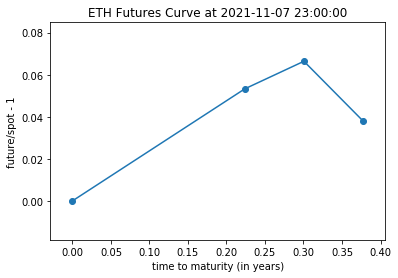

In [264]:
t = ETH_dt[-2000]


df = ETH_futuresCurve[t].copy()
df.sort_values('timeToMaturityinYears', inplace=True)
plt.title('ETH Futures Curve at '+t)
plt.ylabel('future/spot - 1')
plt.scatter(df.timeToMaturityinYears, df.open/df.open.iloc[0]-1)
plt.plot(df.timeToMaturityinYears, df.open/df.open.iloc[0]-1)
# plt.ylim((-0.005, 0.01))
plt.xlabel('time to maturity (in years)')

In [260]:
df

,datetime,open,timeToMaturityinYears,instrumentName
0,2022-05-23 17:00:00,2056.43,0,spot


In [181]:
# Last Day of Trading is the last Friday of contract month. Trading in expiring futures terminates at 4:00 p.m. London time on Last Day of Trading.



monthCodeSymbol = 'FGHJKMNQUVXZ'
monthCode = {monthCodeSymbol[i-1]:i for i in range(1,13)}


monthCode['N']


7

In [217]:
from datetime import date, datetime
from datetime import timedelta



m = t[4]
m



'-'

In [220]:
df = BTC_futuresCurve[t]
iN = df.instrumentName[1]




datetime.datetime(2022, 6, 25, 8, 0)

In [222]:
get_CME_settlement(iN)

datetime.datetime(2022, 6, 24, 16, 0)